<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

Initially, I tried using the built-in "csv.DictReader" function. However, I found that the format did not match what the question asked for, so I proceeded to try the next tool.

In [2]:
path = "/Users/GuangYi/Documents/GitHub/project2/sat_scores.csv"
reader = csv.DictReader(open(path, 'rb'))
dict_list = []

for line in reader:
    dict_list.append(line)

dict_list

[{'Math': '510', 'Rate': '82', 'State': 'CT', 'Verbal': '509'},
 {'Math': '513', 'Rate': '81', 'State': 'NJ', 'Verbal': '499'},
 {'Math': '515', 'Rate': '79', 'State': 'MA', 'Verbal': '511'},
 {'Math': '505', 'Rate': '77', 'State': 'NY', 'Verbal': '495'},
 {'Math': '516', 'Rate': '72', 'State': 'NH', 'Verbal': '520'},
 {'Math': '499', 'Rate': '71', 'State': 'RI', 'Verbal': '501'},
 {'Math': '499', 'Rate': '71', 'State': 'PA', 'Verbal': '500'},
 {'Math': '506', 'Rate': '69', 'State': 'VT', 'Verbal': '511'},
 {'Math': '500', 'Rate': '69', 'State': 'ME', 'Verbal': '506'},
 {'Math': '501', 'Rate': '68', 'State': 'VA', 'Verbal': '510'},
 {'Math': '499', 'Rate': '67', 'State': 'DE', 'Verbal': '501'},
 {'Math': '510', 'Rate': '65', 'State': 'MD', 'Verbal': '508'},
 {'Math': '499', 'Rate': '65', 'State': 'NC', 'Verbal': '493'},
 {'Math': '489', 'Rate': '63', 'State': 'GA', 'Verbal': '491'},
 {'Math': '501', 'Rate': '60', 'State': 'IN', 'Verbal': '499'},
 {'Math': '488', 'Rate': '57', 'State': 

In [3]:
# Set the path of the file, and read in the data into a list named dict_items
path = "/Users/GuangYi/Documents/GitHub/project2/sat_scores.csv"
dict_items = []
with open(path, 'rb') as f:
    reader = csv.reader(f)
    for row in reader:
        dict_items.append(row)

# Pre-allocate a list named item_list, that will create a list of values to be put in the dictionary
# The list, holder, is a list of lists that contain all the values for each item_list. 
item_list = []
holder = [0] * len(dict_items[0])

for a in range(len(dict_items[0])) :

    for b in range(1,len(dict_items)) :
        values_list = dict_items[b][a]
        item_list.append(values_list)

    holder[a] = item_list
    item_list = []

# Holder is zipped together with the headers to create the dictionary as specified above
dictionary = dict(zip(dict_items[0], holder))
pprint(dictionary)

{'Math': ['510',
          '513',
          '515',
          '505',
          '516',
          '499',
          '499',
          '506',
          '500',
          '501',
          '499',
          '510',
          '499',
          '489',
          '501',
          '488',
          '474',
          '526',
          '499',
          '527',
          '499',
          '515',
          '510',
          '517',
          '525',
          '515',
          '542',
          '439',
          '539',
          '512',
          '542',
          '553',
          '542',
          '589',
          '550',
          '545',
          '572',
          '589',
          '580',
          '554',
          '568',
          '561',
          '577',
          '562',
          '596',
          '550',
          '570',
          '603',
          '582',
          '599',
          '551',
          '514'],
 'Rate': ['82',
          '81',
          '79',
          '77',
          '72',
          '71',
          '71',
   

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
# Create a dataframe using pd.DataFrame
sat_df = pd.DataFrame(dictionary)
sat_df

,Math,Rate,State,Verbal
0,510,82,CT,509
1,513,81,NJ,499
2,515,79,MA,511
3,505,77,NY,495
4,516,72,NH,520
5,499,71,RI,501
6,499,71,PA,500
7,506,69,VT,511
8,500,69,ME,506
9,501,68,VA,510


In [5]:
# Create a dataframe using pd.read_csv
sat_df2 = pd.read_csv(path)
sat_df2

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [6]:
print sat_df.dtypes
print 
print sat_df2.dtypes

# pd.DataFrame reads all the items in each cell as a string regardless of the format.
# pd.read_csv is more effective at reading if an object is a string, integer, or float, and will read it in correctly.

Math      object
Rate      object
State     object
Verbal    object
dtype: object

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
sat_df2.head(10)

# Our data describes the SAT scores of the 50 states in the US plus the district, Washington DC.
# It breaks down the verbal and math scores, and rate seems to be the rate that high school students enter university.

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [8]:
data_dict = {}

data_dict["State"] = [sat_df2.dtypes["State"], """The variable is an object, which 
                      in Pandas notation indicates that it is a string"""]
data_dict["Rate"] = [sat_df2.dtypes["Rate"], "The variable is an integer"]
data_dict["Verbal"] = [sat_df2.dtypes["Verbal"], "The variable is an integer"]
data_dict["Math"] = [sat_df2.dtypes["Math"], "The variable is an integer"]
data_dict["Shape"] = [("The shape of the SAT DataFrame is", str(sat_df2.shape))]



In [9]:
data_dict

{'Math': [dtype('int64'), 'The variable is an integer'],
 'Rate': [dtype('int64'), 'The variable is an integer'],
 'Shape': [('The shape of the SAT DataFrame is', '(52, 4)')],
 'State': [dtype('O'),
  'The variable is an object, which \n                      in Pandas notation indicates that it is a string'],
 'Verbal': [dtype('int64'), 'The variable is an integer']}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

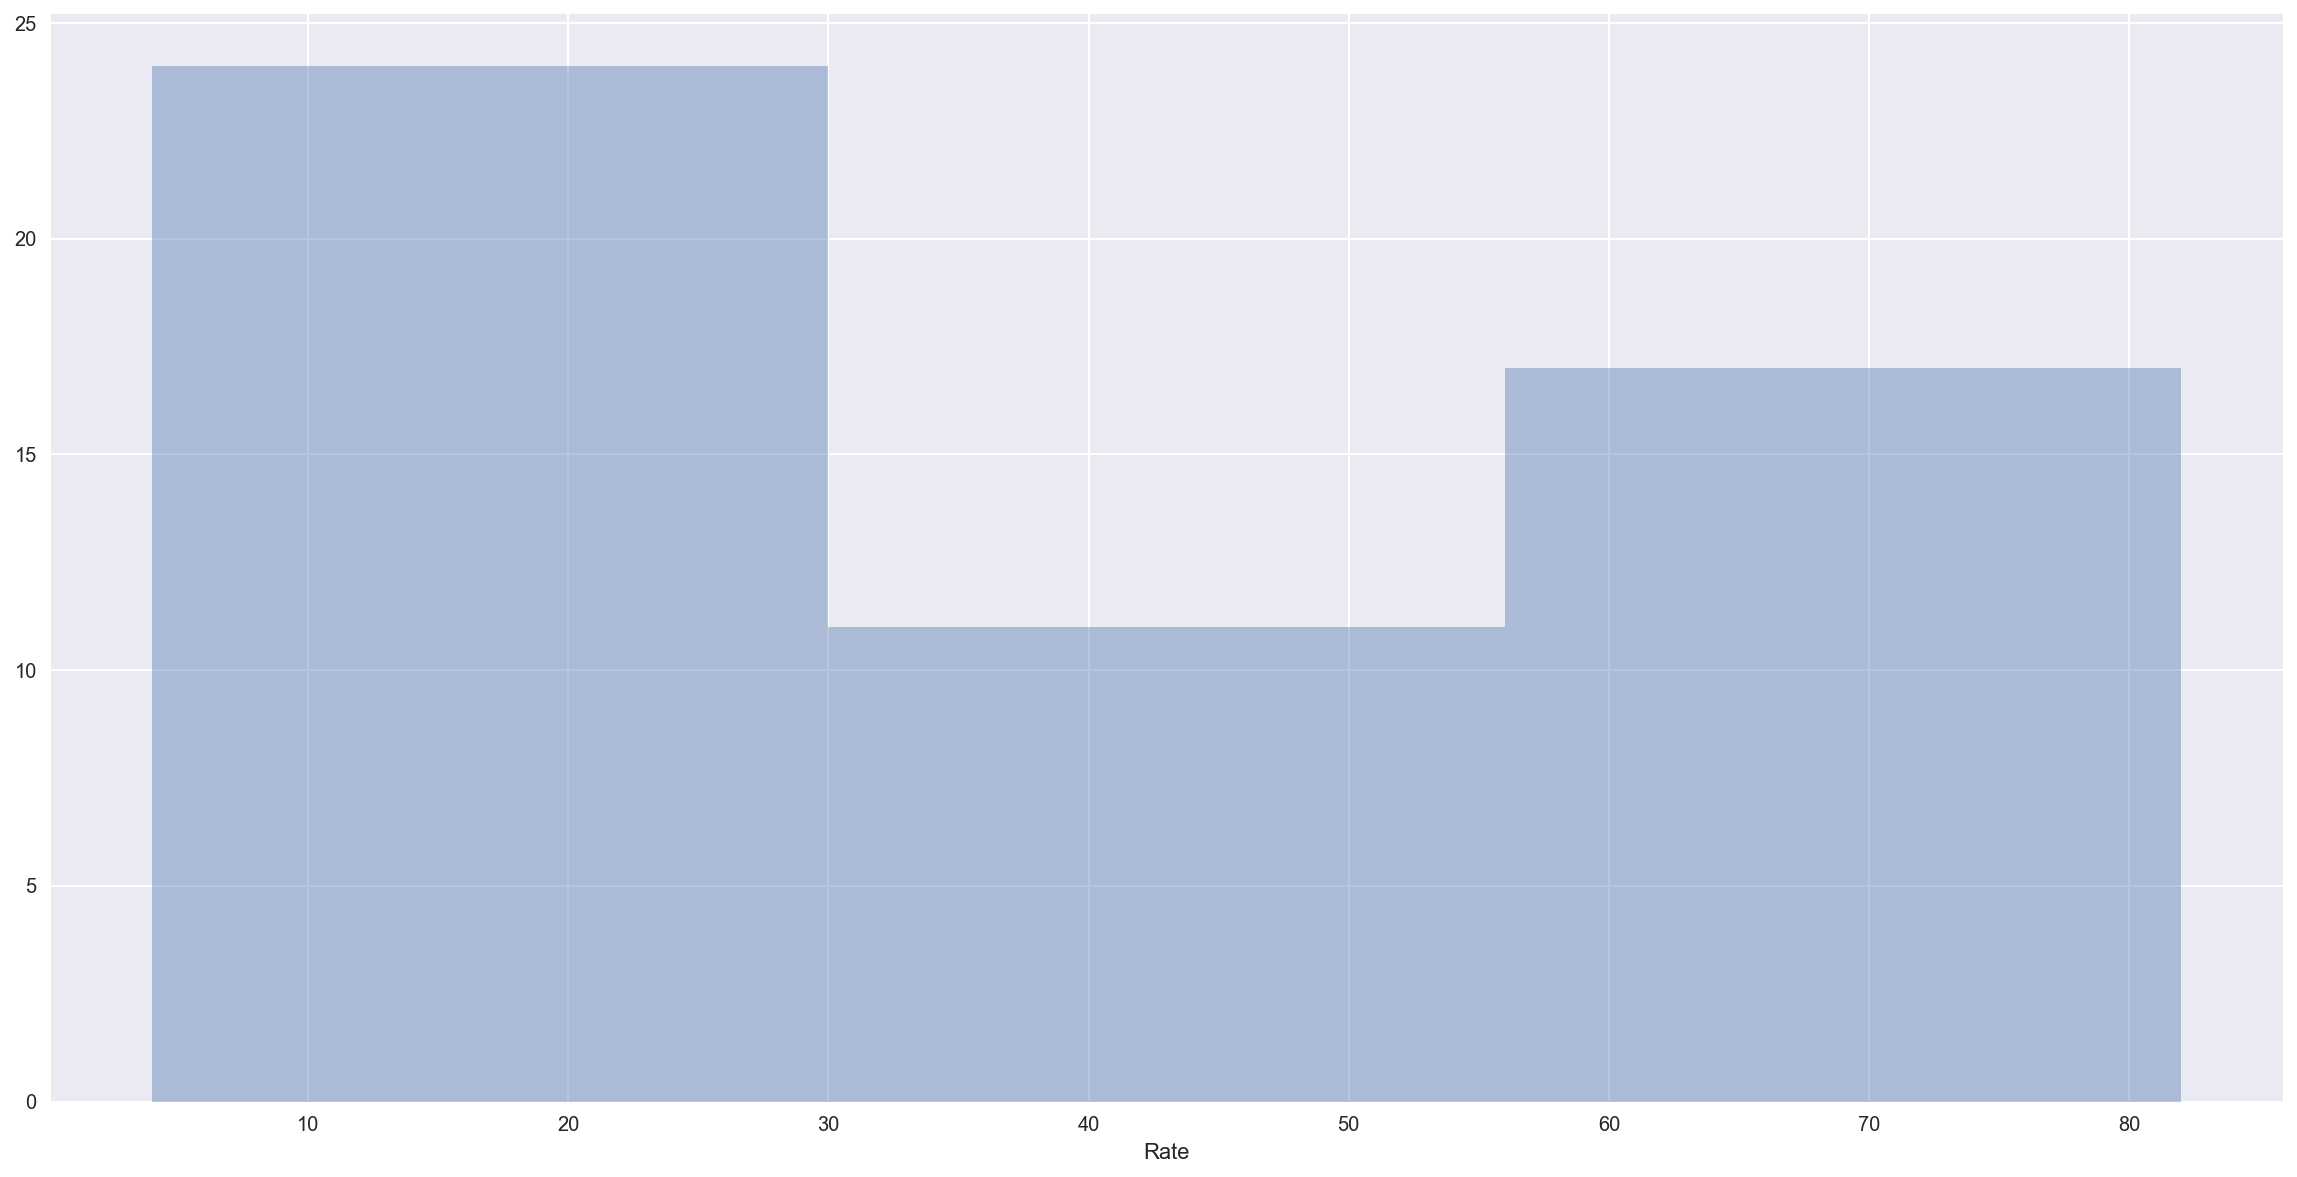

In [10]:
sns.set()
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(sat_df2.Rate, kde=False, hist=True)

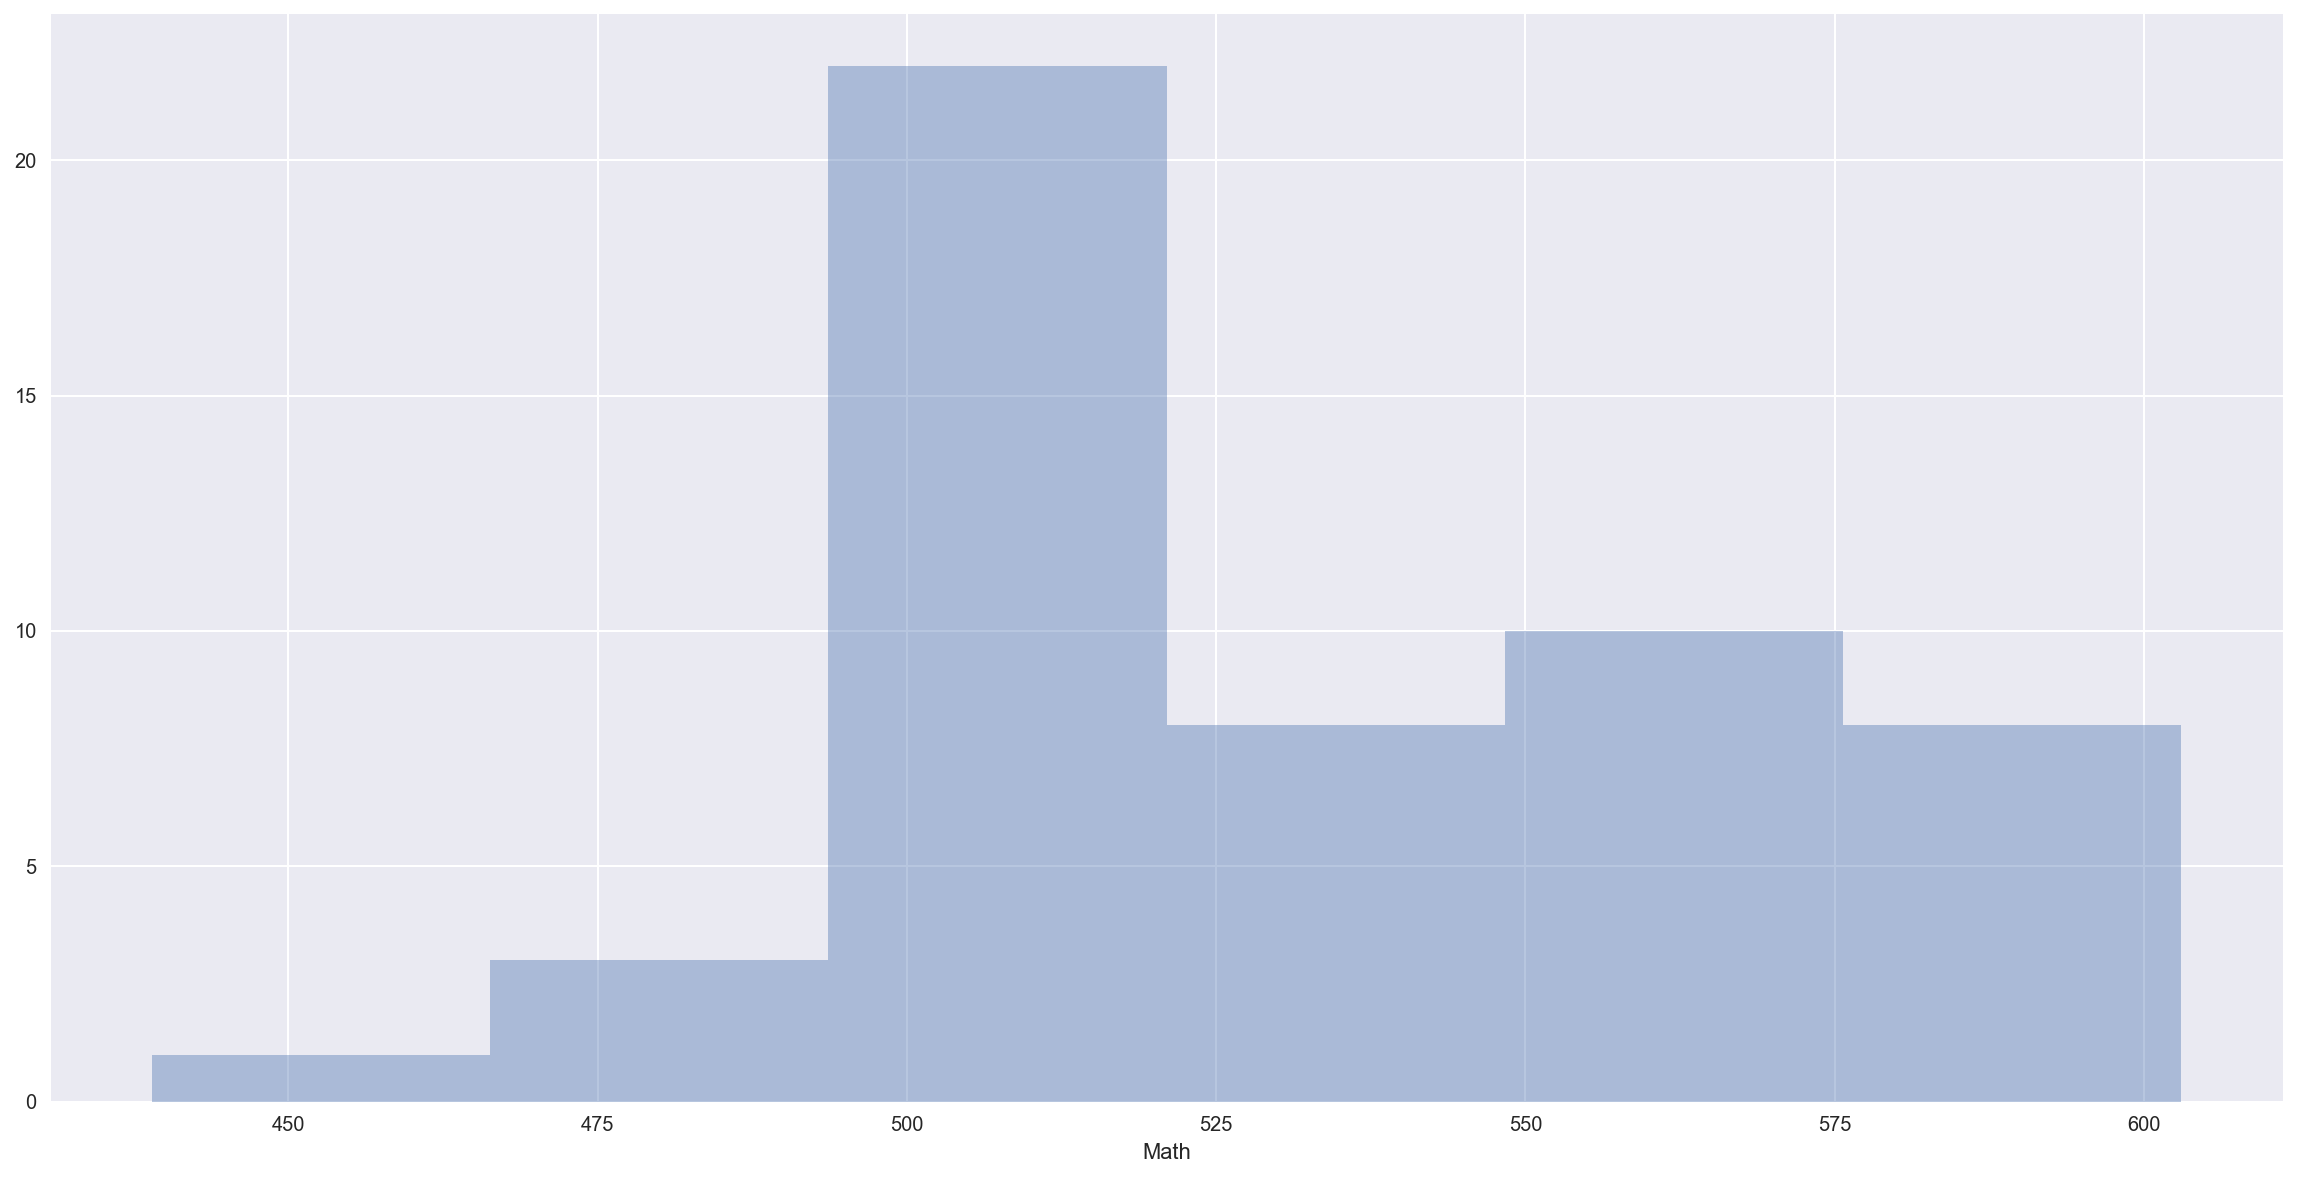

In [11]:
sns.set()
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(sat_df2.Math, kde=False, hist=True)

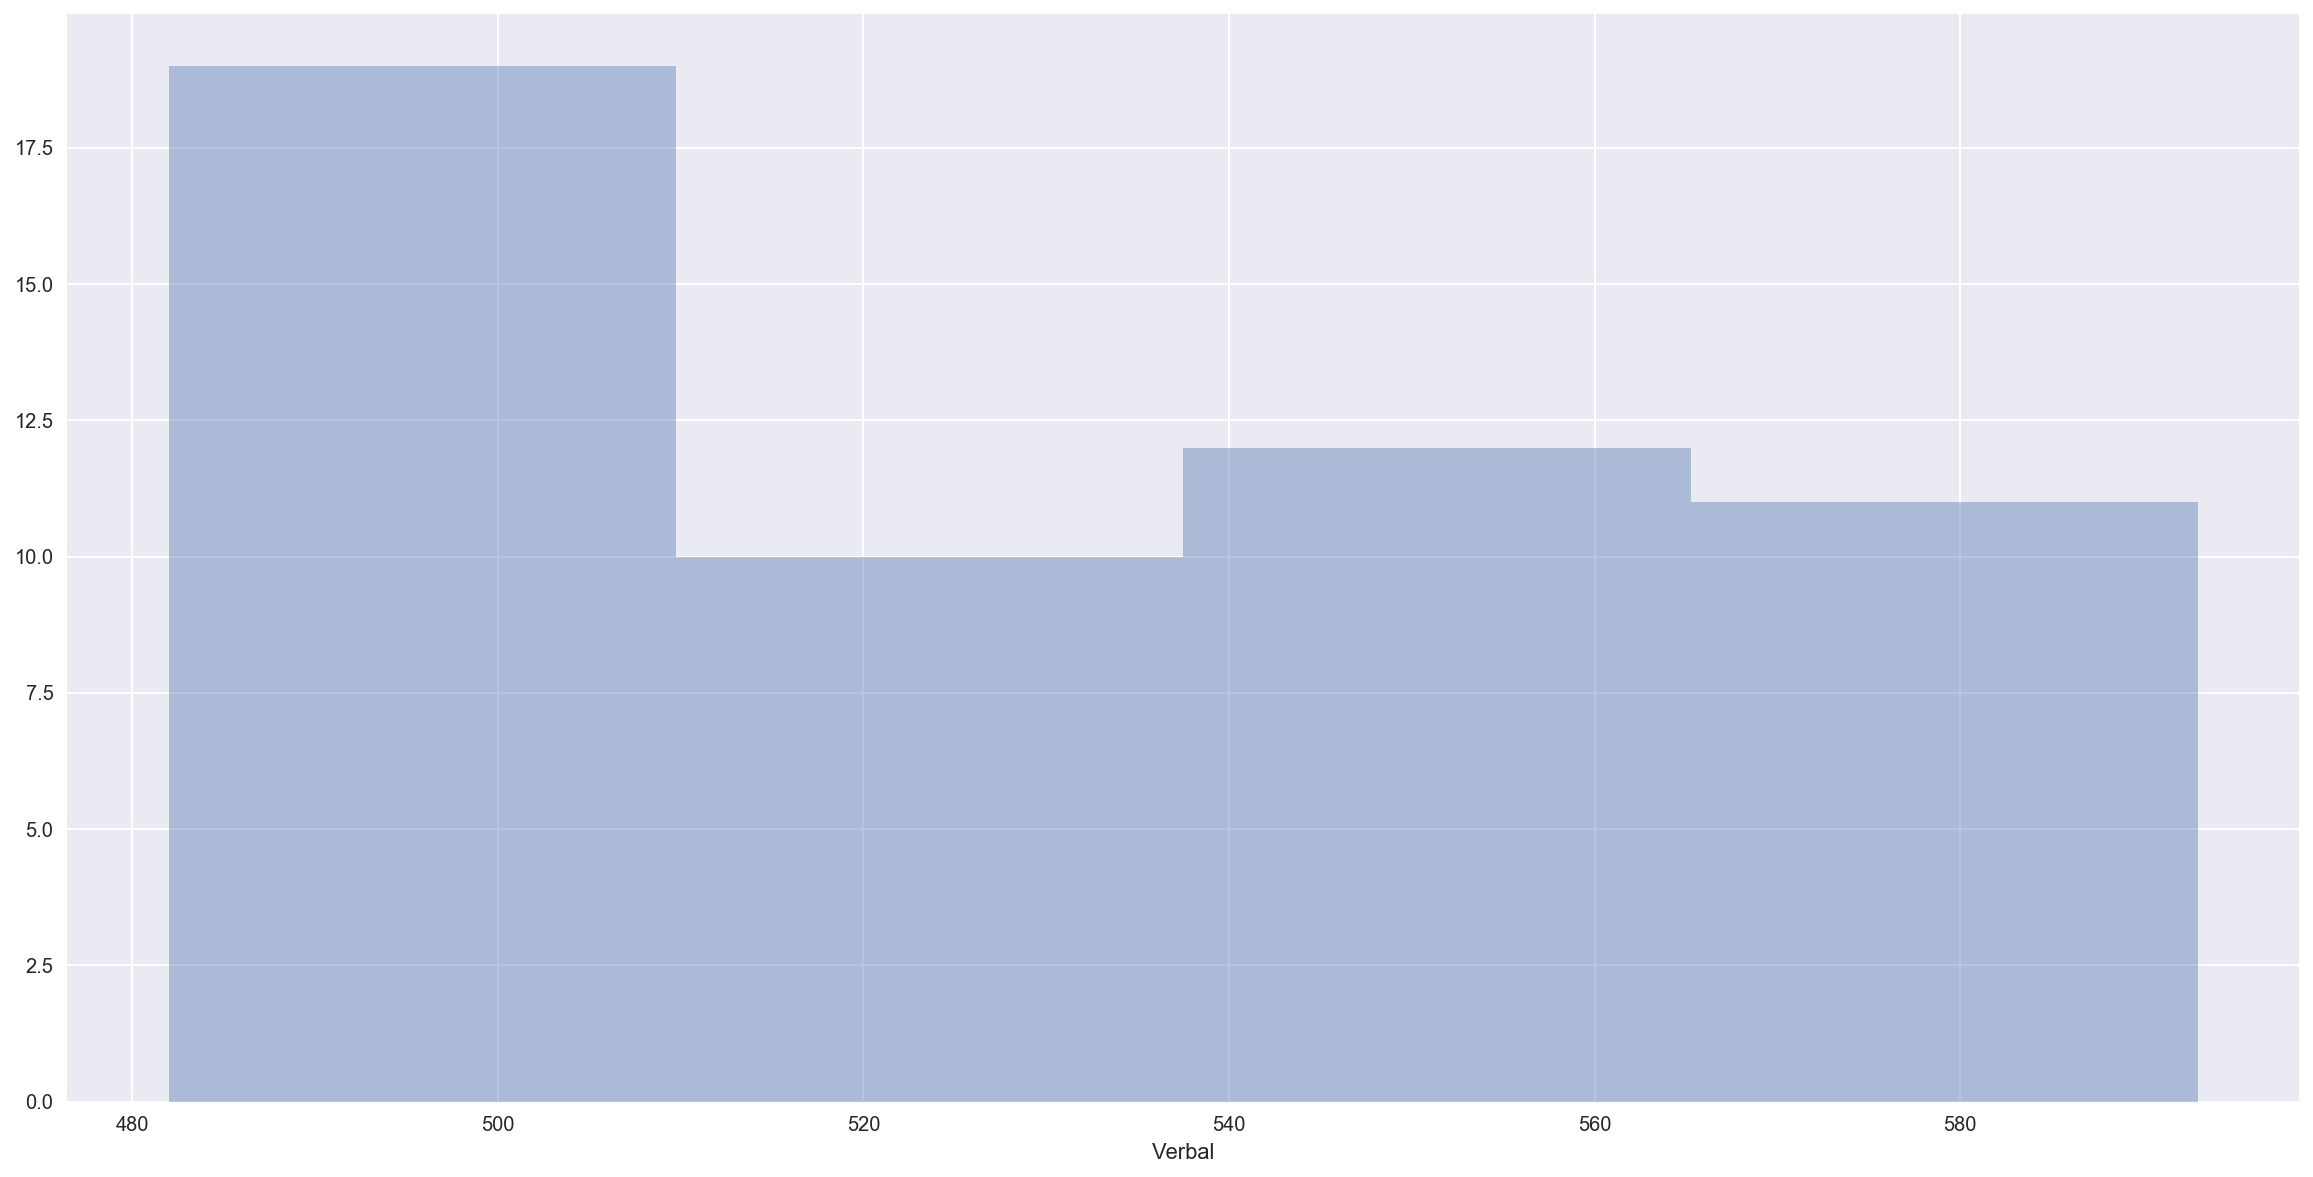

In [12]:
sns.set()
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(sat_df2.Verbal, kde=False, hist=True)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

In [13]:
sat_df2.drop(51, axis=0, inplace=True)

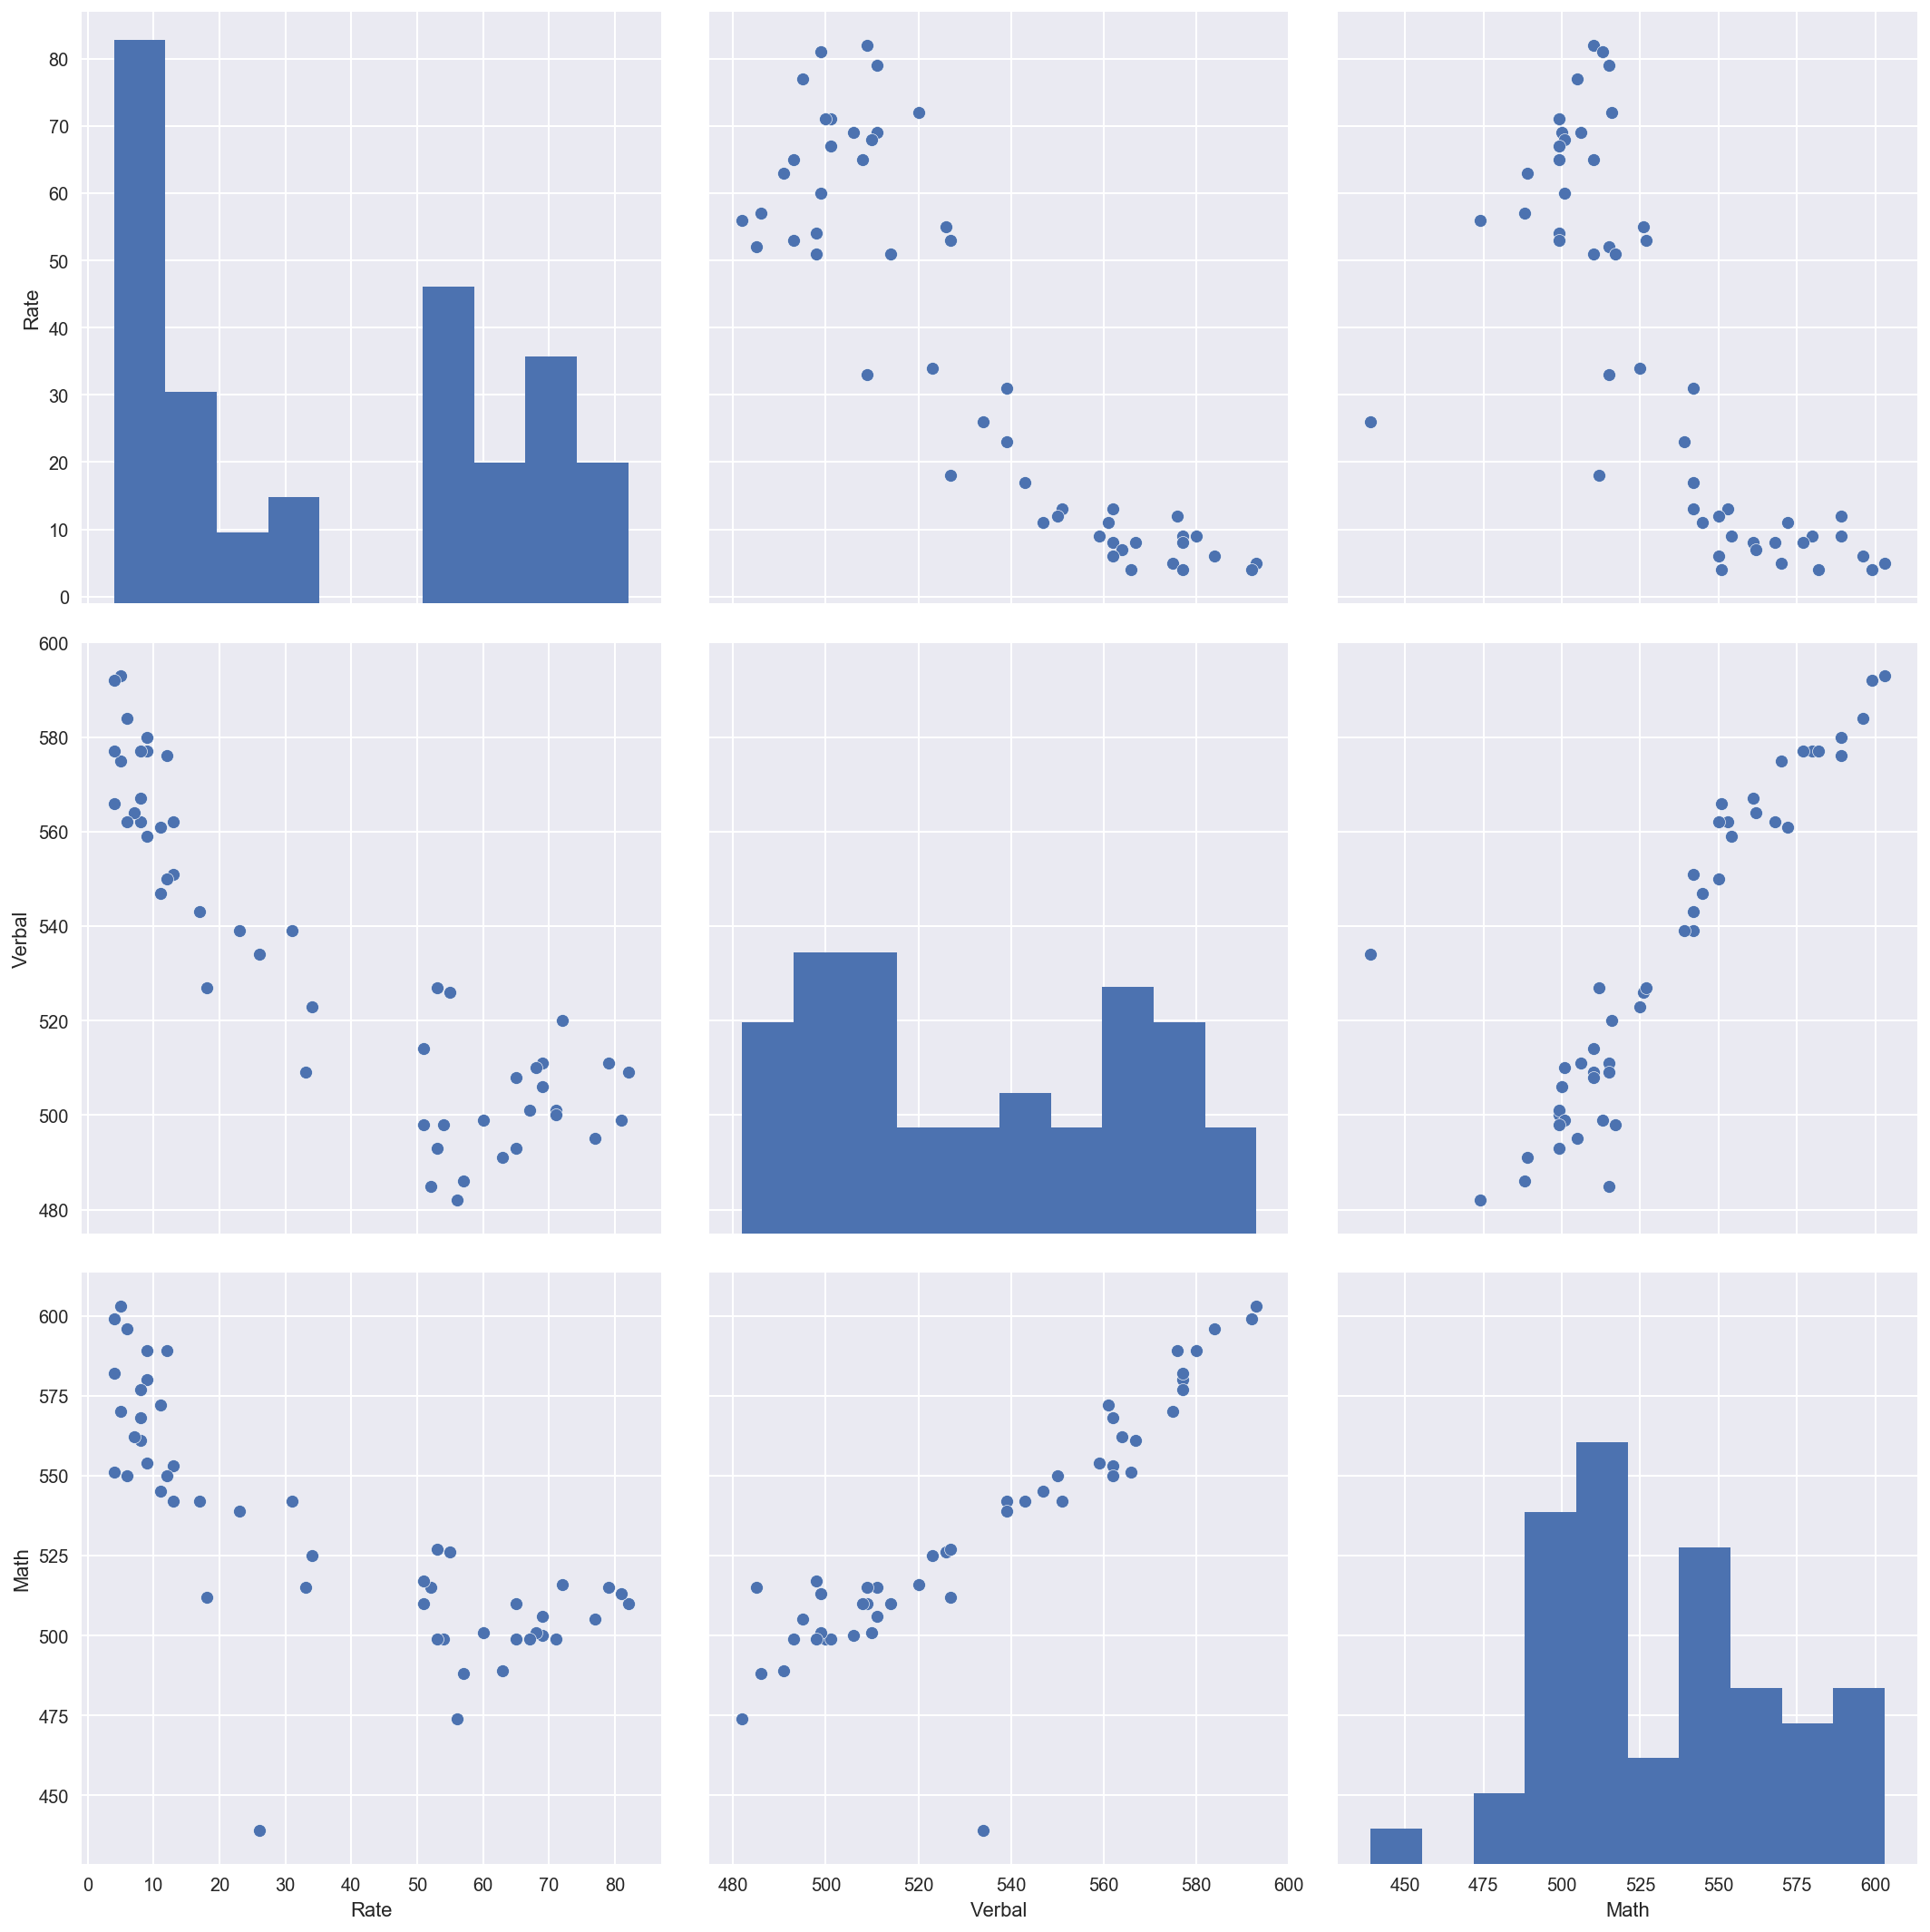

In [14]:
dict_sub_mvr = sat_df2.drop("State", axis=1)
sns.pairplot(dict_sub_mvr, size=5)

The histograms in the plots above replicate our results from question 3.1.

The scatterplots show the relationship between each variable by plotting them against each other. Using these data points, we can actually visually inspect for possible correlations (upward trends indicate positive correlation, downward indicates inverse, and sometimes it is unclear) and potential outliers.

A few points appear to be outliers, but without doing Mahalanobis distance calculations, which the class has not covered thus far, we cannot name them outliers based on the scatterplot data.

The simplest relationship to see is when math and verbal scores are plotted together. The scatterplots show that higher math scores tend to give higher verbal scores. However, when looking at rate vs. math or rate vs. verbal plots, it seems that the placement rate increases as scores decrease, which does not make sense.

Closer inspection of these data is necessary.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

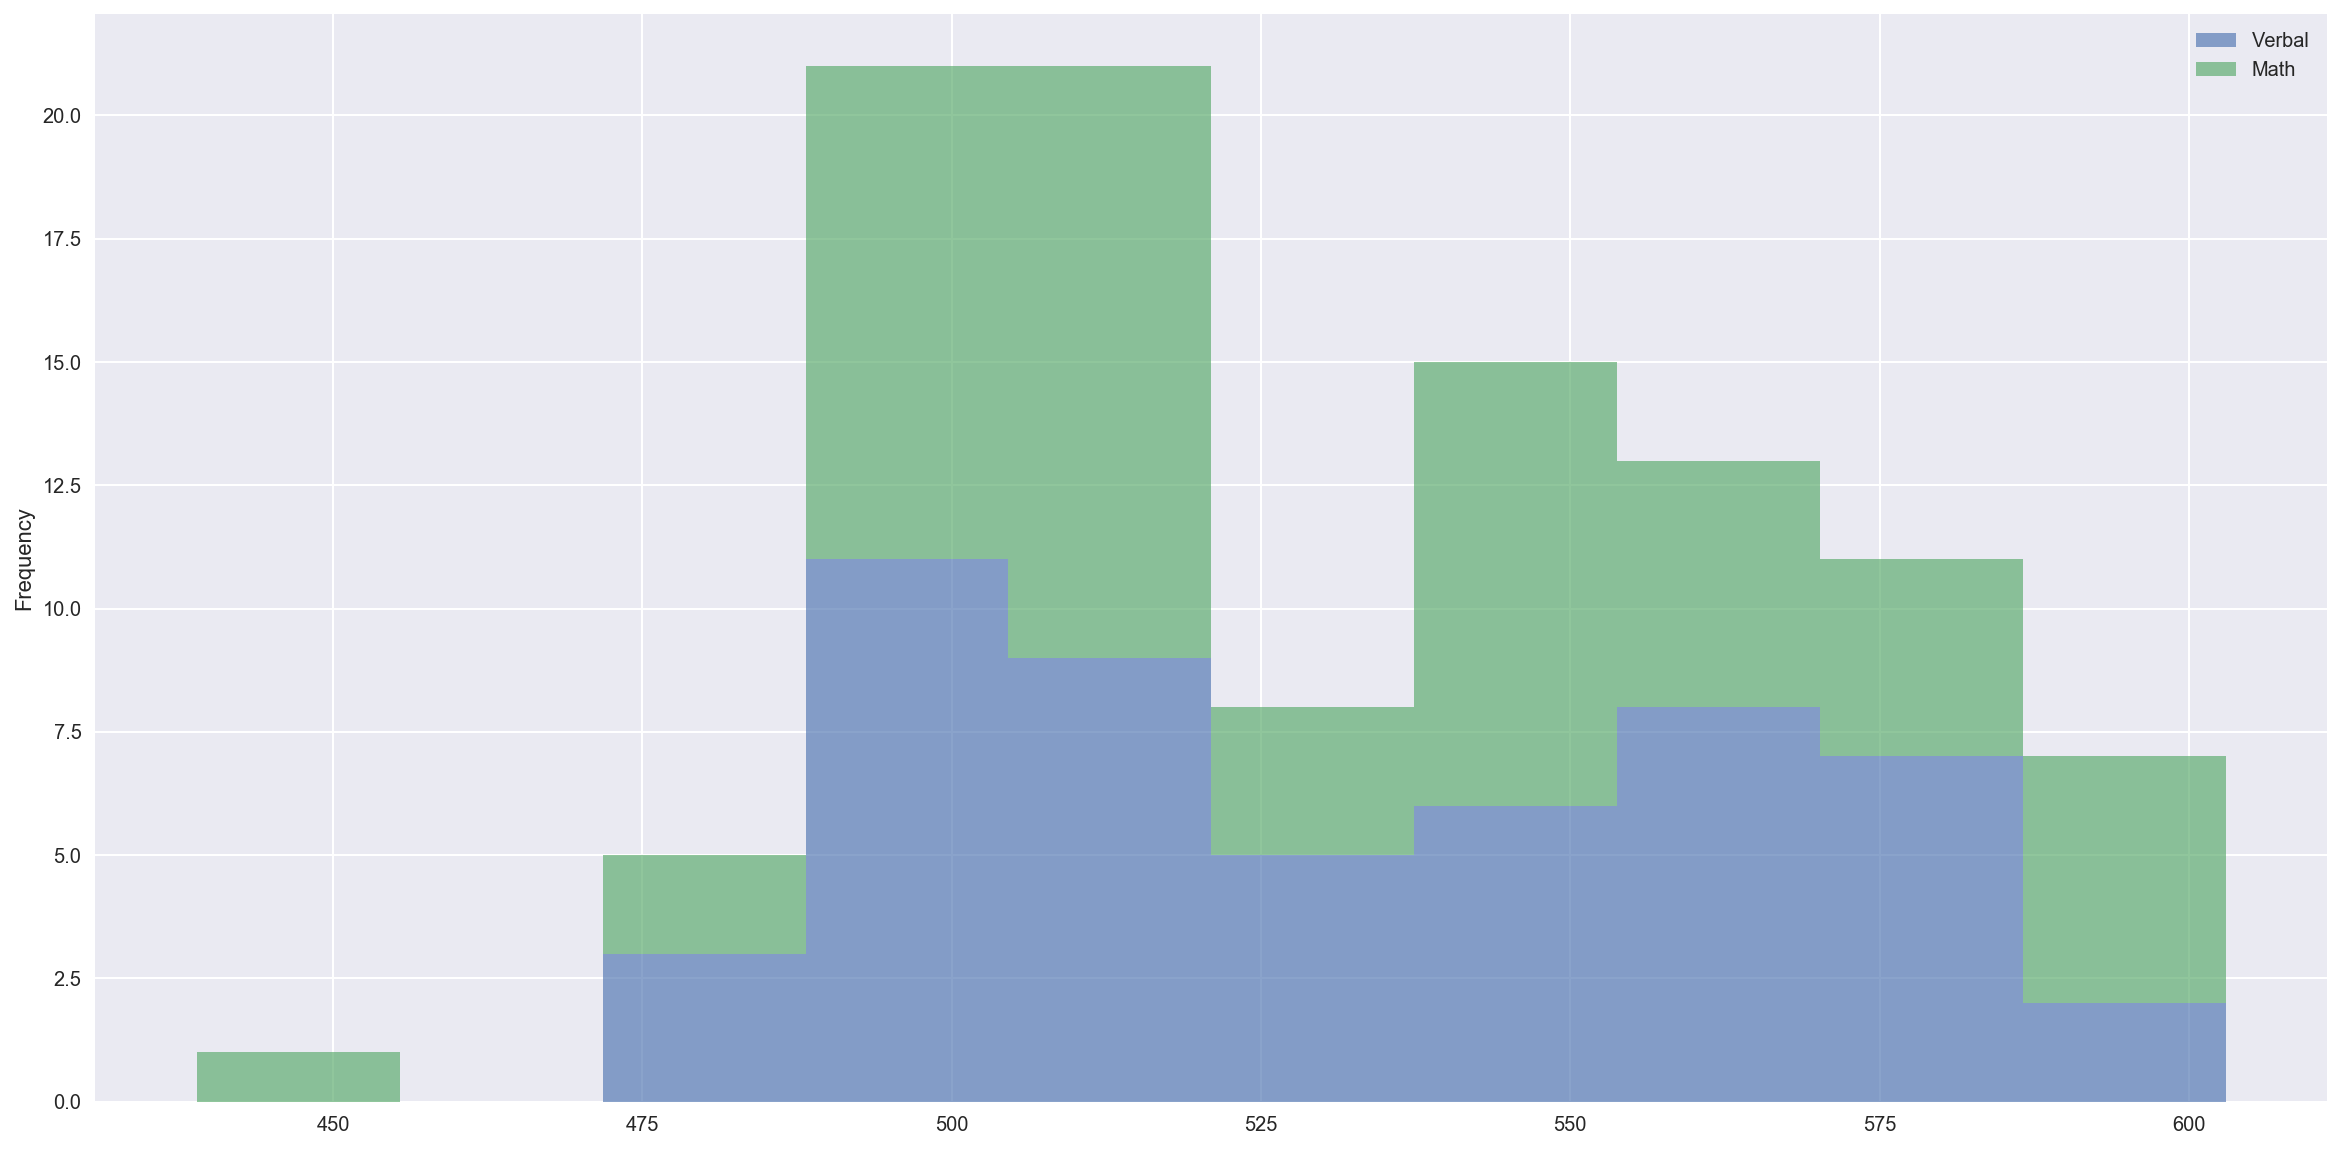

In [15]:
dict_sub_mv = dict_sub_mvr.drop("Rate", axis=1)
dict_sub_mv.plot.hist(alpha=0.65, stacked=True, figsize=(20,10))

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

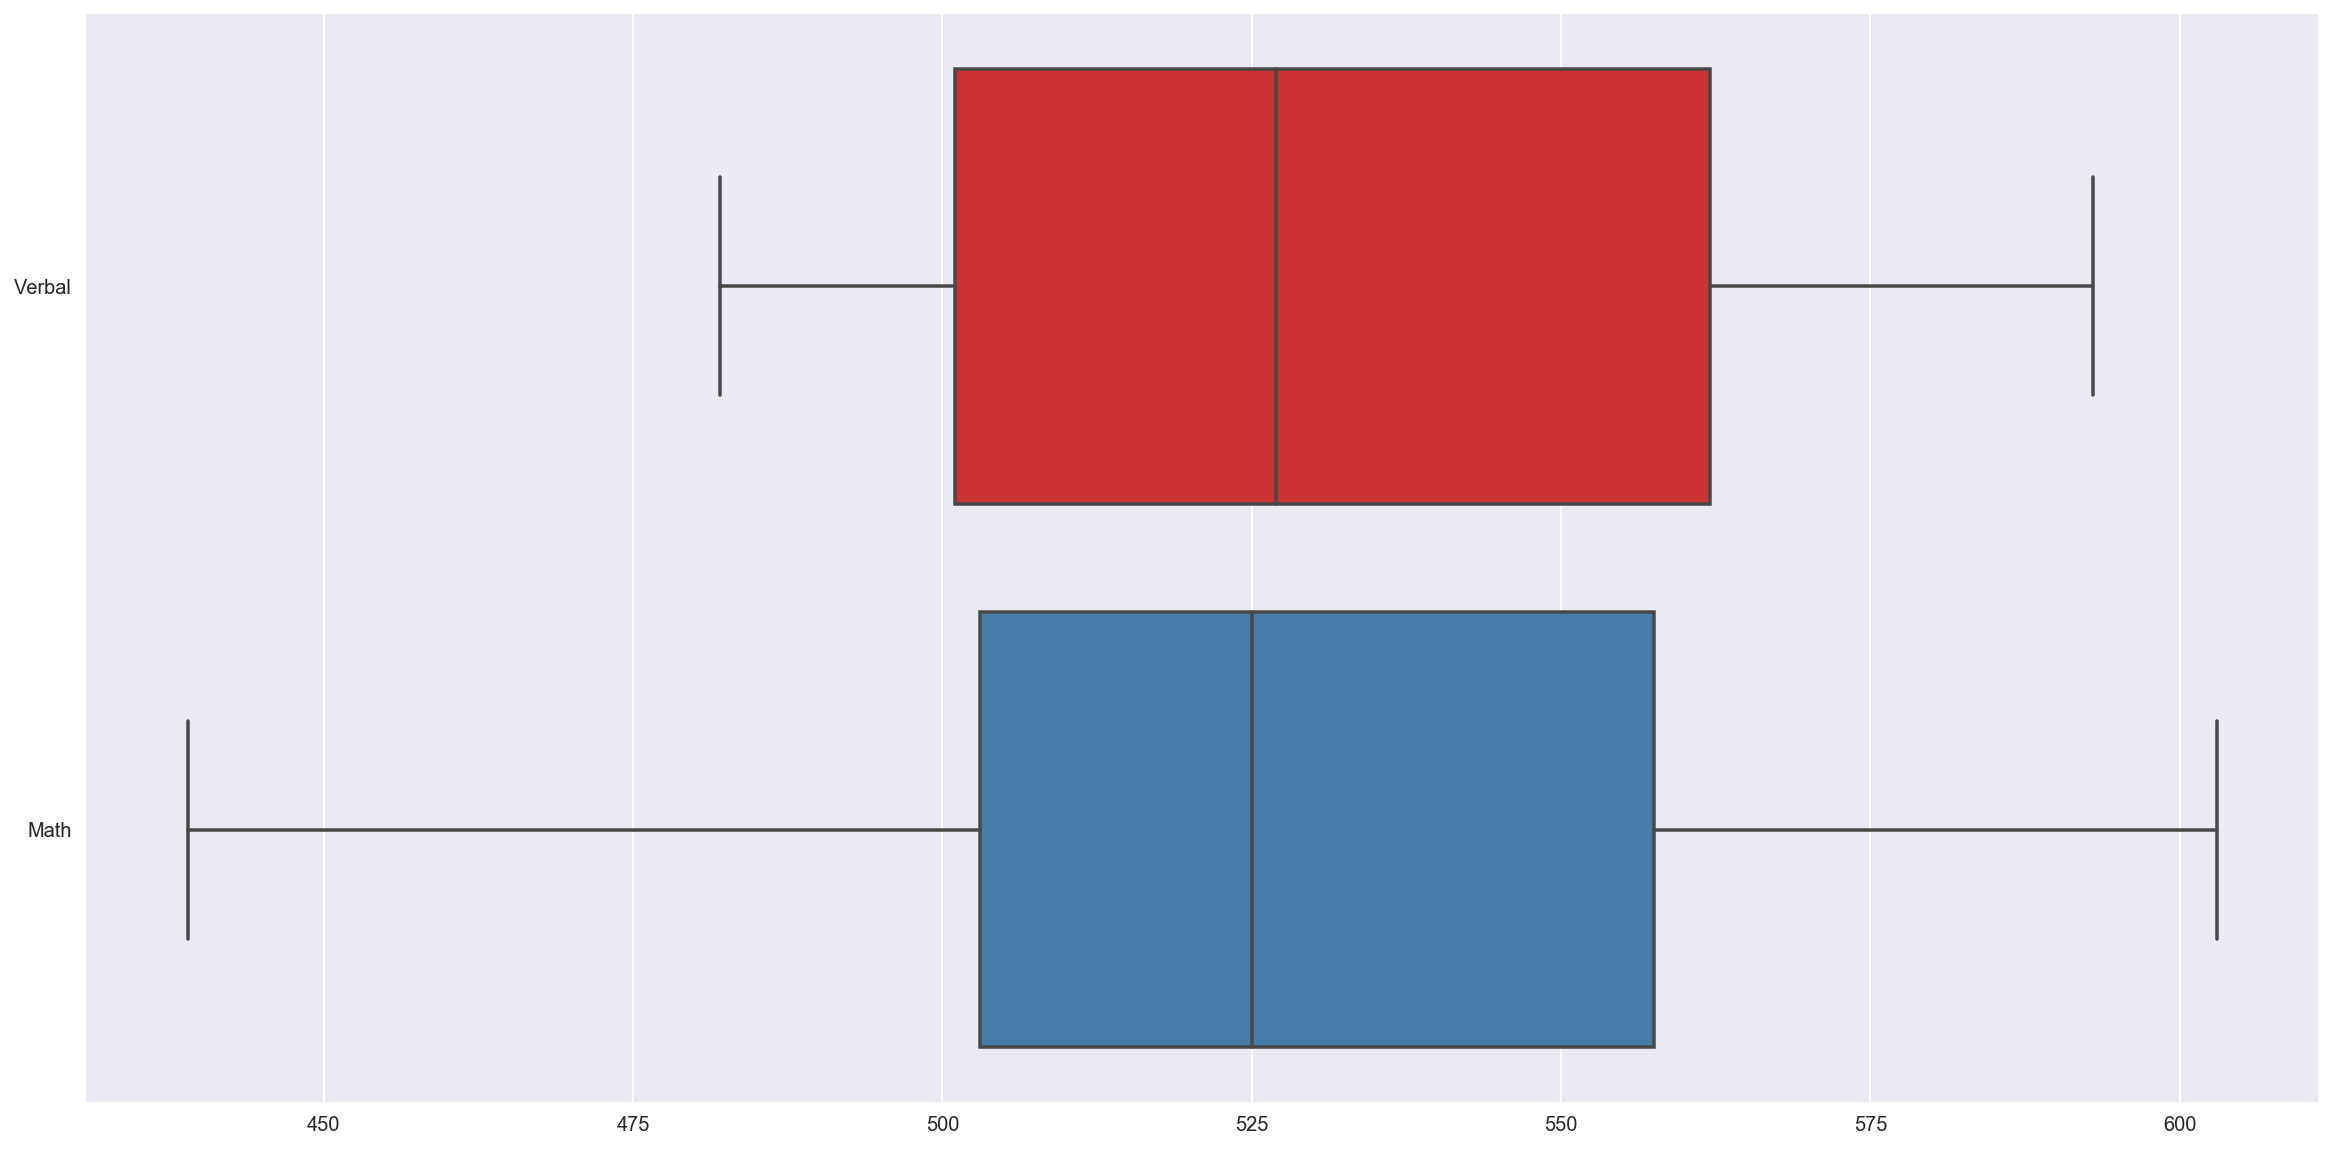

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=dict_sub_mv, orient="h", palette="Set1")

Boxplots yield a great deal of descriptive information visually, whereas scatterplots/histograms are good for looking at overall trends and frequency. Boxplots show mean, median, inter-quartile range, standard deviation, and range in one simple visual that is easier to digest as you can compare other objects of similar scale at the same time.

It's possible to plot the math and verbal scores on the same figure because they use the same scale, which is out of 800 points. With rate, the scale is not compatible since rate is measured in percentage.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [17]:
# In order to plot math and verbal scores on the same chart as a rate score, they must be normalized into percentage
# I picked 800 since I took the SAT and I know that this is the maximum score that each section is out of.
dict_sub_norm = (dict_sub_mv / 800) * 100
dict_sub_norm["Rate"] = dict_sub_mvr["Rate"]

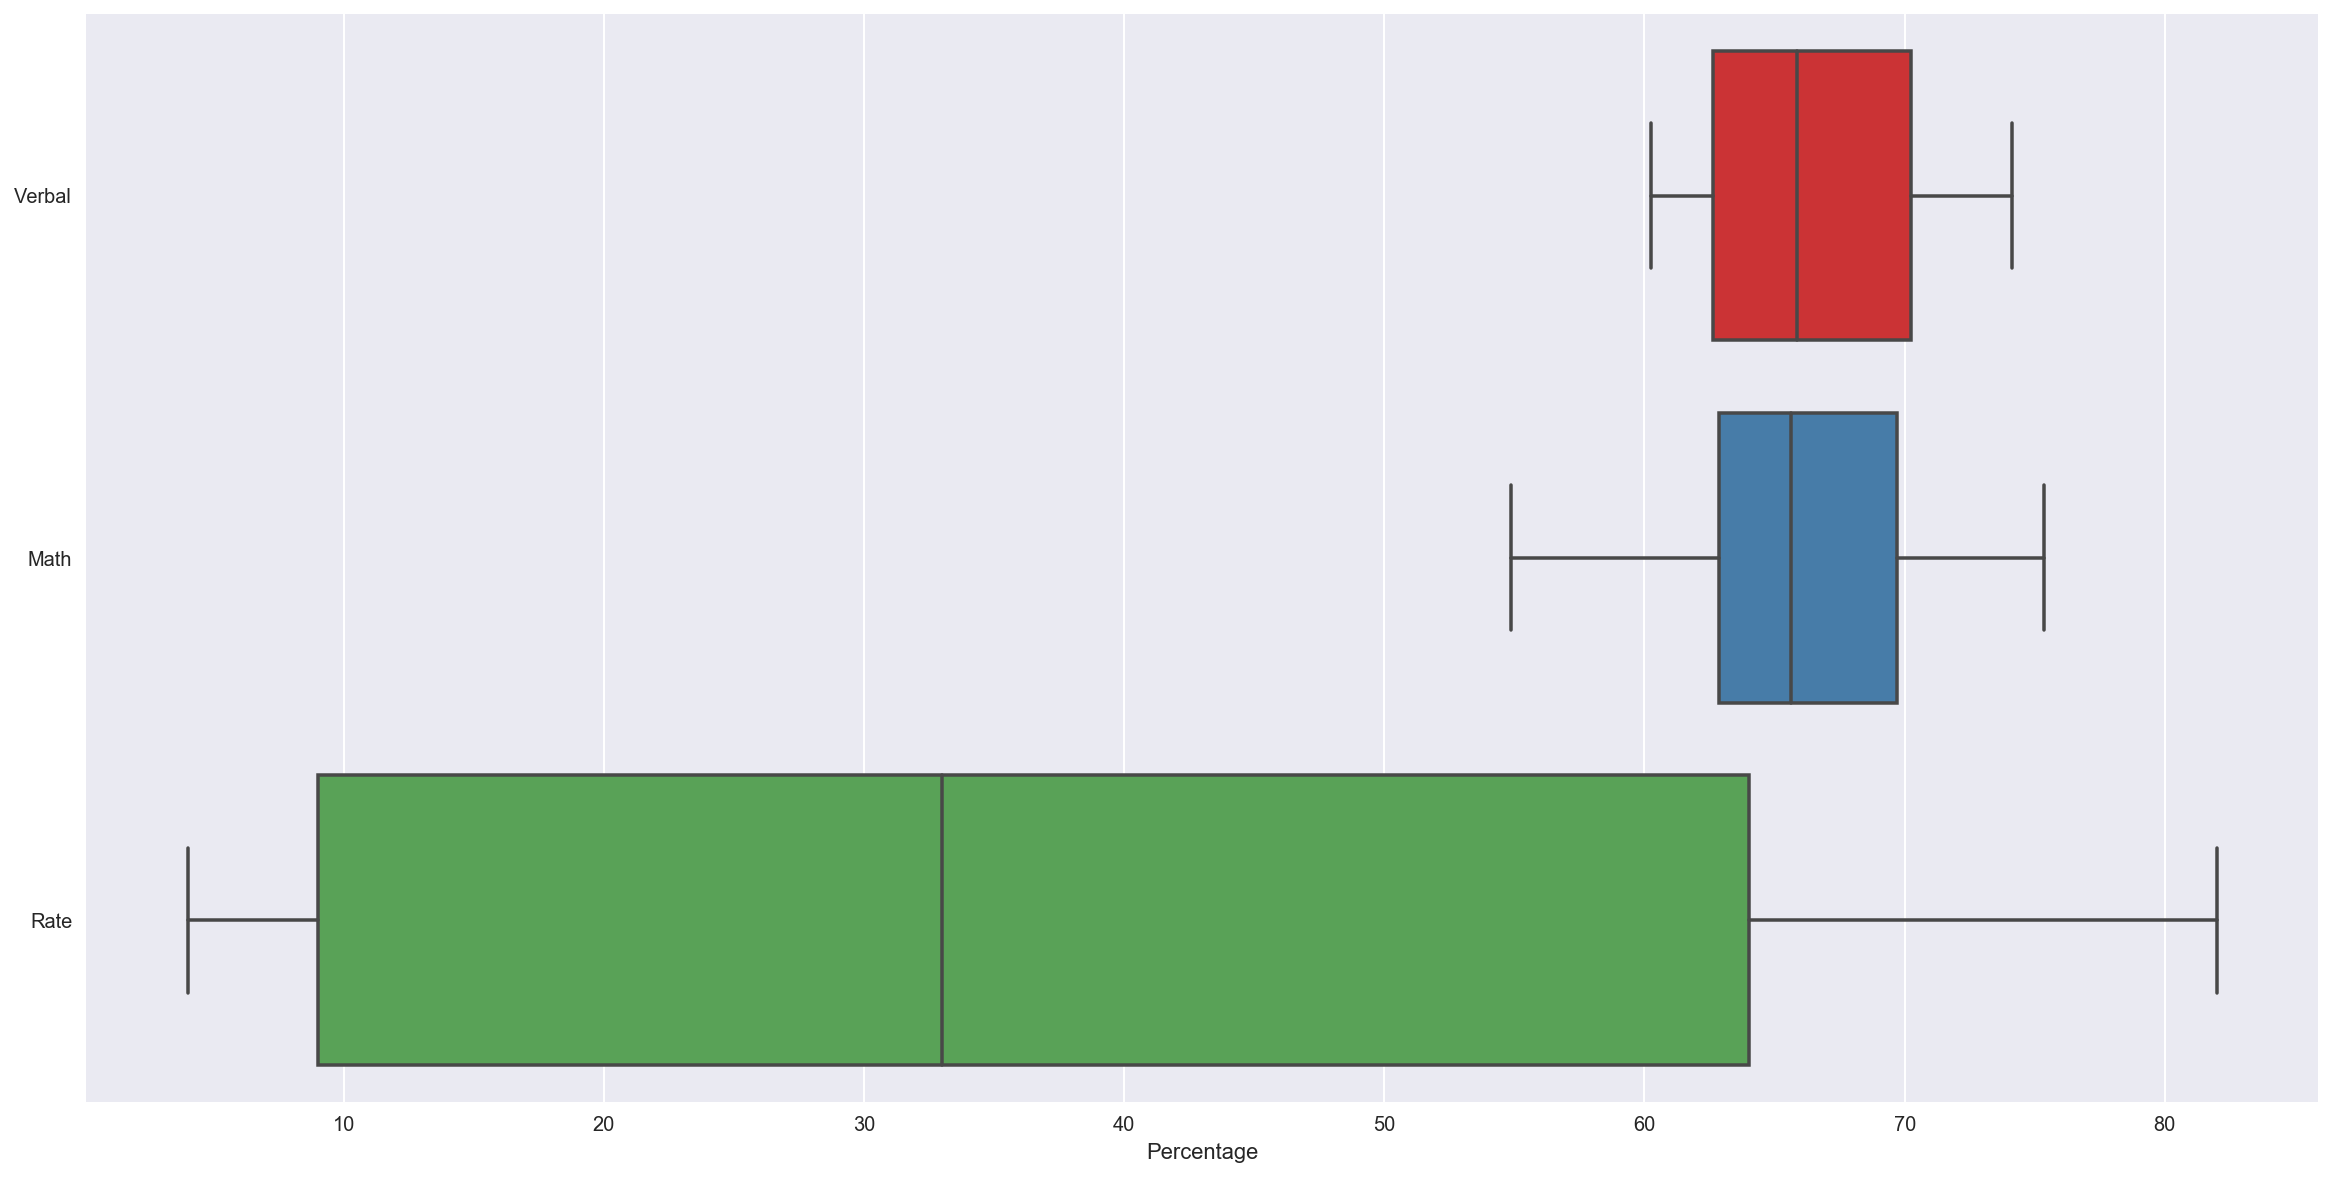

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.boxplot(data=dict_sub_norm, orient="h", palette="Set1")
ax.set_xlabel("Percentage")

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [19]:
verbal = sat_df2.loc[:, "Verbal"].tolist()
verbal_mean = np.mean(verbal)

count = 0
state_list = []
for a in range(len(sat_df2)) :
    if sat_df2.iloc[a, 3] > verbal_mean :
        count += 1
        state_list.append(sat_df2.iloc[a, 0])
state_list.sort()

print "There are", count, "states above the mean Verbal scores of", verbal_mean
print "These states are", state_list

There are 23 states above the mean Verbal scores of 532.529411765
These states are ['AL', 'AR', 'CO', 'IA', 'ID', 'IL', 'KS', 'KY', 'LA', 'MI', 'MN', 'MO', 'MS', 'MT', 'ND', 'NE', 'NM', 'OK', 'SD', 'TN', 'UT', 'WI', 'WY']


The output above shows how to find the correct results without using masks. The output below shows the solution using a mask.

With 23 states above the mean, it shows that the difficulty of the test is close to being fair, since approximately half (23 out of 51) are close to the mean. This indicates a slight left skew of the graph.

In [20]:
# Using masks
verbal = sat_df2.loc[:, "Verbal"].tolist()
verbal_mean = np.mean(verbal)

sat_df2[sat_df2.Verbal > verbal_mean]

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [21]:
# Calculate the median
verbal_median = np.median(verbal)

count2 = 0
state_list_median = []

for a in range(len(sat_df2)) :
    if sat_df2.iloc[a, 3] > verbal_median :
        count2+= 1
        state_list_median.append(sat_df2.iloc[a, 0])

state_list_median.sort()
print "There are", count2, "states above the median Verbal scores of", verbal_median
print "These states are", state_list_median

There are 23 states above the median Verbal scores of 527.0
These states are ['AL', 'AR', 'CO', 'IA', 'ID', 'IL', 'KS', 'KY', 'LA', 'MI', 'MN', 'MO', 'MS', 'MT', 'ND', 'NE', 'NM', 'OK', 'SD', 'TN', 'UT', 'WI', 'WY']


As in Question 5.1, the output above shows how to compare the medians without masks, while the output below shows how to do it with masks.

The same states are above the median as are above the mean. Again, this is due to the slight skew of the test results, which is what keeps the median from being exactly dividing the results in half (25 or 26 in each half as opposed to 23 in one half and 28 in the other).

In [22]:
# Using masks
verbal_median = np.median(verbal)

sat_df2[sat_df2.Verbal > verbal_median]

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [23]:
math = sat_df2.loc[:, "Math"].tolist()

np_math = np.array(math)
np_verbal = np.array(verbal)
vm_delta = np_verbal - np_math

sat_df2["Verbal-Math"] = vm_delta
sat_df2

,State,Rate,Verbal,Math,Verbal-Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [24]:
sat_top10_delta = sat_df2.sort_values("Verbal-Math", axis=0, ascending=False)
sat_top10_delta.reset_index(inplace=True, drop=True)
sat_top10_delta = sat_top10_delta.loc[:9,:]
sat_top10_delta.head(3)

,State,Rate,Verbal,Math,Verbal-Math
0,OH,26,534,439,95
1,MS,4,566,551,15
2,WV,18,527,512,15


In [25]:
sat_top10_math_delta = sat_df2.sort_values("Verbal-Math", axis=0)
sat_top10_math_delta.reset_index(inplace=True, drop=True)
sat_top10_math_delta = sat_top10_math_delta.loc[:9,:]
sat_top10_math_delta.head(3)

,State,Rate,Verbal,Math,Verbal-Math
0,HI,52,485,515,-30
1,CA,51,498,517,-19
2,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [26]:
dict_sub_mvr.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.888121,-0.773419
Verbal,-0.888121,1.000000,0.899909
Math,-0.773419,0.899909,1.000000


As I mentioned in the pair-plot question earlier, there is a positive correlation between the verbal and math scores, meaning that as one goes up, so does the other.

Rate has a strong negative correlation with both verbal and math, meaning that as rate goes up, the other two go down, and when rate goes down, the other two go up. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [27]:
dict_sub_mvr.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


Count: The number of entries in that column  
Mean: The mean of that column  
Std: The standard deviation of the column  
Min: The minimum/smallest value of the column  
25%: The value that represents the 25th percentile  
50% The value that represents the 50th percentile  
75%: The value that represents the 75th percentile  
Max: The maximum/largest value of the column  

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [28]:
dict_sub_mvr.cov()

,Rate,Verbal,Math
Rate,759.04,-816.280000,-773.220000
Verbal,-816.28,1112.934118,1089.404706
Math,-773.22,1089.404706,1316.774902


Covariance matrices are generally used when the variable scales are similar, while the correlation matrix is used  variables are on different scales.

Using the correlation matrix standardizes the data. For our purposes, using the correlation matrix makes sense if we did not want to take the time to make sure all the data were on the exact same scale.

However, we could calculate the covariate matrix using the standardized dictionary from earlier, since we've already done the work.

Source 1: https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance  
Source 2: http://www.statisticshowto.com/covariance/

In [29]:
dict_sub_norm.cov()

,Verbal,Math,Rate
Verbal,17.389596,17.021949,-102.0350
Math,17.021949,20.574608,-96.6525
Rate,-102.035000,-96.652500,759.0400


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [30]:
path2 = "/Users/GuangYi/Documents/GitHub/project2/drug_use_by_age.csv"
drugs = pd.read_csv(path2)

In [31]:
drugs.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [32]:
drugs.shape

(17, 28)

We need to convert the values from strings to floats so that we can run analysis more easily later on.

There are dashes under the frequency column when no use has been indicated. We need to replace these dashes with the number 0 in order to switch the column type to float in the DataFrame. 

In [33]:
row_count = drugs.shape[0] 
column_count = drugs.shape[1] 

for a in range(column_count) :
    
    for b in range(row_count) :
        if type(drugs.iloc[b,a]) is str :
            try :
                drugs.replace(to_replace=drugs.iloc[b,a], value=float(drugs.iloc[b, a]), inplace=True)
            except:    
                drugs.iloc[b,a] = drugs.iloc[b,a]
            
        
        if drugs.iloc[b,a] == '-' :
            drugs.replace(to_replace=drugs.iloc[b,a], value= float(0.), inplace=True)
            

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [34]:
# Create sub-tables that split usage and frequency to take a closer look

columns_use = range(2, column_count, 2)
columns_frequency = range(3, column_count, 2)

drugs_use = pd.DataFrame(drugs.iloc[:, columns_use])
drugs_frequency = pd.DataFrame(drugs.iloc[:, columns_frequency])
age_column = np.array(drugs.iloc[:, 0])
n_column = pd.DataFrame(drugs.iloc[:, 1])

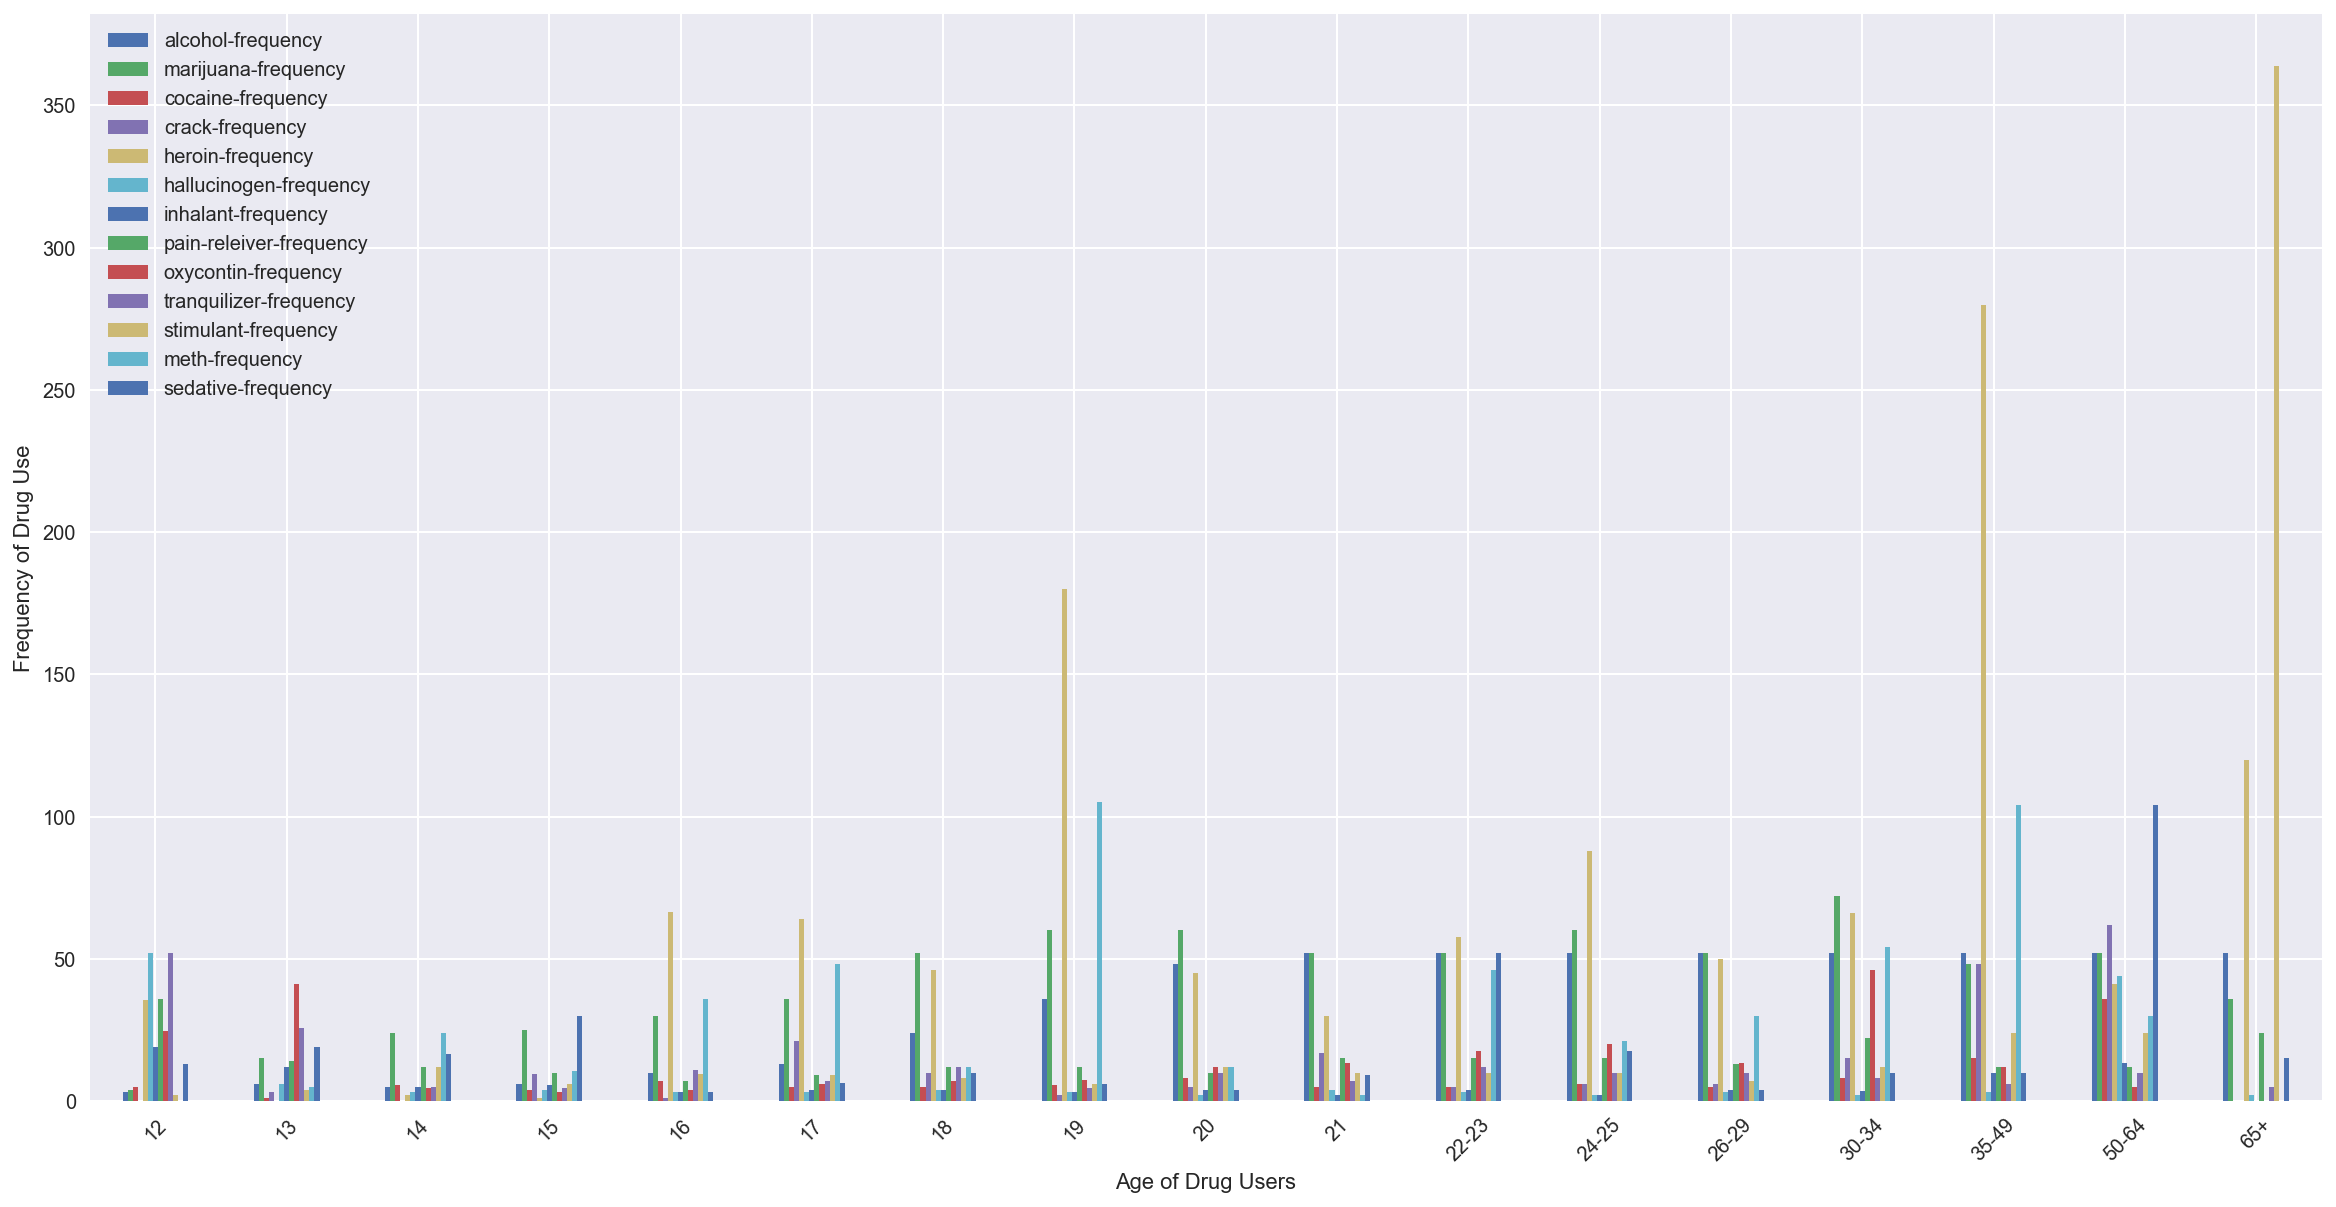

In [35]:
# Rename indices to age brackets because some of them are strings
drugs_frequency.rename({0: "12", 1: "13", 2: "14", 3: "15", 4:"16", 5:"17", 6:"18", 7:"19", 8:"20", 9:"21", 10:"22-23", 11:"24-25", 
                  12:"26-29", 13:"30-34", 14: "35-49", 15:"50-64", 16:"65+"}, inplace=True)

ax = drugs_frequency.plot(figsize=(20,10), kind='bar', stacked=False, rot=45)
ax.set_xlabel("Age of Drug Users")
ax.set_ylabel("Frequency of Drug Use")

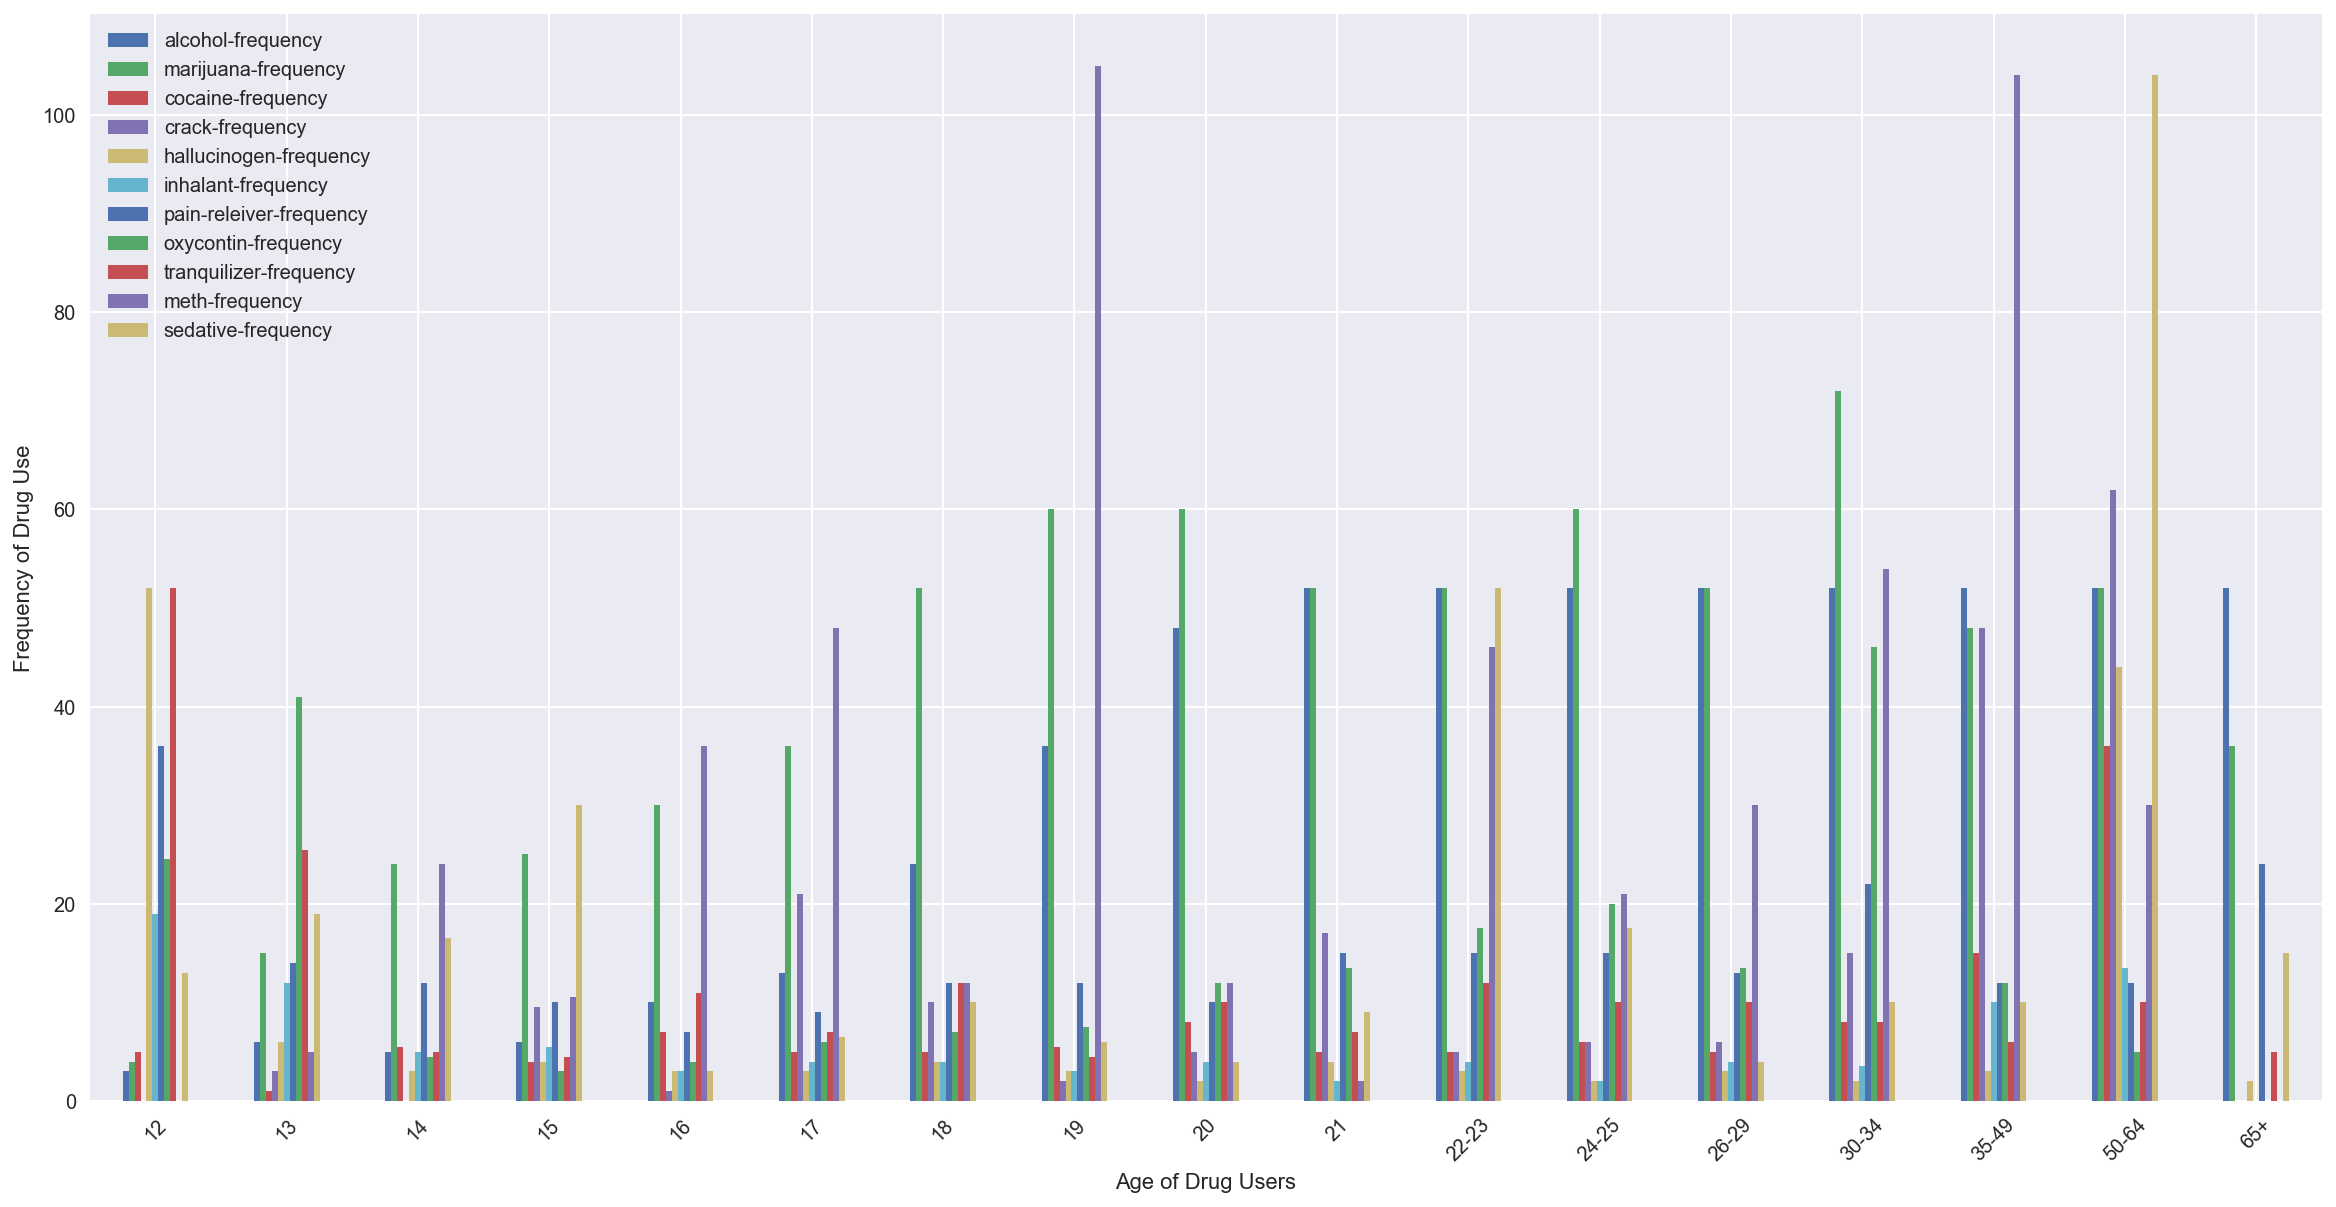

In [36]:
# Plotted the frequencies again because heroin and stimulants dwarfed the other data, 
# making it hard to read. Removed heroin and stimulants before plotting again
ax = drugs_frequency.drop(["heroin-frequency", "stimulant-frequency"], axis=1).plot(figsize=(20,10),
                                                                                   kind='bar', stacked=False, rot=45)
ax.set_xlabel("Age of Drug Users")
ax.set_ylabel("Frequency of Drug Use")

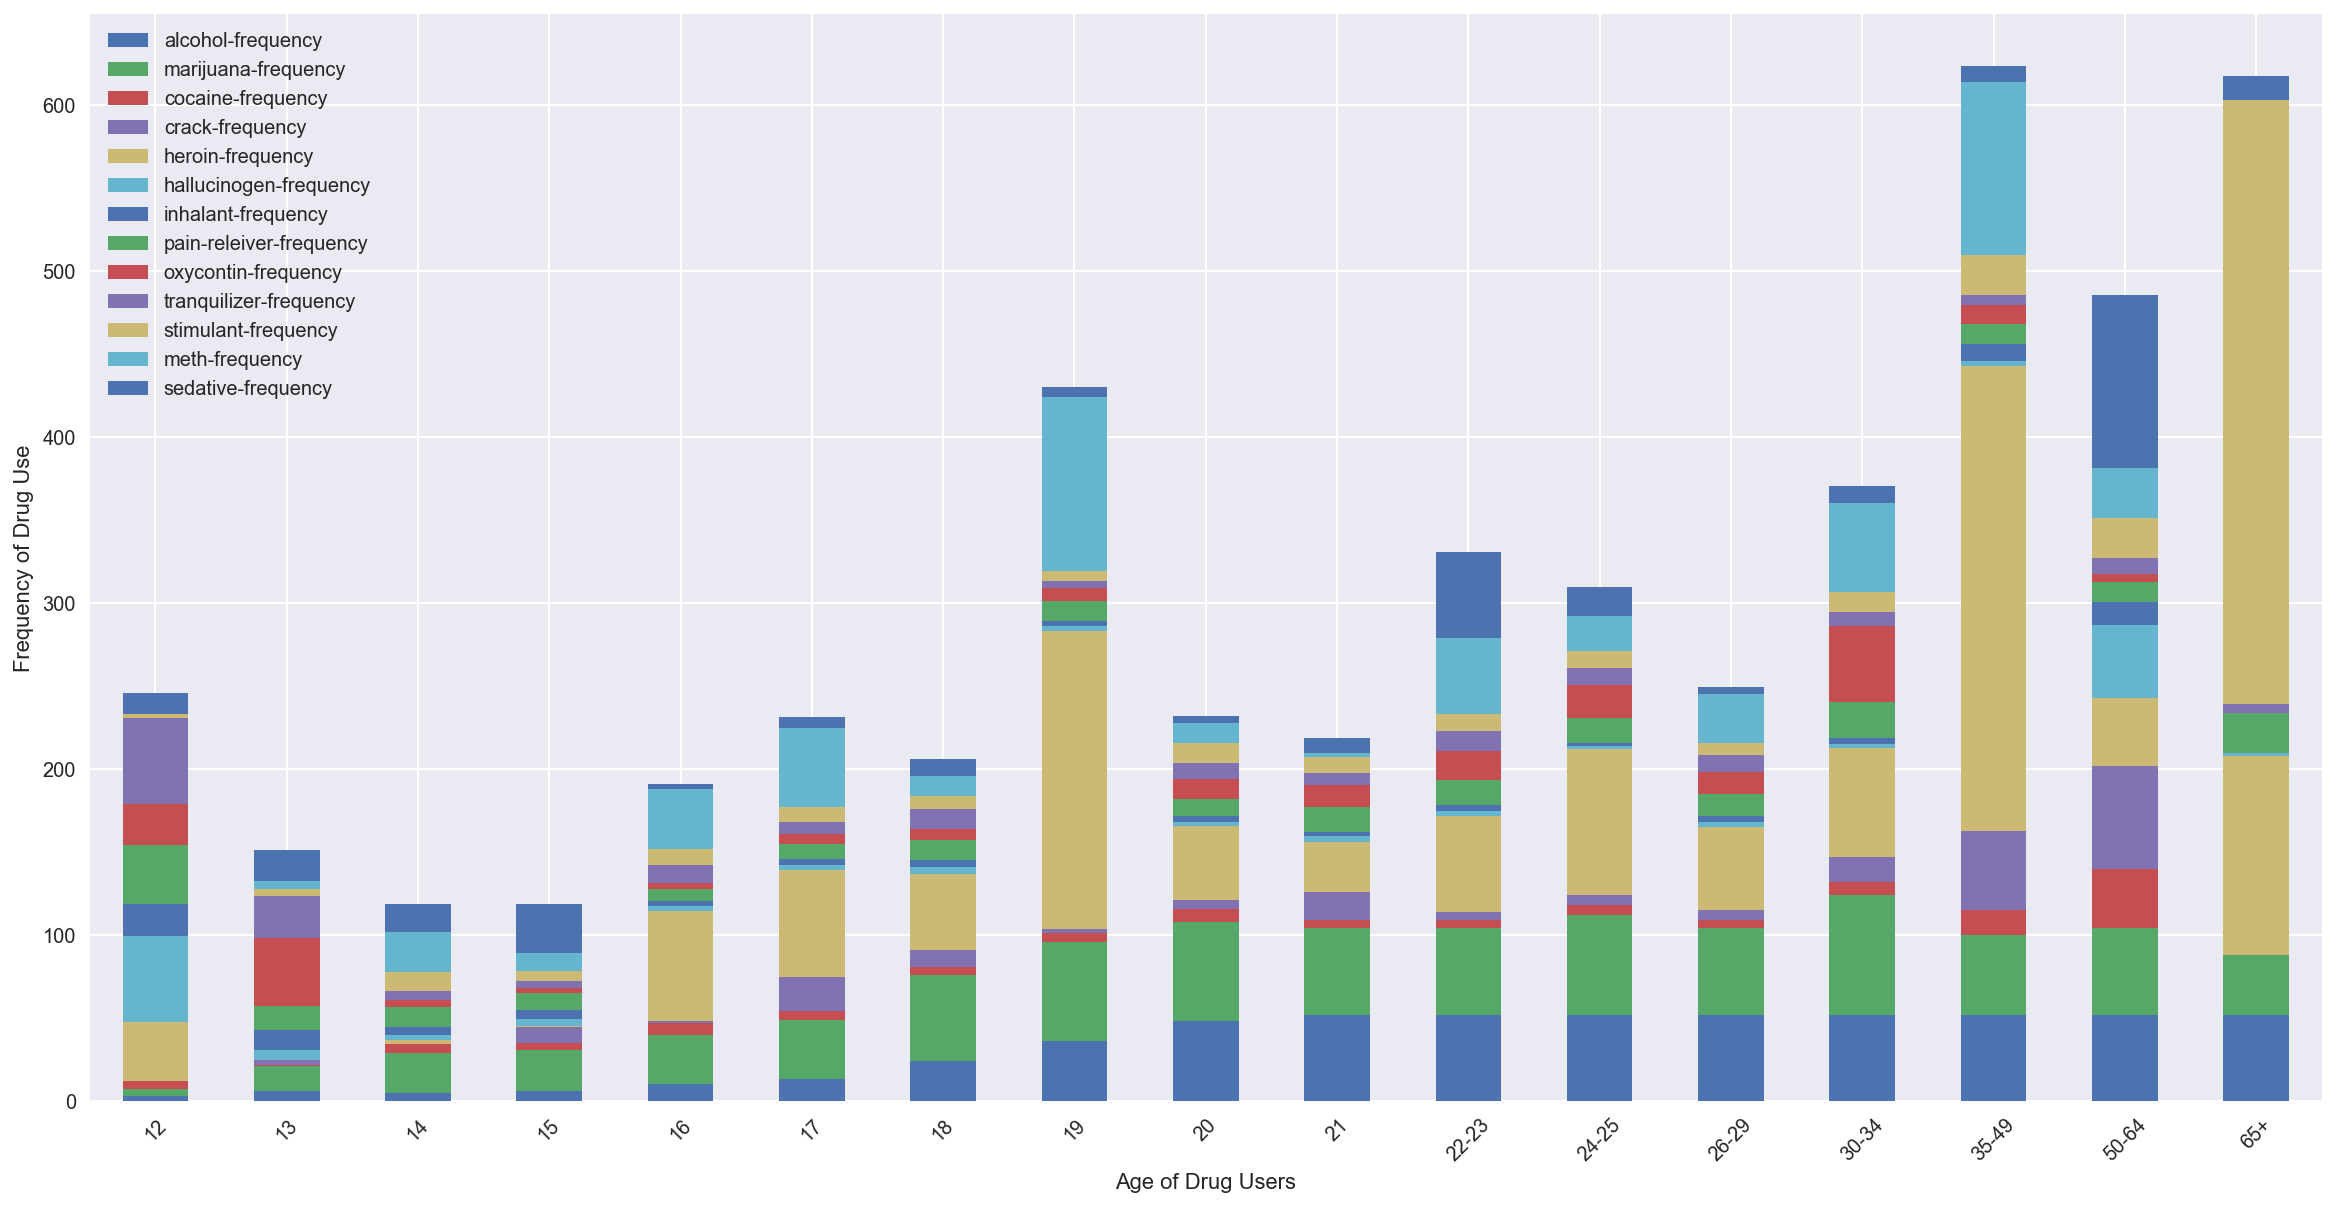

In [37]:
# Plotted the drug frequencies to get a better understand of general frequency of drug use. 
# This assumes that all frequencies are measured on the same scale.
ax = drugs_frequency.plot(figsize=(20,10), kind='bar', stacked=True, rot=45)
ax.set_xlabel("Age of Drug Users")
ax.set_ylabel("Frequency of Drug Use")

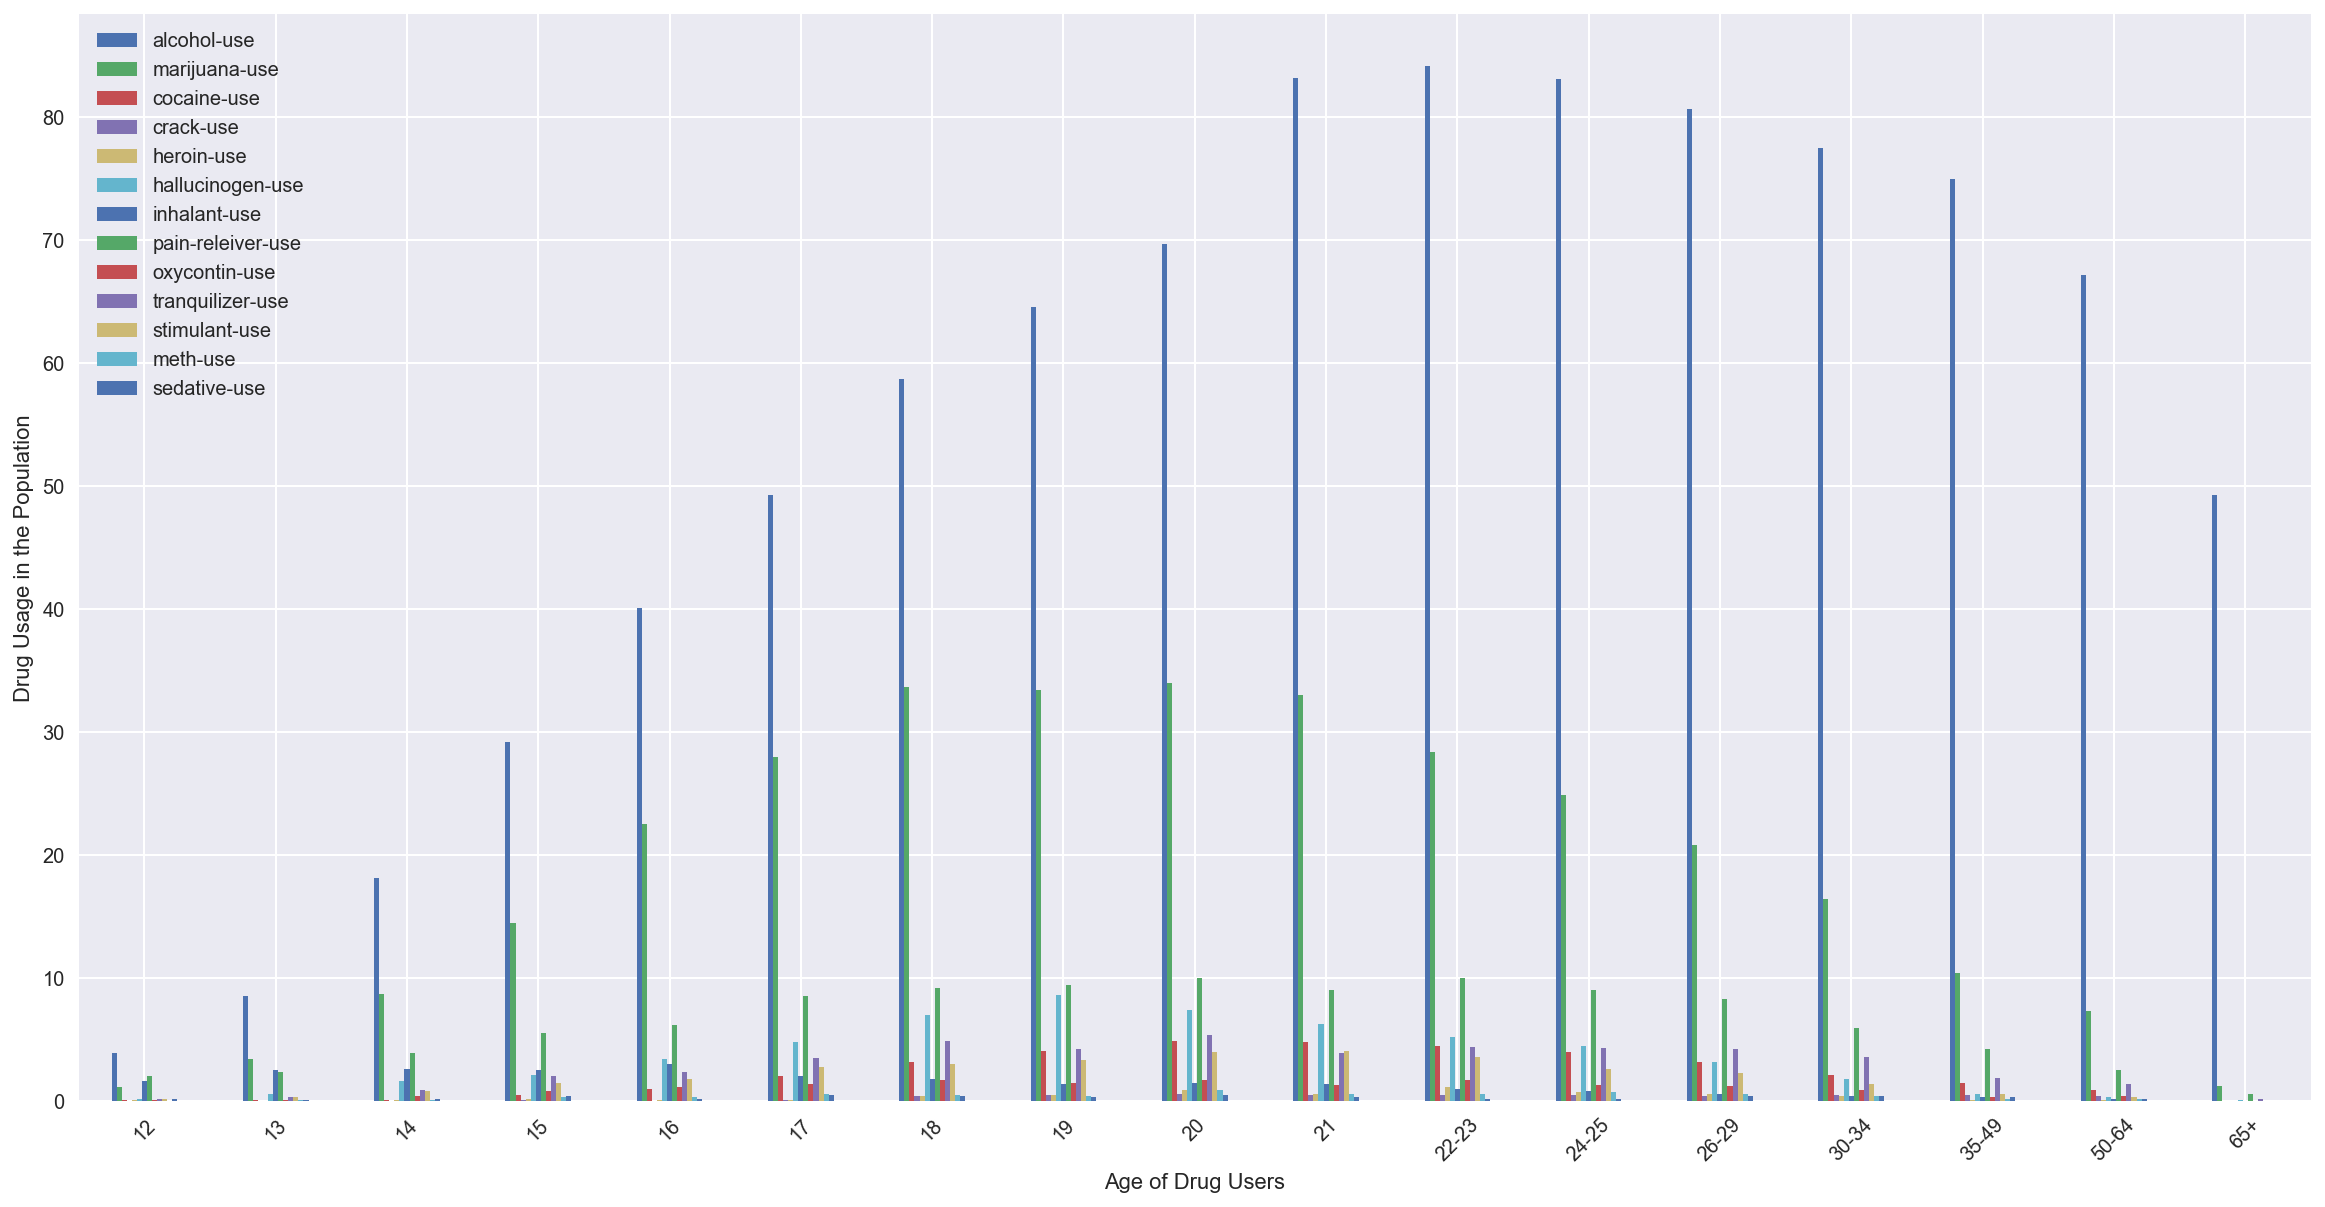

In [38]:
# Renaming indices in drug use subtable as well
drugs_use.rename({0: "12", 1: "13", 2: "14", 3: "15", 4:"16", 5:"17", 6:"18", 7:"19", 8:"20", 9:"21", 10:"22-23", 11:"24-25", 
                  12:"26-29", 13:"30-34", 14: "35-49", 15:"50-64", 16:"65+"}, inplace=True)

# Plot drug use
ax = drugs_use.plot(figsize=(20,10), kind='bar', stacked=False, rot=45)
ax.set_xlabel("Age of Drug Users")
ax.set_ylabel("Drug Usage in the Population")

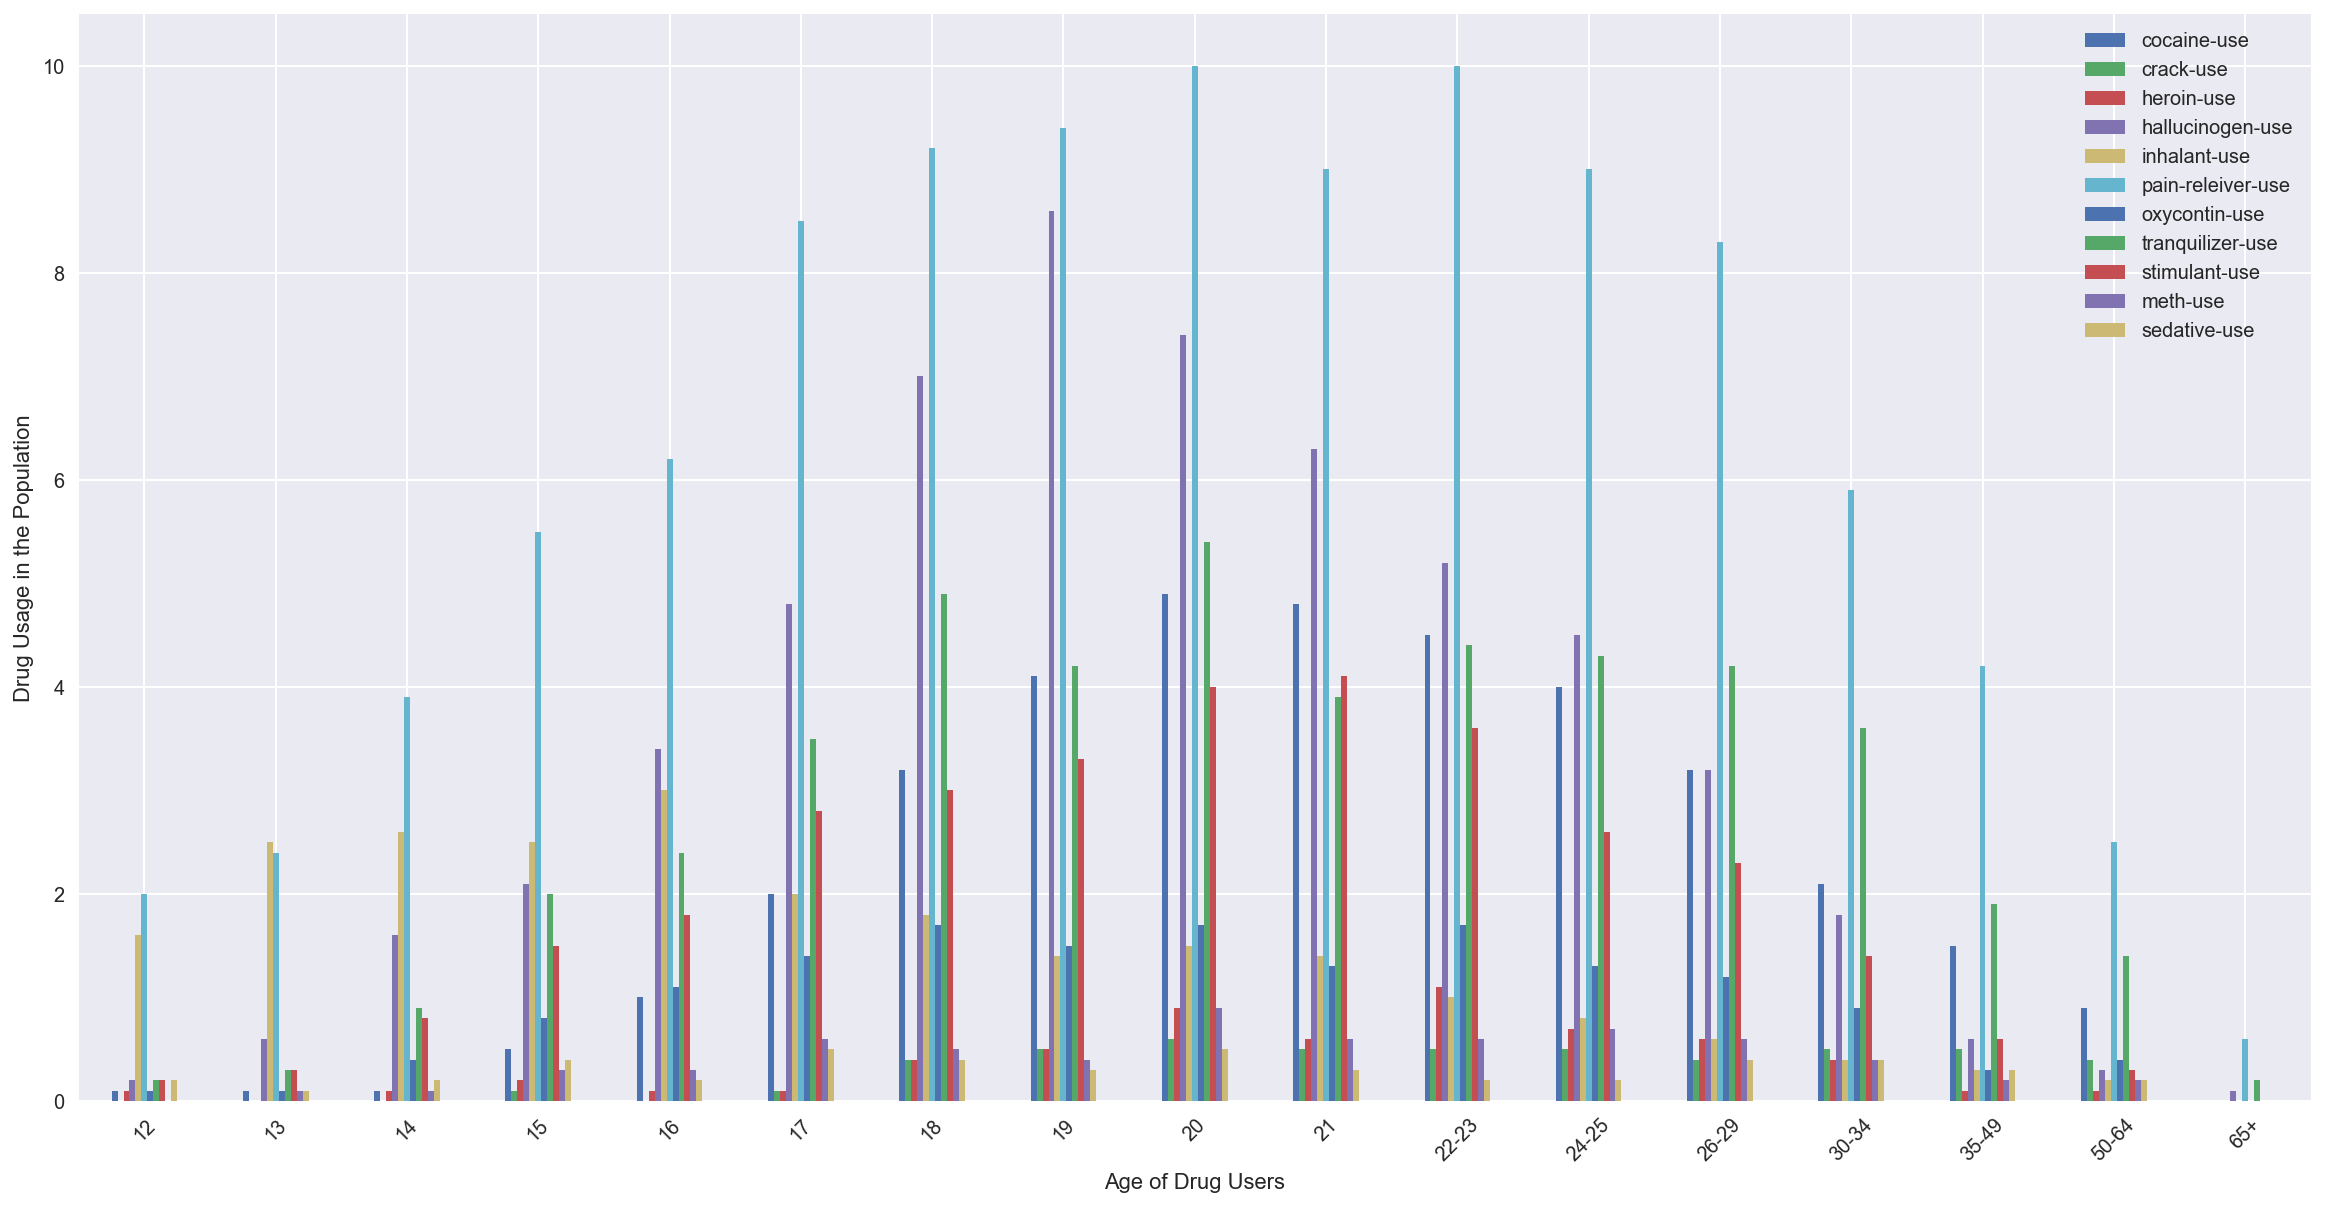

In [39]:
# This time, dropped alcohol and marijuana as they dwarfed the other categories
ax = drugs_use.drop(["alcohol-use", "marijuana-use"], axis=1).plot(figsize=(20,10), kind='bar', stacked=False, rot=45)
ax.set_xlabel("Age of Drug Users")
ax.set_ylabel("Drug Usage in the Population")

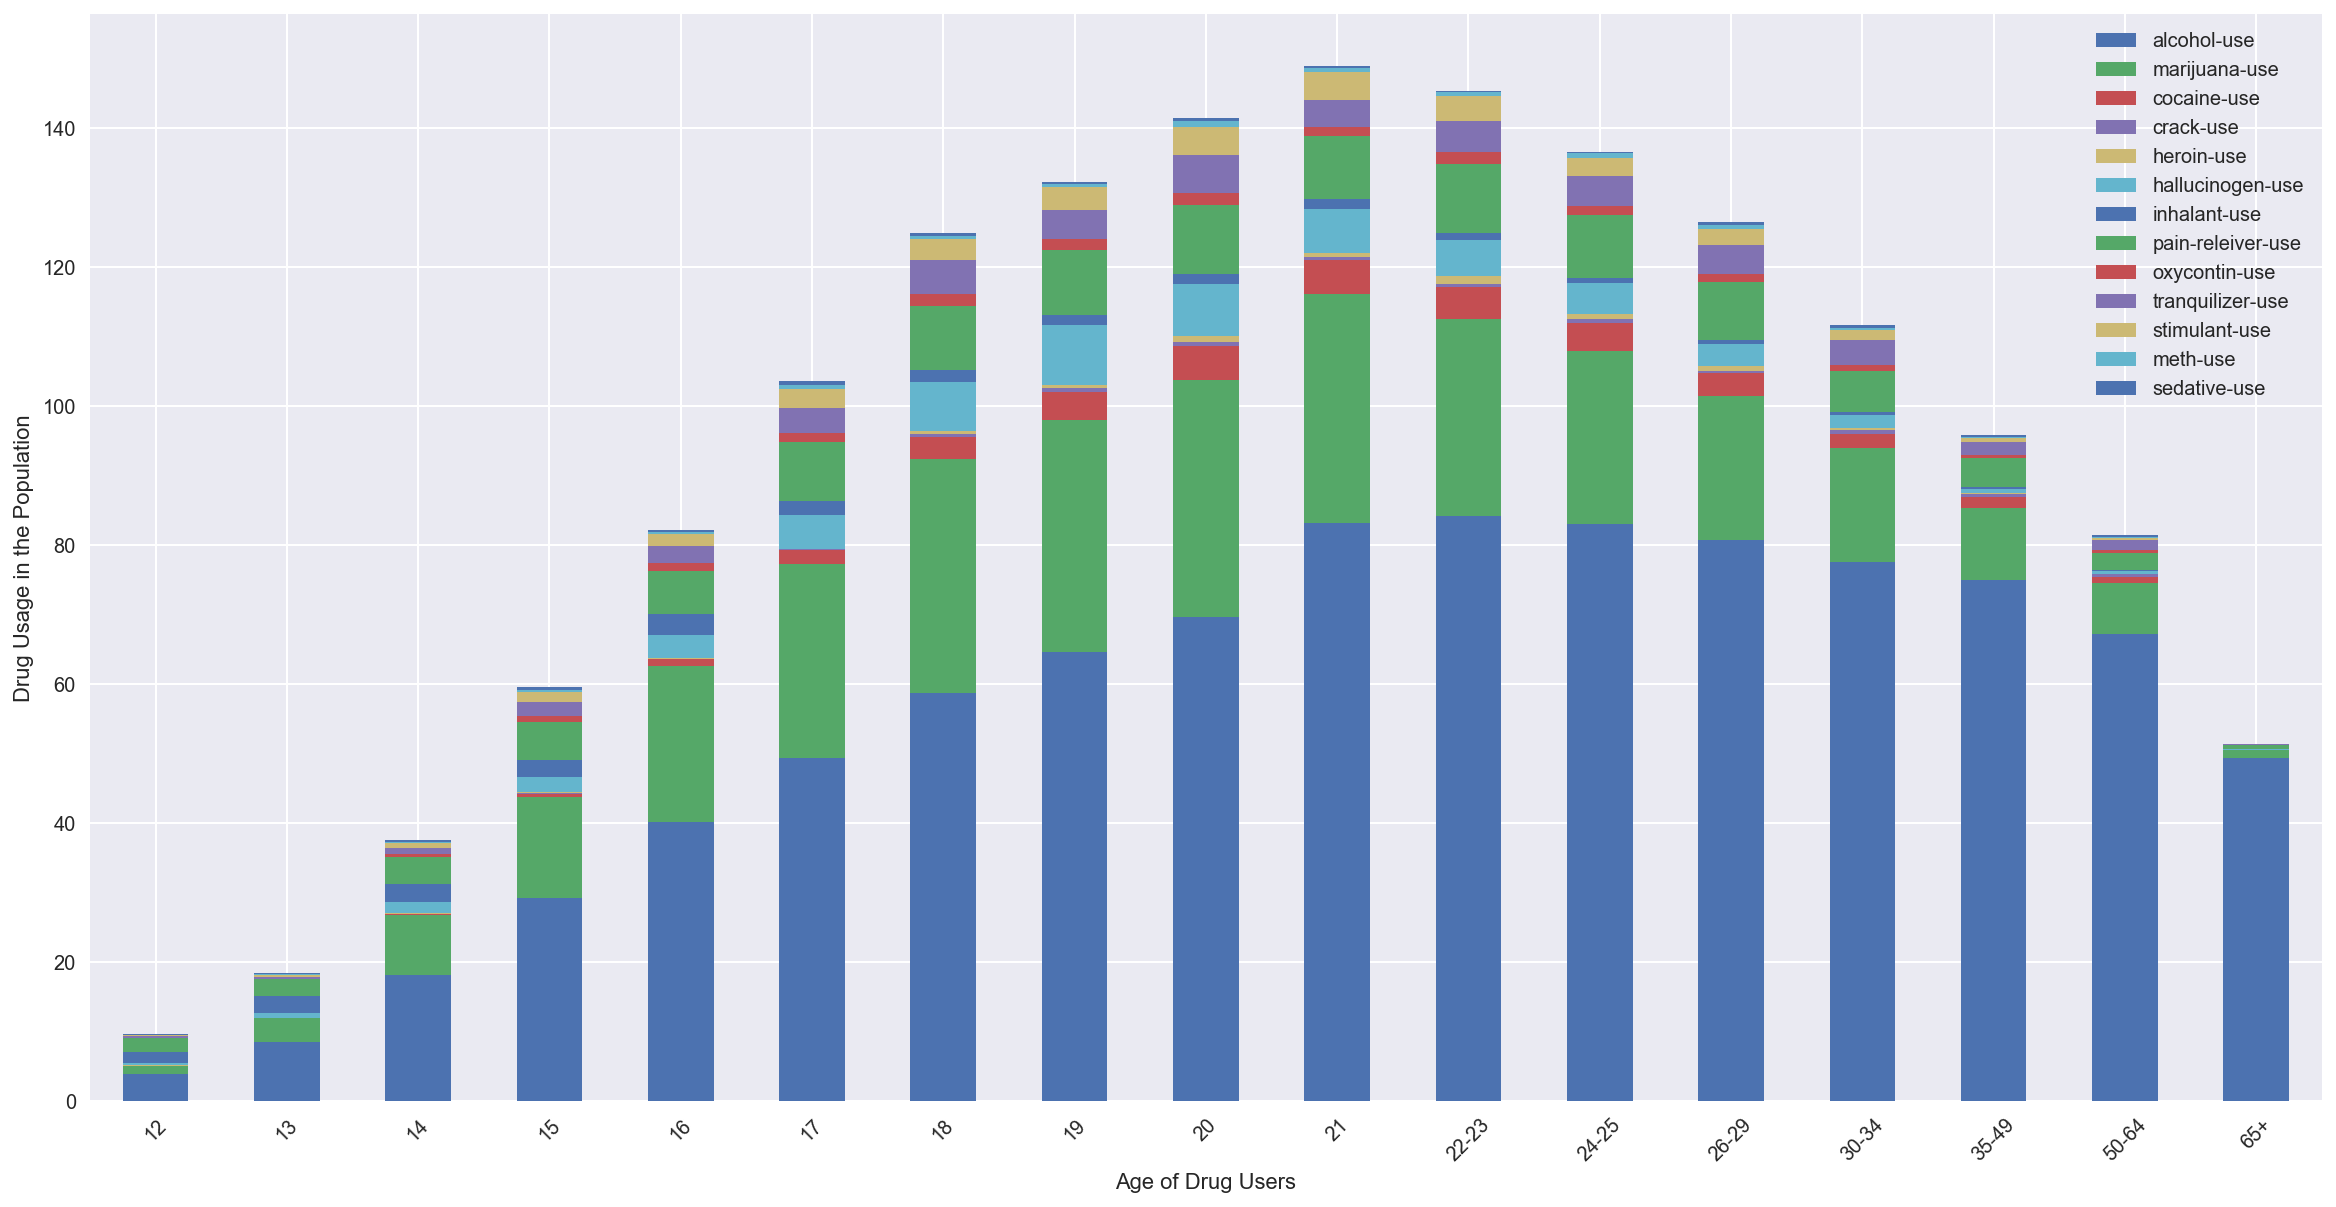

In [40]:
# Looked at general drug use with respect to age
ax = drugs_use.plot(figsize=(20,10), kind='bar', stacked=True, rot=45)
ax.set_xlabel("Age of Drug Users")
ax.set_ylabel("Drug Usage in the Population")

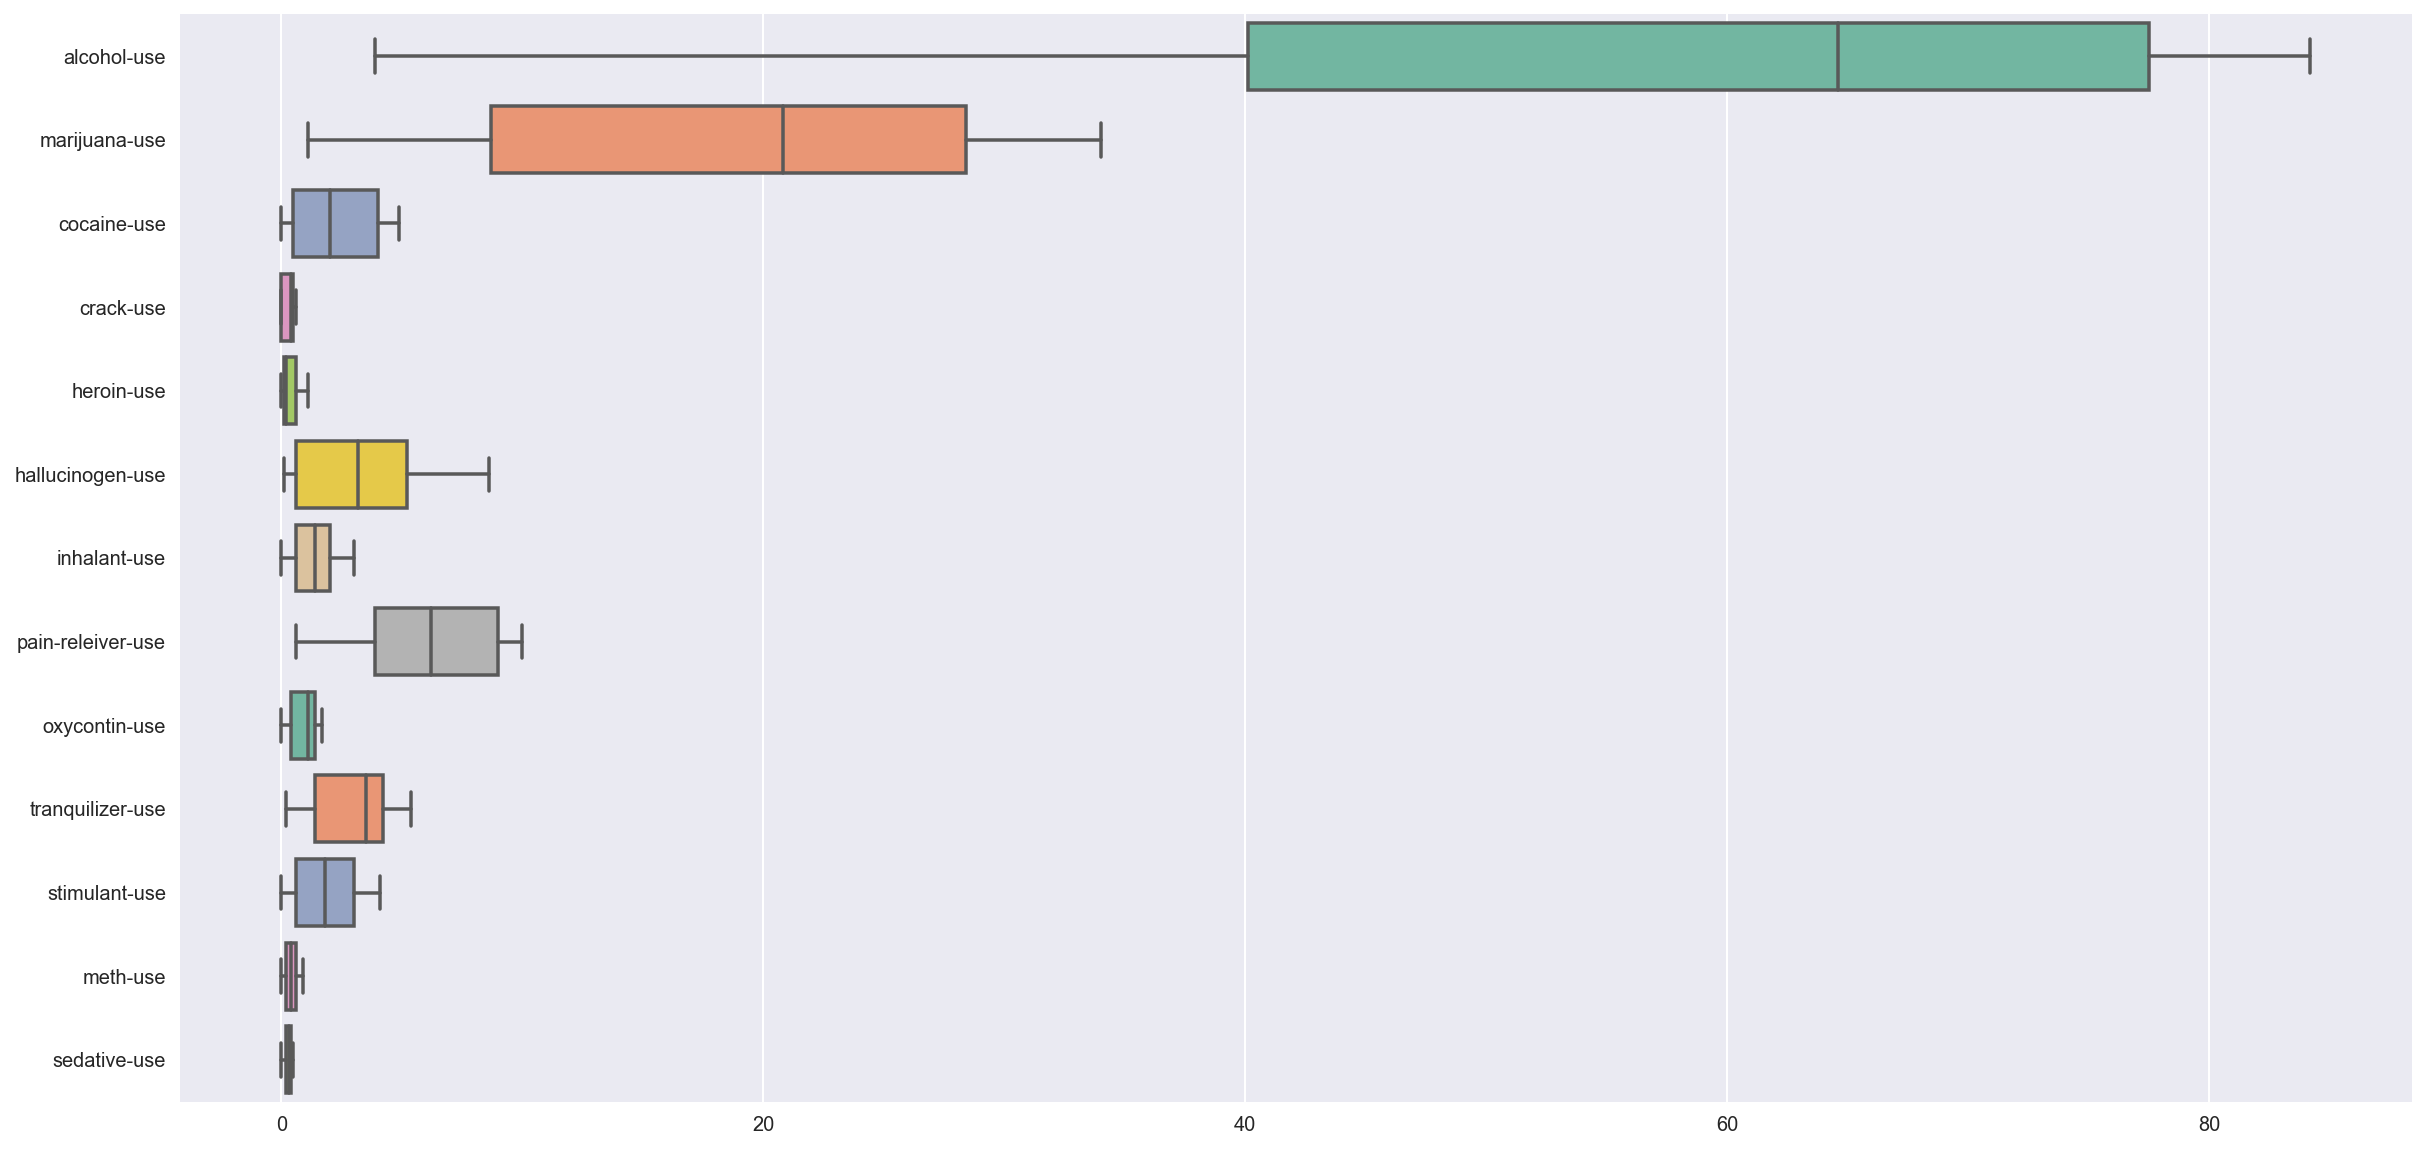

In [41]:
# Basic box plots on drug use
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=drugs_use, orient="h", palette="Set2")

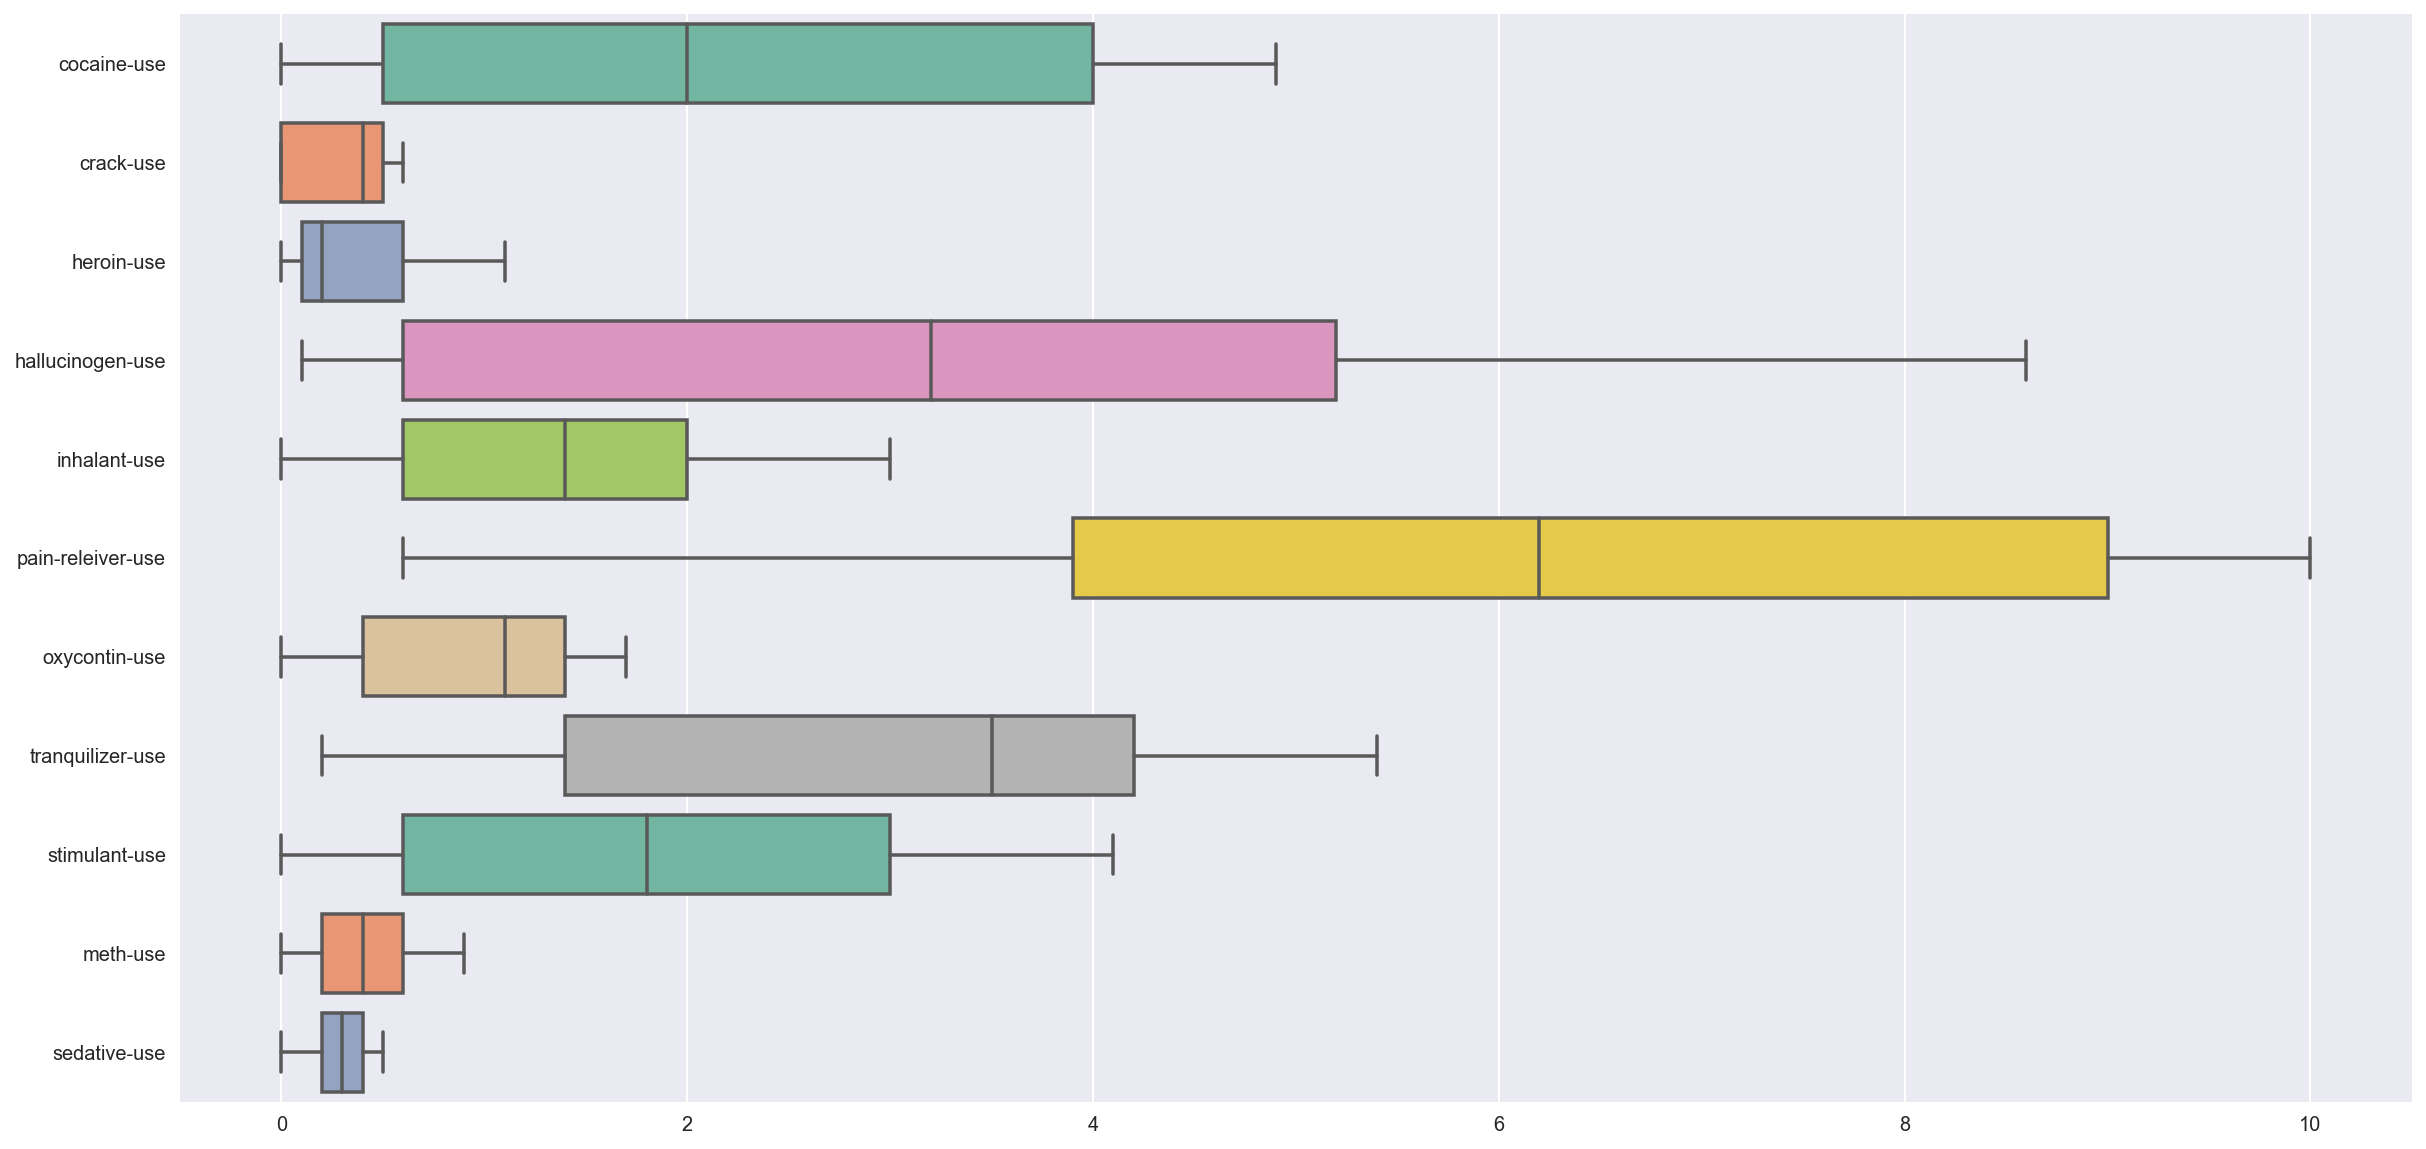

In [42]:
# Again, removed marijuana and alcohol
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=drugs_use.drop(["alcohol-use", "marijuana-use"], axis=1), orient="h", palette="Set2")

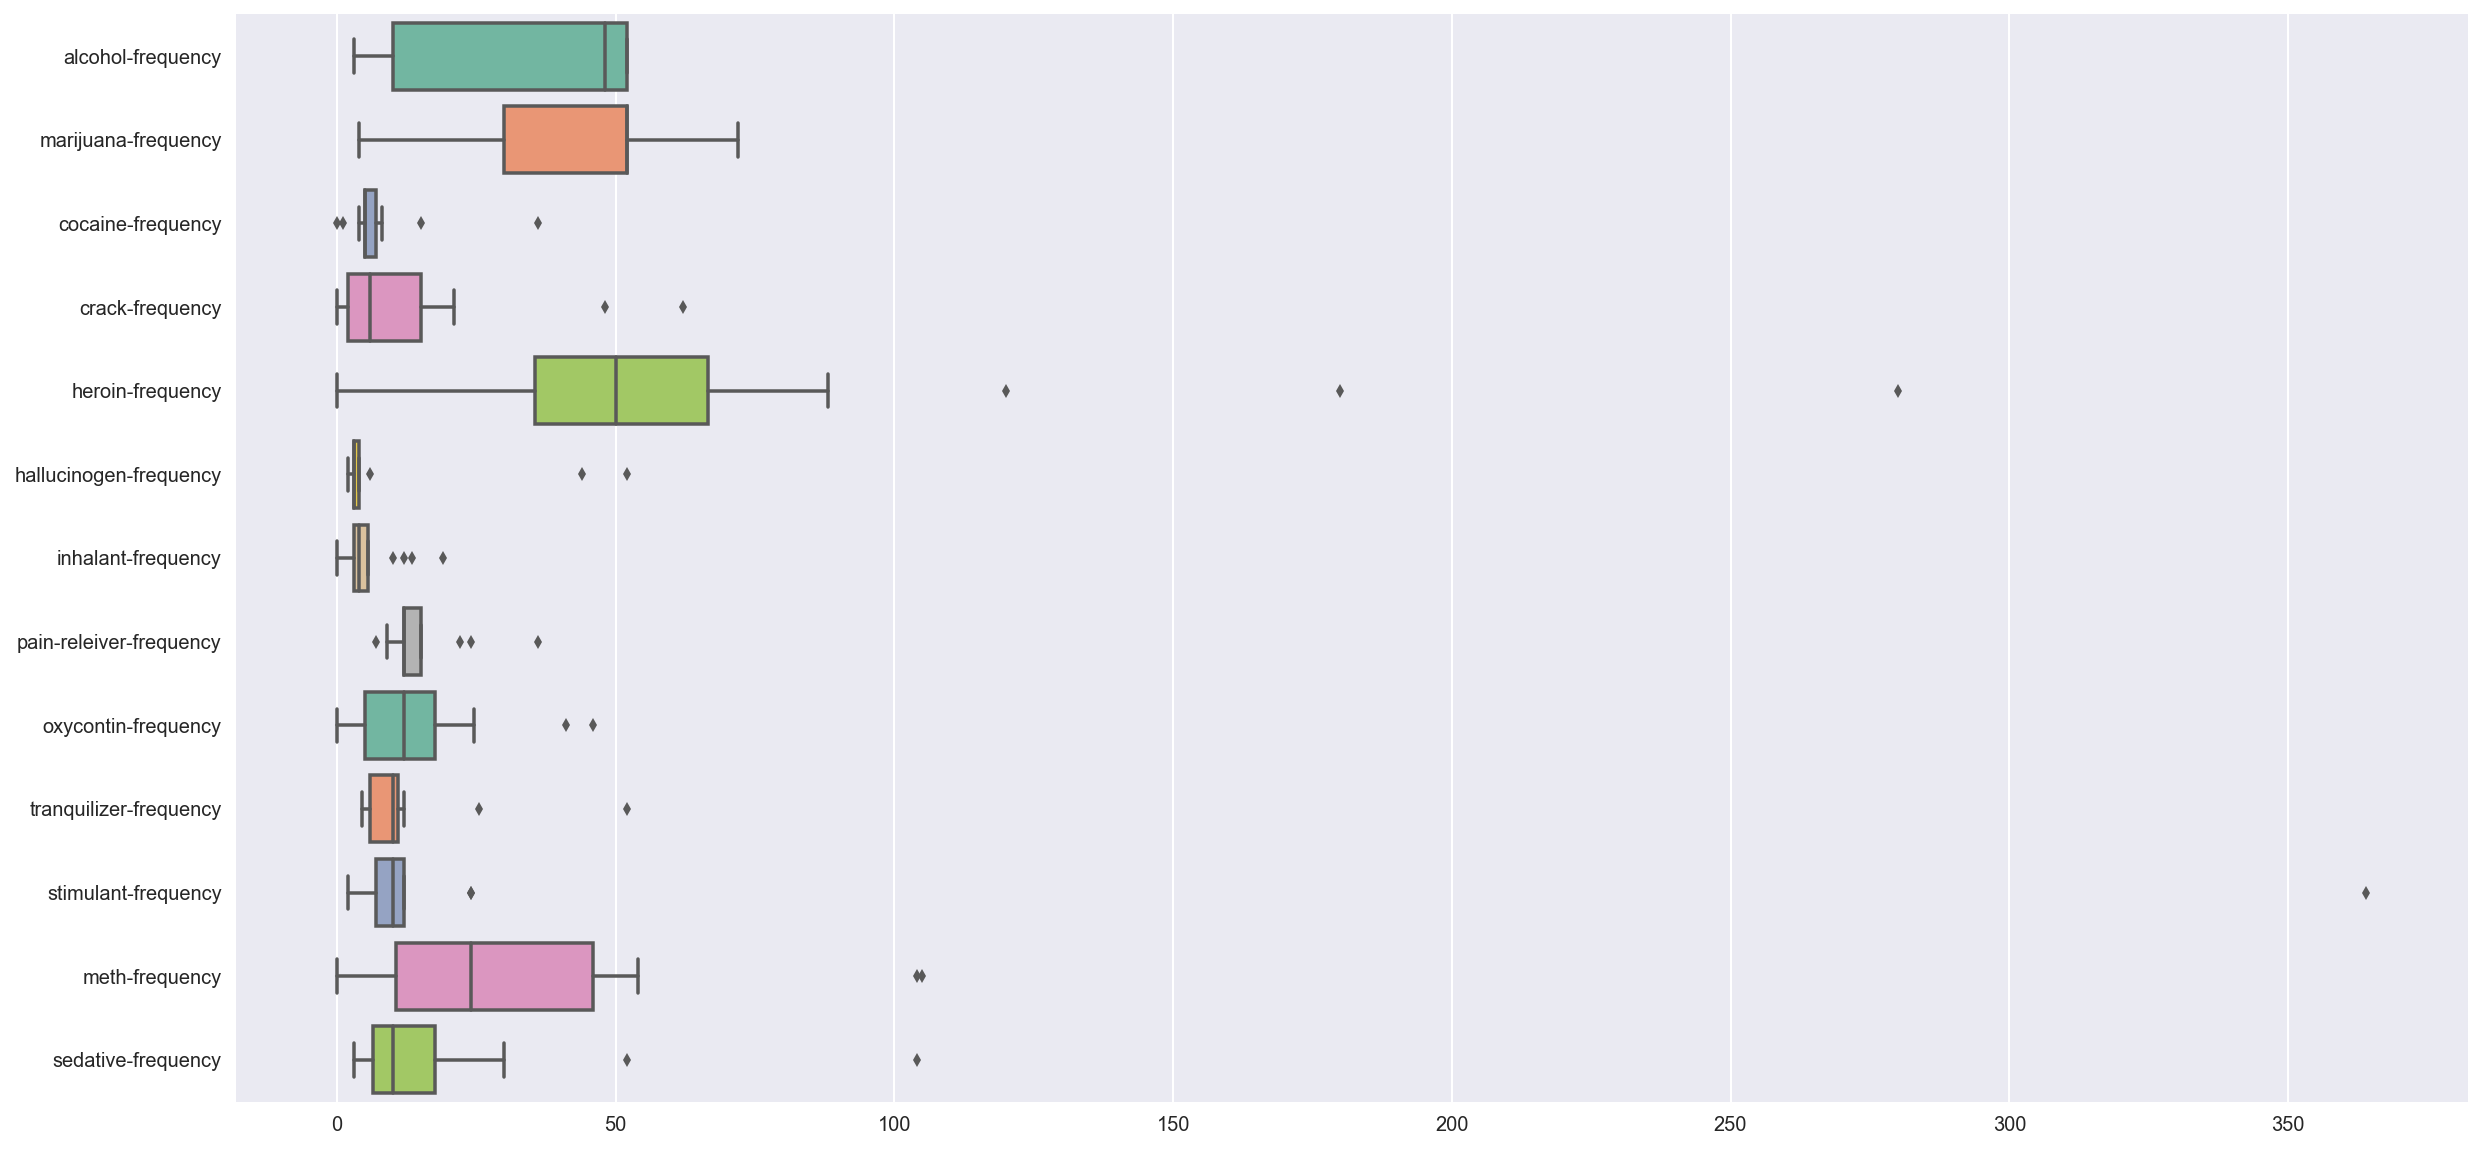

In [43]:
# Basic box plots on frequency of drug use
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=drugs_frequency, orient="h", palette="Set2")

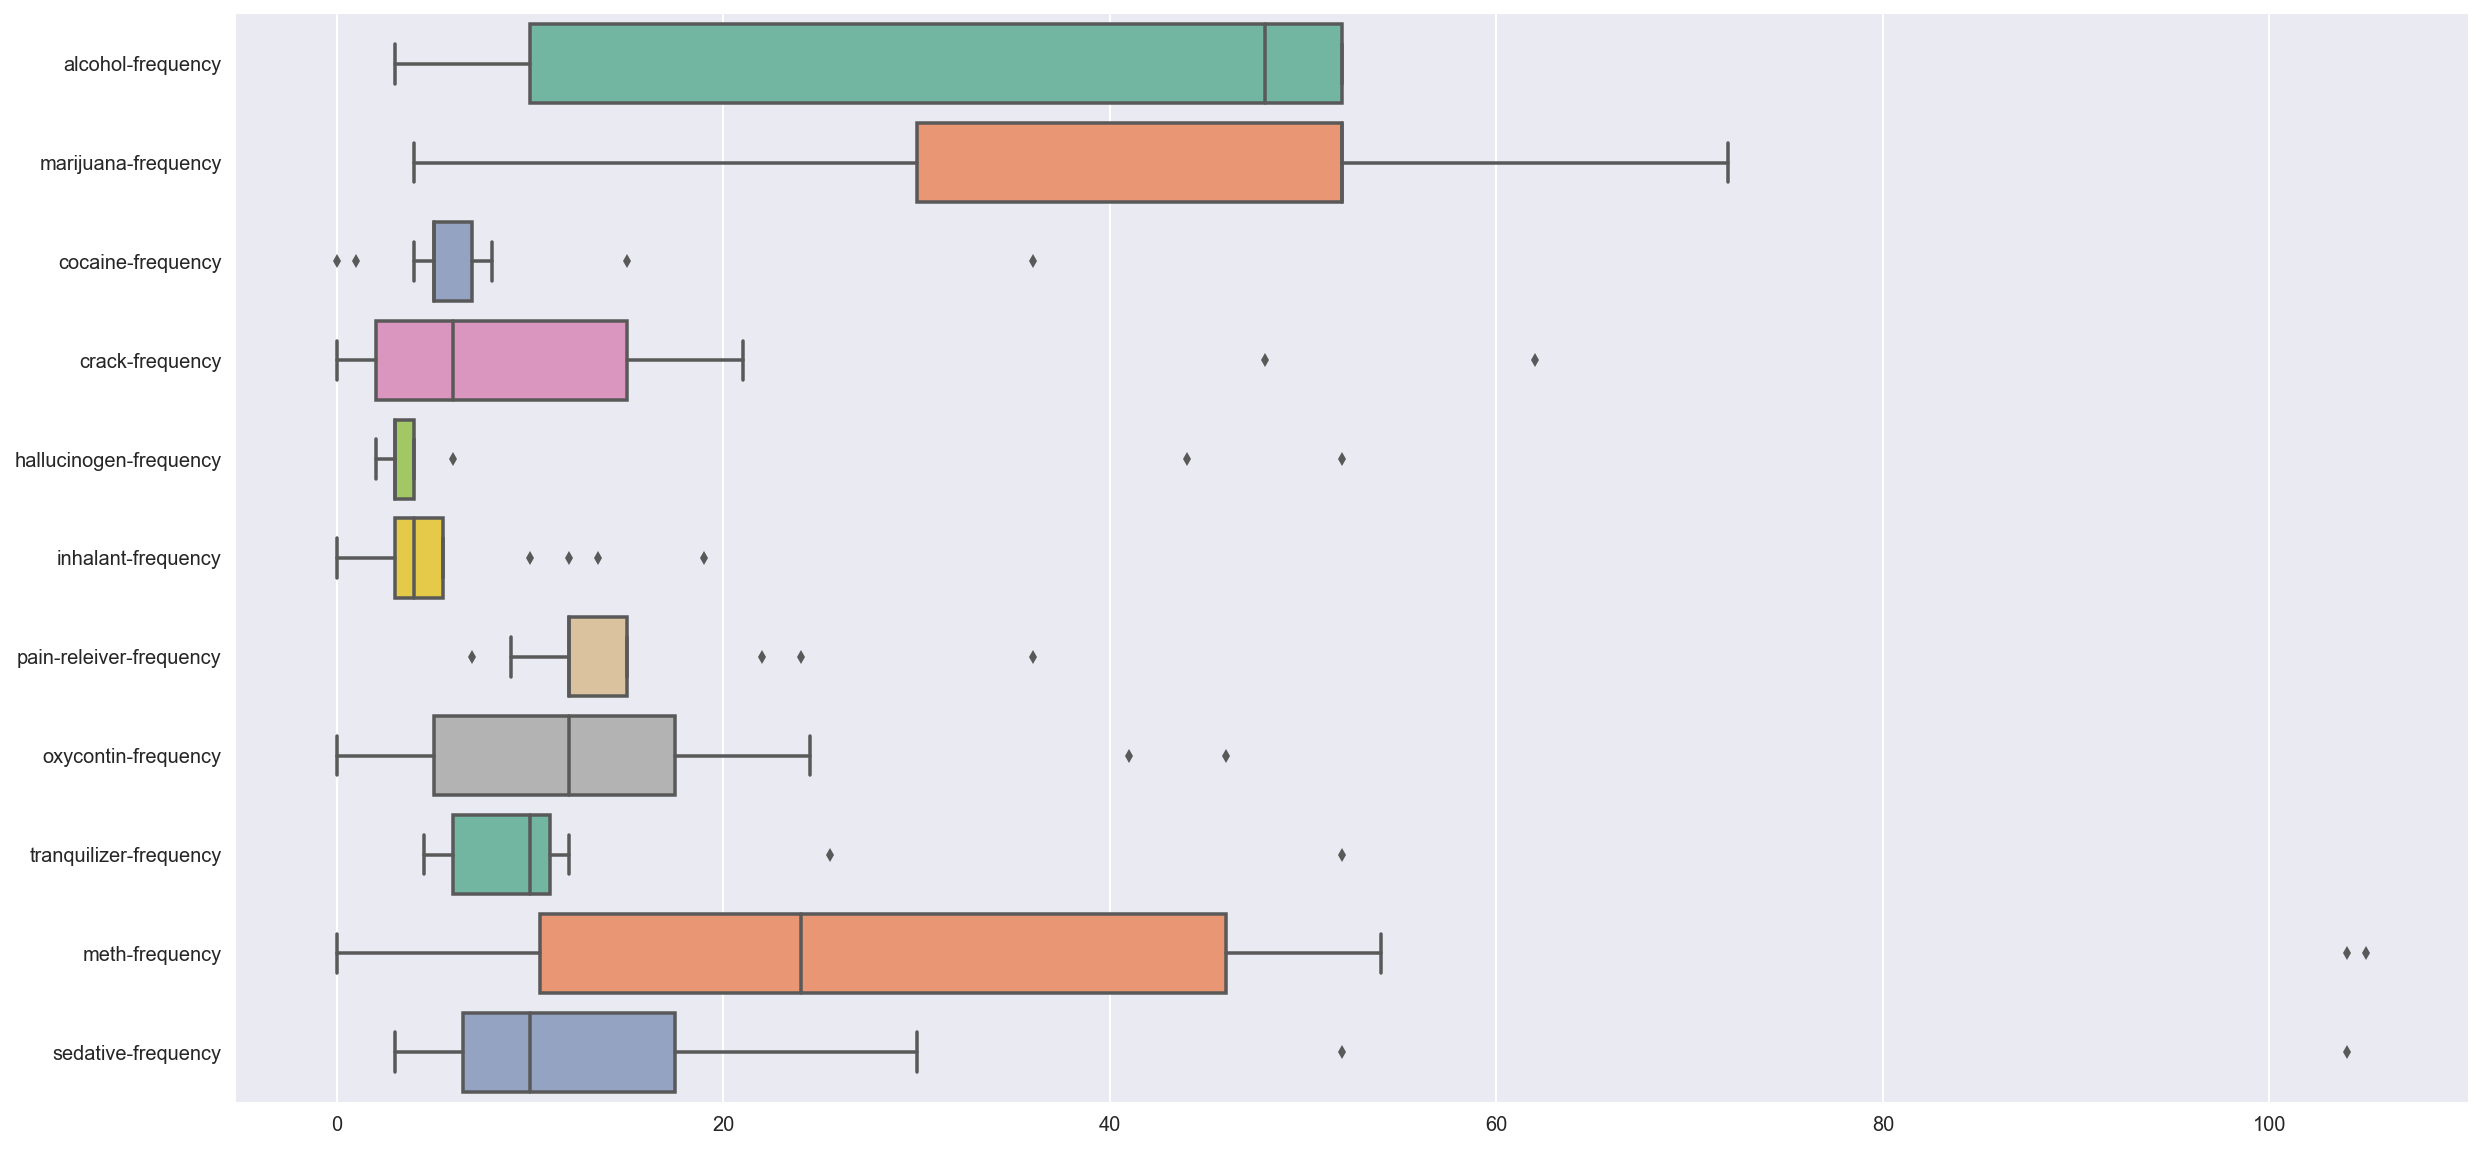

In [44]:
# Again, dropped heroin and stimulant to better view the other statistics
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=drugs_frequency.drop(["heroin-frequency", "stimulant-frequency"], axis=1), orient="h", palette="Set2")

In [45]:
# Look at basic descriptive statistics from table
drugs.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,0.352941,...,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,0.333762,...,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,0.100000,...,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,0.600000,...,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


In [46]:
drugs_use.corr("pearson")

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
alcohol-use,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.617523,0.589219,0.735785,0.582241,0.682531,0.318268
marijuana-use,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.966226,0.971733,0.935199,0.968096,0.870446,0.616766
cocaine-use,0.773458,0.883789,1.000000,0.835727,0.899944,0.855668,-0.214609,0.906638,0.865626,0.920430,0.923954,0.889353,0.461914
crack-use,0.877378,0.620670,0.835727,1.000000,0.750790,0.556222,-0.543499,0.652764,0.603003,0.772651,0.618008,0.694324,0.438421
heroin-use,0.677614,0.711613,0.899944,0.750790,1.000000,0.683674,-0.215961,0.805868,0.775321,0.818583,0.808024,0.816620,0.333649
hallucinogen-use,0.463702,0.959353,0.855668,0.556222,0.683674,1.000000,0.173030,0.909333,0.916777,0.862900,0.940008,0.780071,0.518700
inhalant-use,-0.648248,0.127336,-0.214609,-0.543499,-0.215961,0.173030,1.000000,0.092045,0.110492,-0.103745,0.108381,-0.059903,0.110611
pain-releiver-use,0.617523,0.966226,0.906638,0.652764,0.805868,0.909333,0.092045,1.000000,0.976445,0.959283,0.961484,0.918051,0.636666
oxycontin-use,0.589219,0.971733,0.865626,0.603003,0.775321,0.916777,0.110492,0.976445,1.000000,0.955081,0.947492,0.895790,0.625929
tranquilizer-use,0.735785,0.935199,0.920430,0.772651,0.818583,0.862900,-0.103745,0.959283,0.955081,1.000000,0.909784,0.936270,0.674618


In [47]:
drugs_frequency.corr("pearson")

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
alcohol-frequency,1.000000,0.818769,0.317172,0.364267,0.432405,-0.174622,-0.351677,0.007087,0.049388,-0.415026,0.260304,0.252246,0.201423
marijuana-frequency,0.818769,1.000000,0.265193,0.273167,0.346001,-0.380430,-0.537857,-0.285292,0.066200,-0.591449,-0.069454,0.417947,0.048777
cocaine-frequency,0.317172,0.265193,1.000000,0.872260,0.143095,0.537645,0.413751,-0.179859,-0.154491,-0.103142,-0.183692,0.240660,0.761572
crack-frequency,0.364267,0.273167,0.872260,1.000000,0.335815,0.341344,0.350775,-0.218321,-0.115546,-0.215342,-0.125405,0.346559,0.602101
heroin-frequency,0.432405,0.346001,0.143095,0.335815,1.000000,-0.188085,-0.089068,-0.033484,-0.148807,-0.264485,0.218212,0.782122,-0.191638
hallucinogen-frequency,-0.174622,-0.380430,0.537645,0.341344,-0.188085,1.000000,0.834993,0.547363,0.061814,0.705734,-0.103980,-0.224738,0.533095
inhalant-frequency,-0.351677,-0.537857,0.413751,0.350775,-0.089068,0.834993,1.000000,0.420682,0.291686,0.766372,-0.296318,-0.075928,0.376364
pain-releiver-frequency,0.007087,-0.285292,-0.179859,-0.218321,-0.033484,0.547363,0.420682,1.000000,0.410163,0.699282,0.324717,-0.291527,-0.045213
oxycontin-frequency,0.049388,0.066200,-0.154491,-0.115546,-0.148807,0.061814,0.291686,0.410163,1.000000,0.433366,-0.292730,-0.028618,-0.113600
tranquilizer-frequency,-0.415026,-0.591449,-0.103142,-0.215342,-0.264485,0.705734,0.766372,0.699282,0.433366,1.000000,-0.180415,-0.360901,-0.014524


# Answer to Question 7.2 Analysis

## Box Plots
Starting with the most obvious, the box plots for drug frequency show a great deal of outliers. Some look like they are far enough away that they could be discarded, but due to the low number of sample rows, it becomes difficult to exclude an entire age group. We would need to dive into the specifics of the data (from the "n") since this appears to be a collection of lots of data and clean that particular set to remove the outliers.  

Still, I believe that the box plots give us a good idea that this data should be taken with a grain of salt.

## Bar Plots: Drug Use
Looking at the graph and the data, alcohol and marijuana see the most amount of use in all age groups. Generally, it seems that drug use starts in the teens and peaks around the early 20s. The exception to this is alcohol, which reduces much more gradually than the rest as the population ages. In other words, the population that is most at risk for drug use are adults in their early 20s. 

## Bar Plots: Drug Frequency
Unlike drug use, alcohol and marijuana do not have the highest use frequency. That dubious honor belongs to heroin and stimulants. Stimulants makes sense, in a way, because adult consumption of coffee is a huge part of daily life, and many adults drink coffee daily and several times a day. While cocaine does not have the highest drug use in the population, anyone that starts on cocaine is likely to use it frequently. Therefore, a target population for intervention would also include cocaine users.  

## Descriptive Statistics
Without going into the step-by-step details, looking at the correlation values for drug use, it seems that certain drugs may have a higher chance of being used at the same time as others. This trend is not as apparent with frequency between drugs, which makes sense, because different drugs have different degrees of addictiveness. 



### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

H0 = People in the general population who use marijuana are more likely to also use alcohol  
HA = People in the general population who use marijuana are less likely to also use alcohol

Description and deliverables:  
1.) Plot of alcohol use as age progresses, plot of marijuana use as age progresses  
2.) Bar plots  
2.) Spearman's correlation because we are not sure the two data sets are normally distributed  
3.) Two-tailed Welsh's t-test because we cannot assume equal variance

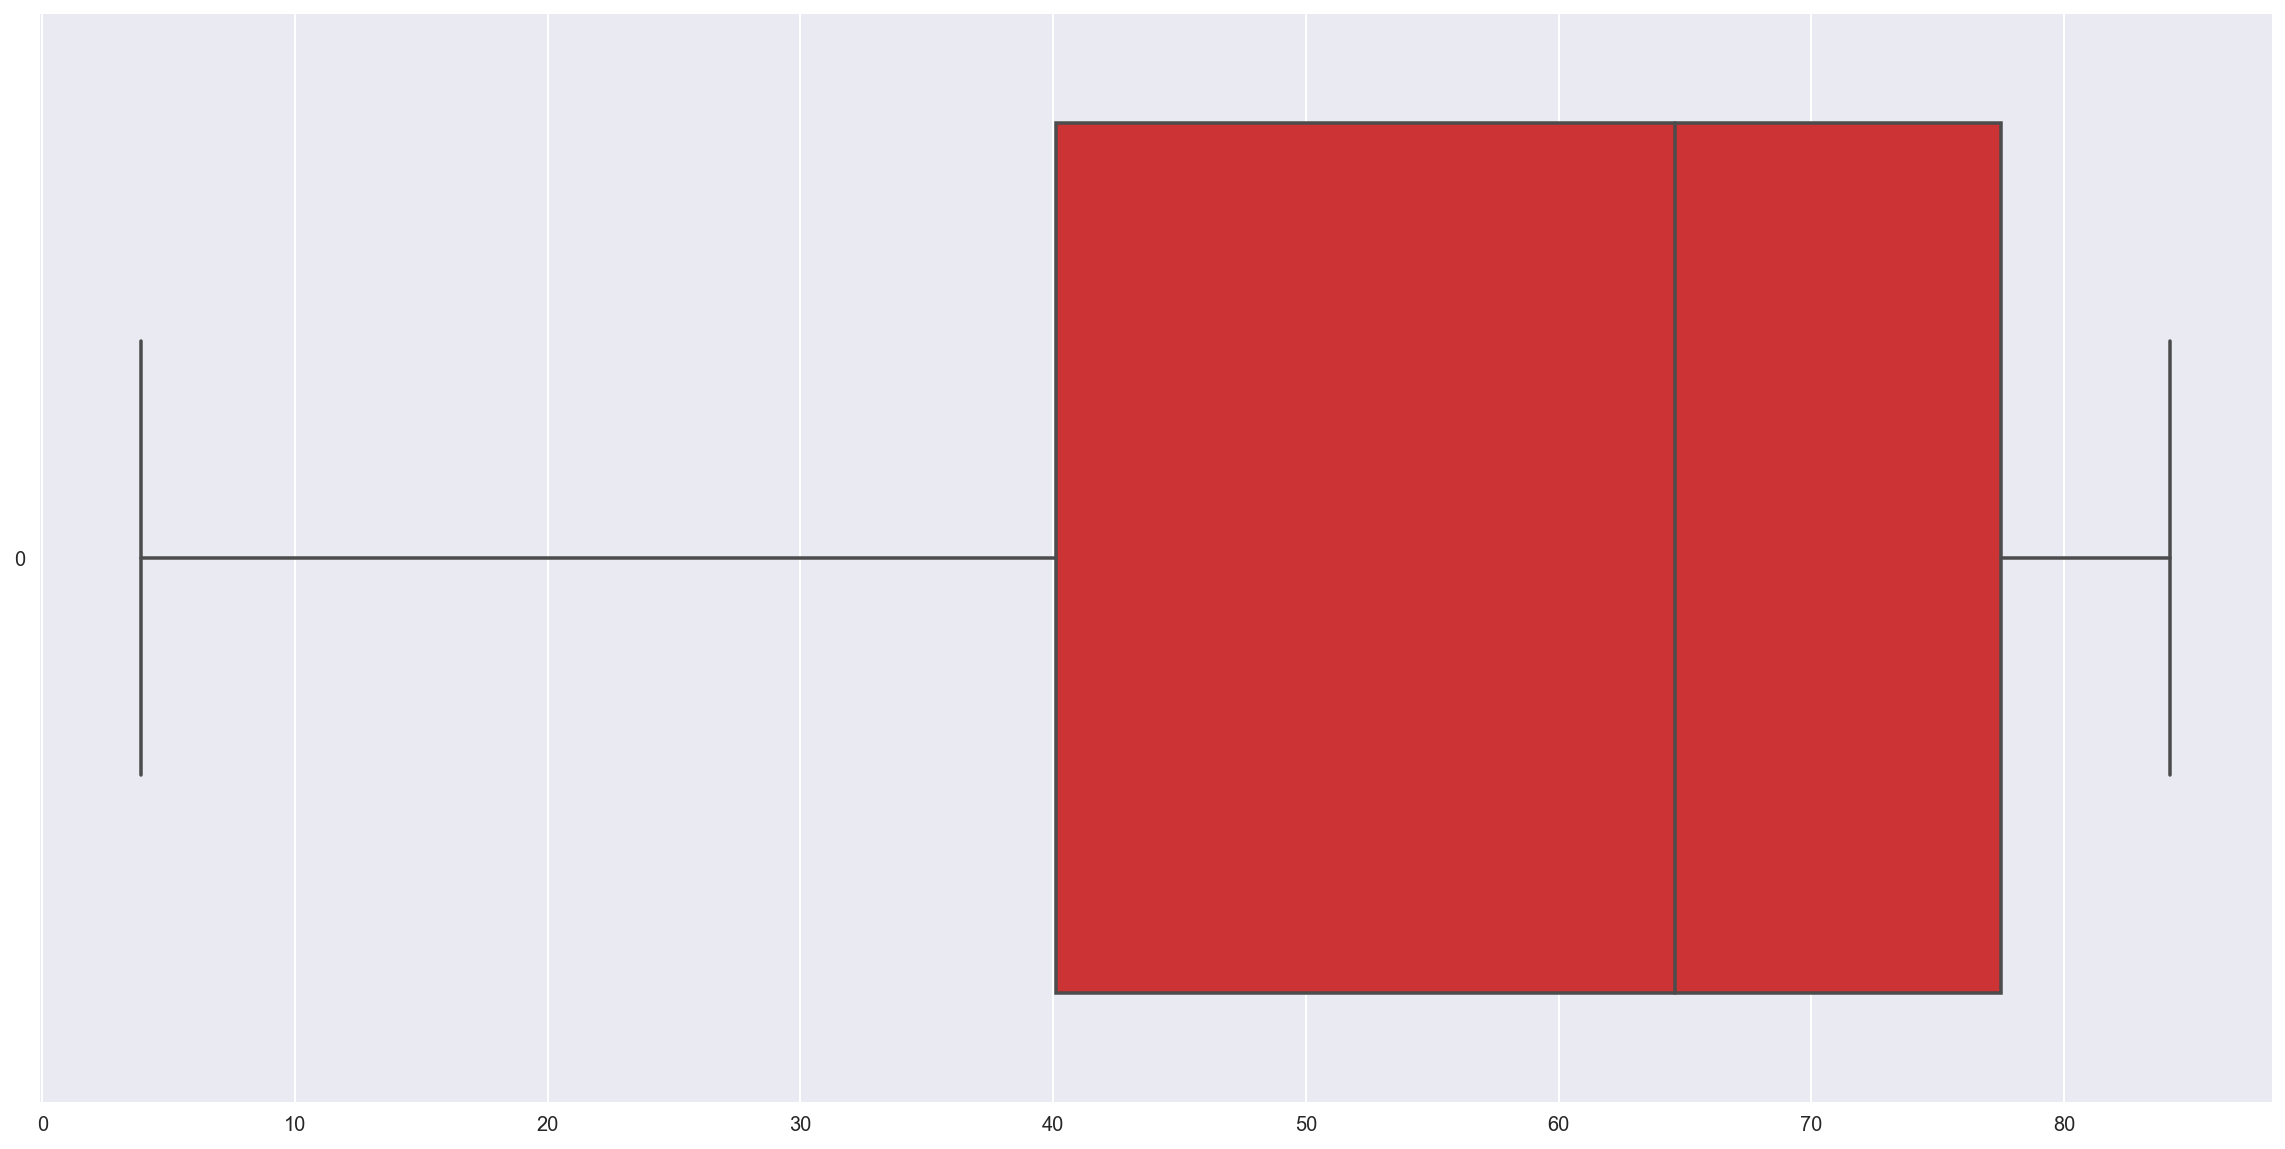

In [48]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=drugs_use["alcohol-use"], orient="h", palette="Set1")

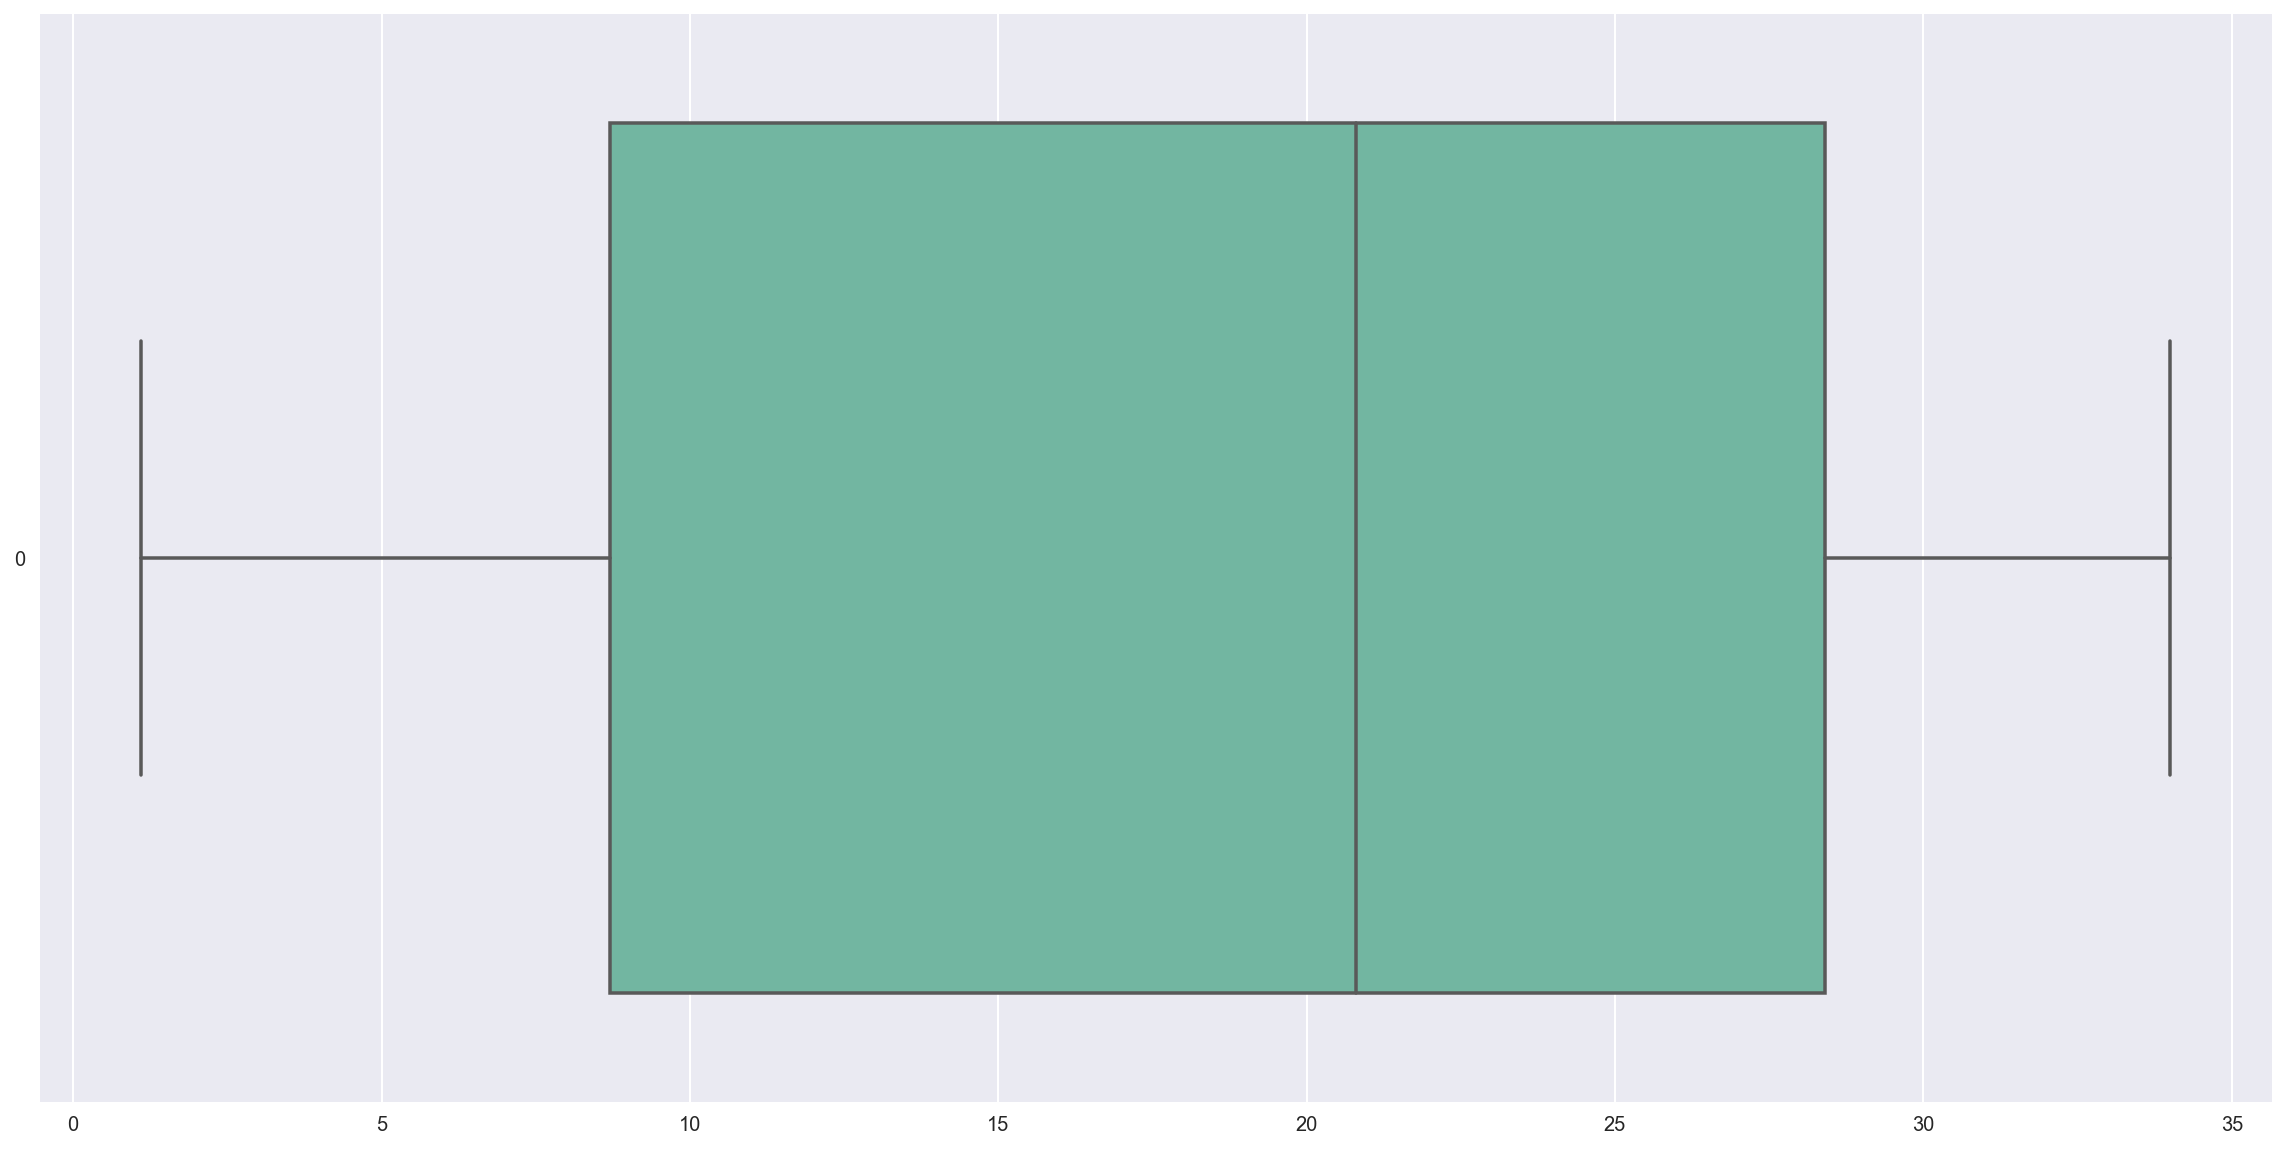

In [49]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=drugs_use["marijuana-use"], orient="h", palette="Set2")

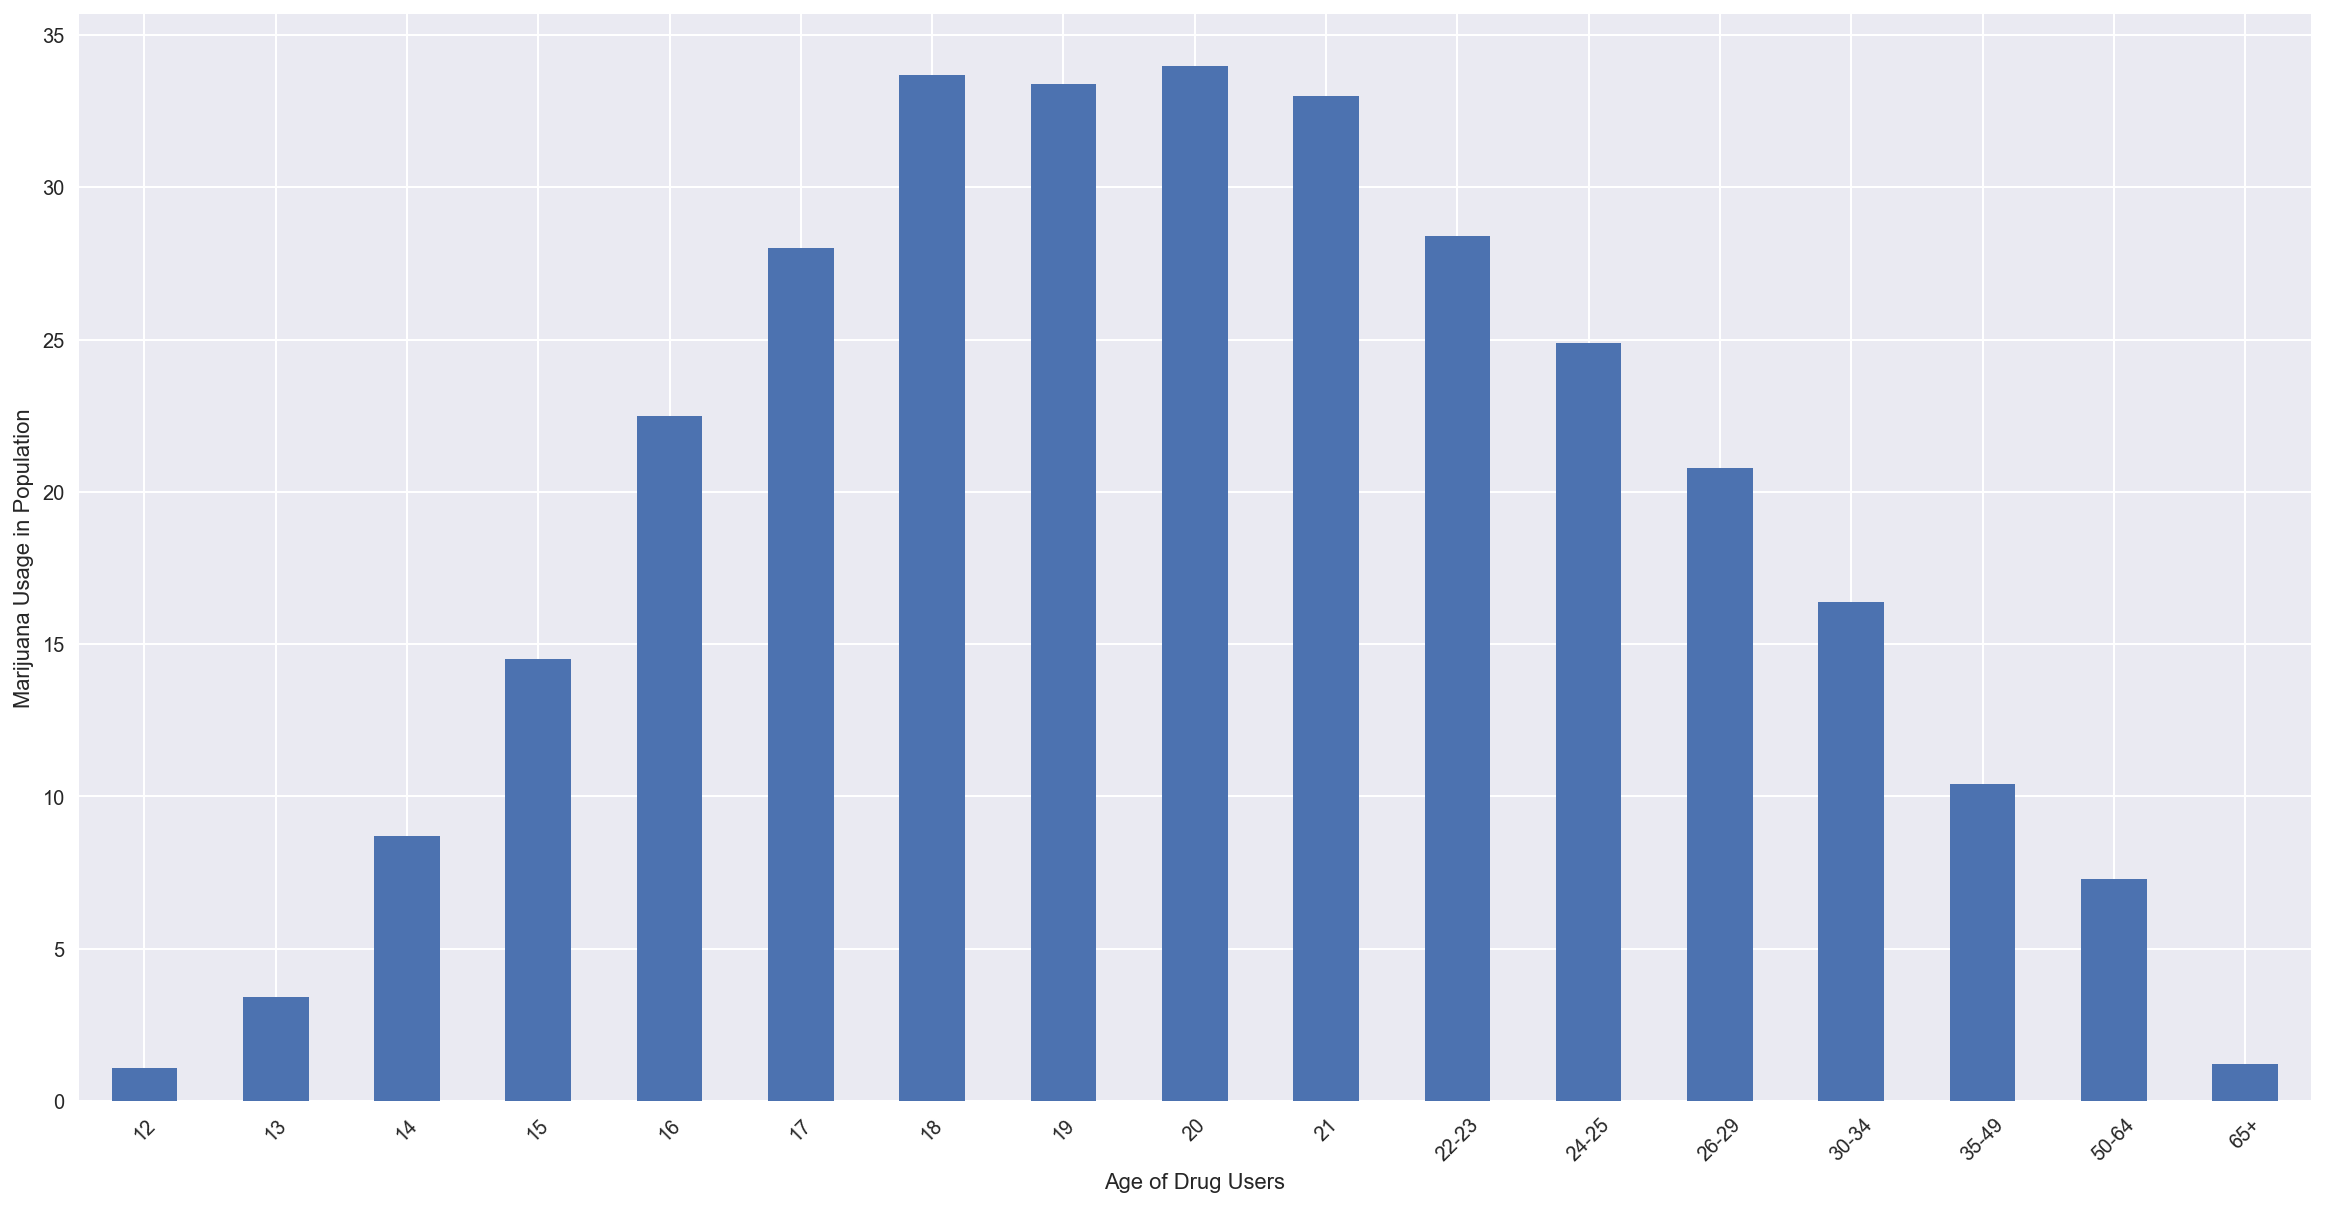

In [50]:
ax = drugs_use["marijuana-use"].plot(figsize=(20,10), kind='bar', stacked=True, rot=45)
ax.set_xlabel("Age of Drug Users")
ax.set_ylabel("Marijuana Usage in Population")

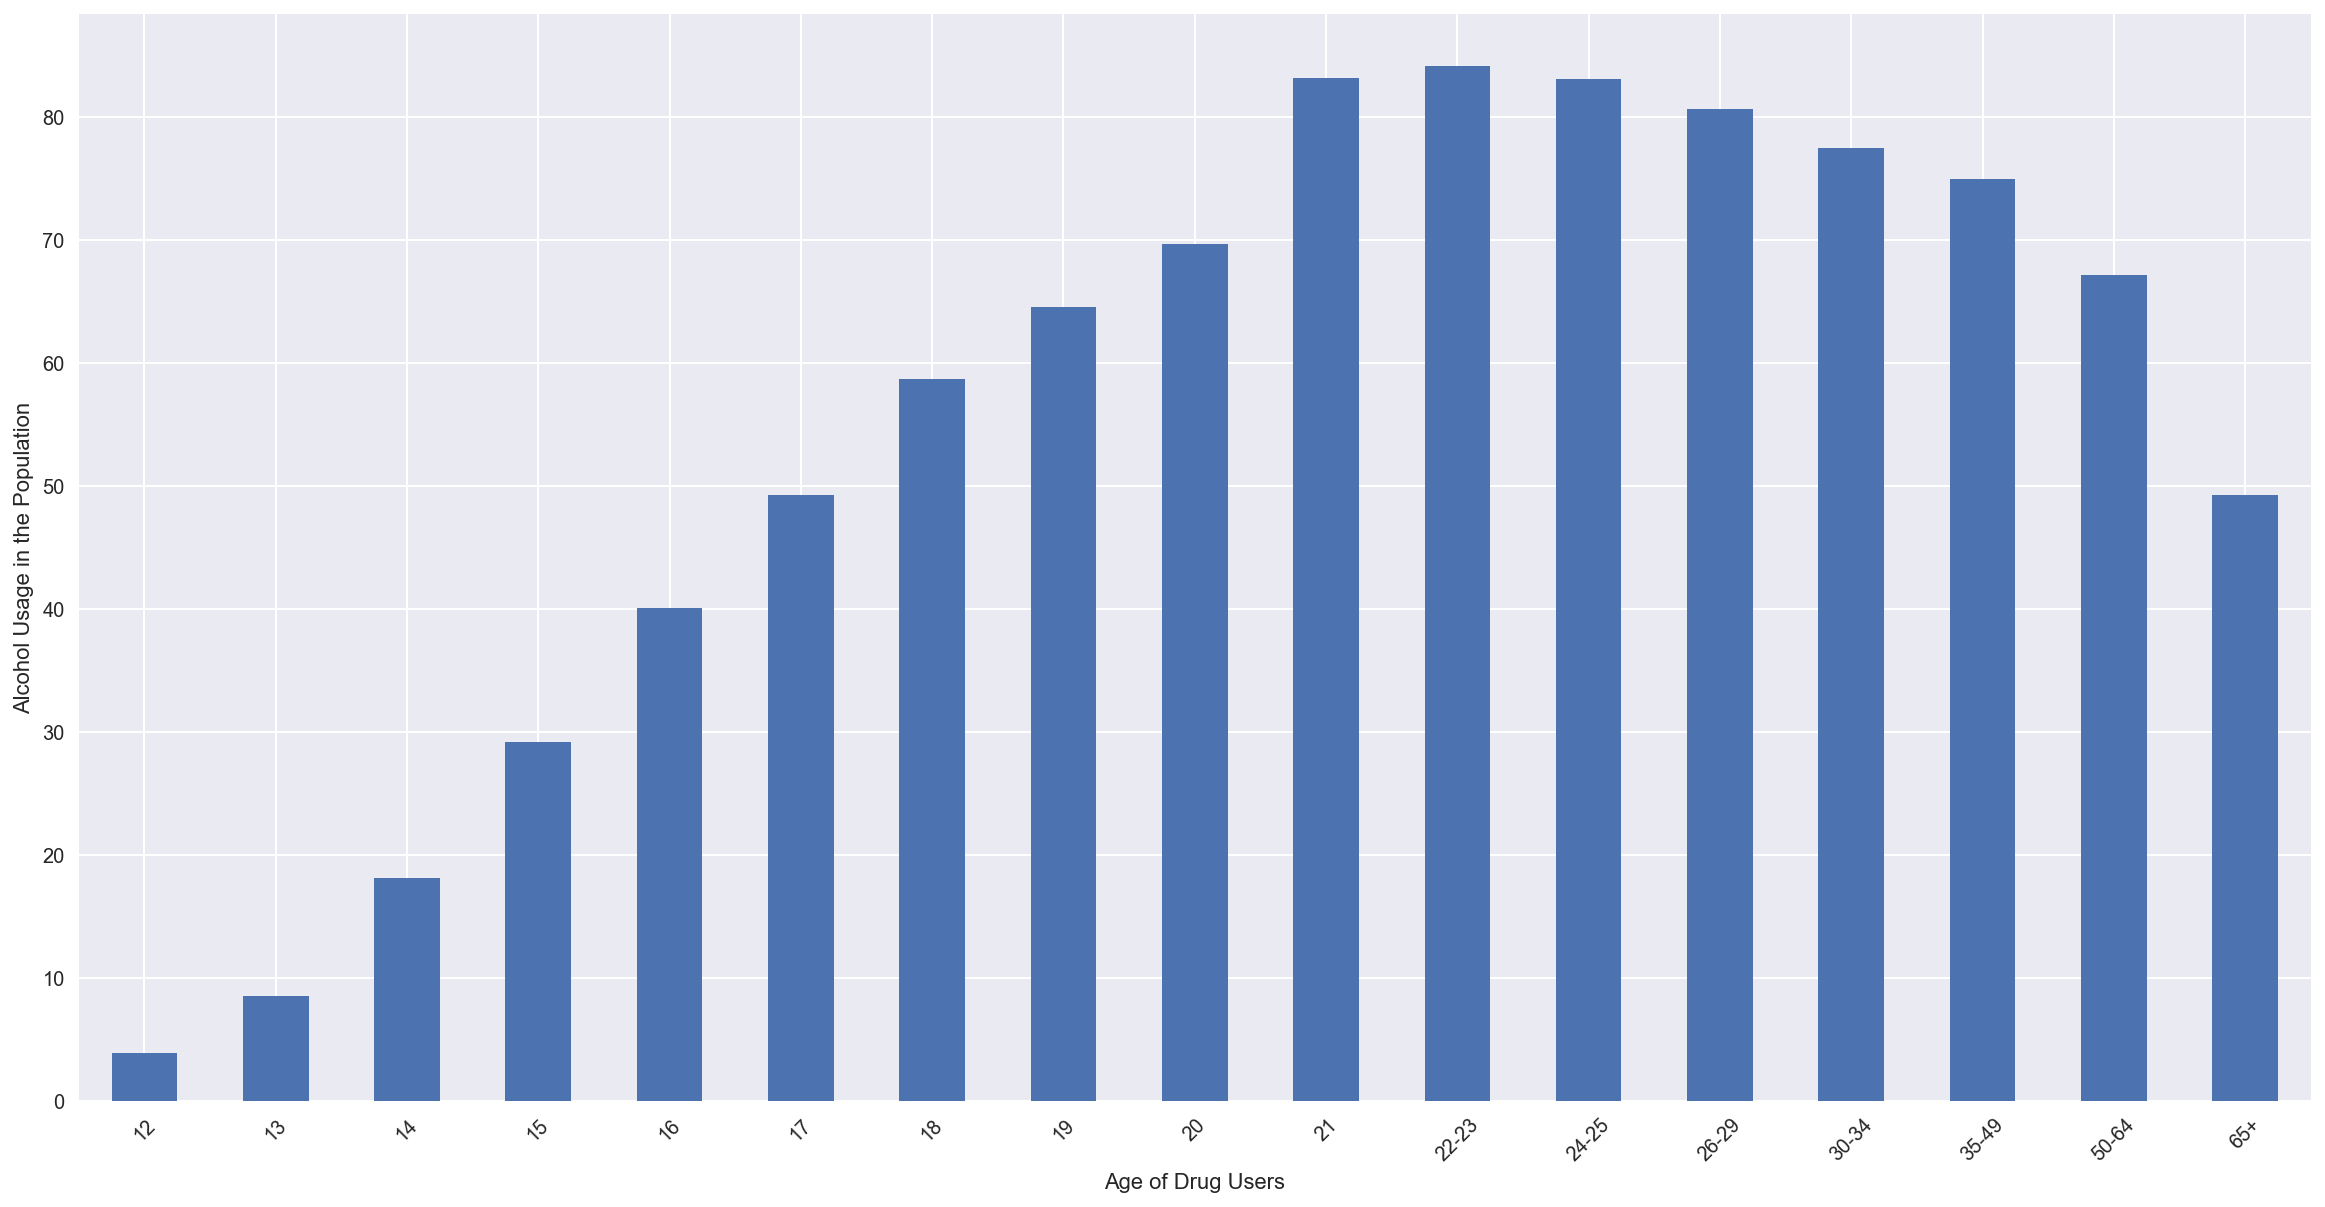

In [51]:
ax = drugs_use["alcohol-use"].plot(figsize=(20,10), kind='bar', stacked=True, rot=45)
ax.set_xlabel("Age of Drug Users")
ax.set_ylabel("Alcohol Usage in the Population")

In [52]:
ma_df = pd.DataFrame(drugs["marijuana-use"])
ma_df["alcohol-use"] = drugs["alcohol-use"]
ma_df

,marijuana-use,alcohol-use
0,1.1,3.9
1,3.4,8.5
2,8.7,18.1
3,14.5,29.2
4,22.5,40.1
5,28.0,49.3
6,33.7,58.7
7,33.4,64.6
8,34.0,69.7
9,33.0,83.2


In [53]:
ma_df.describe()

,marijuana-use,alcohol-use
count,17.000000,17.000000
mean,18.923529,55.429412
std,11.959752,26.878866
min,1.100000,3.900000
25%,8.700000,40.100000
50%,20.800000,64.600000
75%,28.400000,77.500000
max,34.000000,84.200000


In [54]:
print "The median of marijuana use is", np.median(ma_df.iloc[:,0])
print "The median of alcohol use is", np.median(ma_df.iloc[:,1])

The median of marijuana use is 20.8
The median of alcohol use is 64.6


In [55]:
stats.spearmanr(ma_df.iloc[:,0], ma_df.iloc[:,1])

SpearmanrResult(correlation=0.52973645763104338, pvalue=0.028739543749932036)

In [56]:
stats.ttest_ind(ma_df.iloc[:,0], ma_df.iloc[:,1], equal_var=False)

Ttest_indResult(statistic=-5.1162468105806527, pvalue=3.9273950226651279e-05)

**Report**

The box plots show a fairly normal distribution for marijuana, and a bit of a skew and wide range for alcohol. This becomes more apparent in the bar plots, where marijuana peaks and then curves down in a normal-looking distribution. Alcohol, on the other hand, plateaus and more or less stays near that range as people get older.

Looking at the statistics of use, these are the two drugs that are most commonly abused by people. However, what is the likelihood that a person in the population will be doing both?

Given our uncertainty of normal distribution across both data sets, we did a Spearman Correlation calculation, which showed that the two drugs seemed to be correlated with fairly high certainty. However, going by the old addage, "correlation is not causation", we ran a Welsh's t-test to see if there is a significant difference between the two populations.

The t-test gave a p < 0.00003927, which indicates that there is a significant difference in the population that use alcohol versus the population that uses marijuana.

Thus, we are able to reject the null hypothesis, "People in the general population who use marijuana are more likely to also use alcohol".

It would be interesting to run this on people in the same age group instead of the aggregate to see if the same results hold true. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

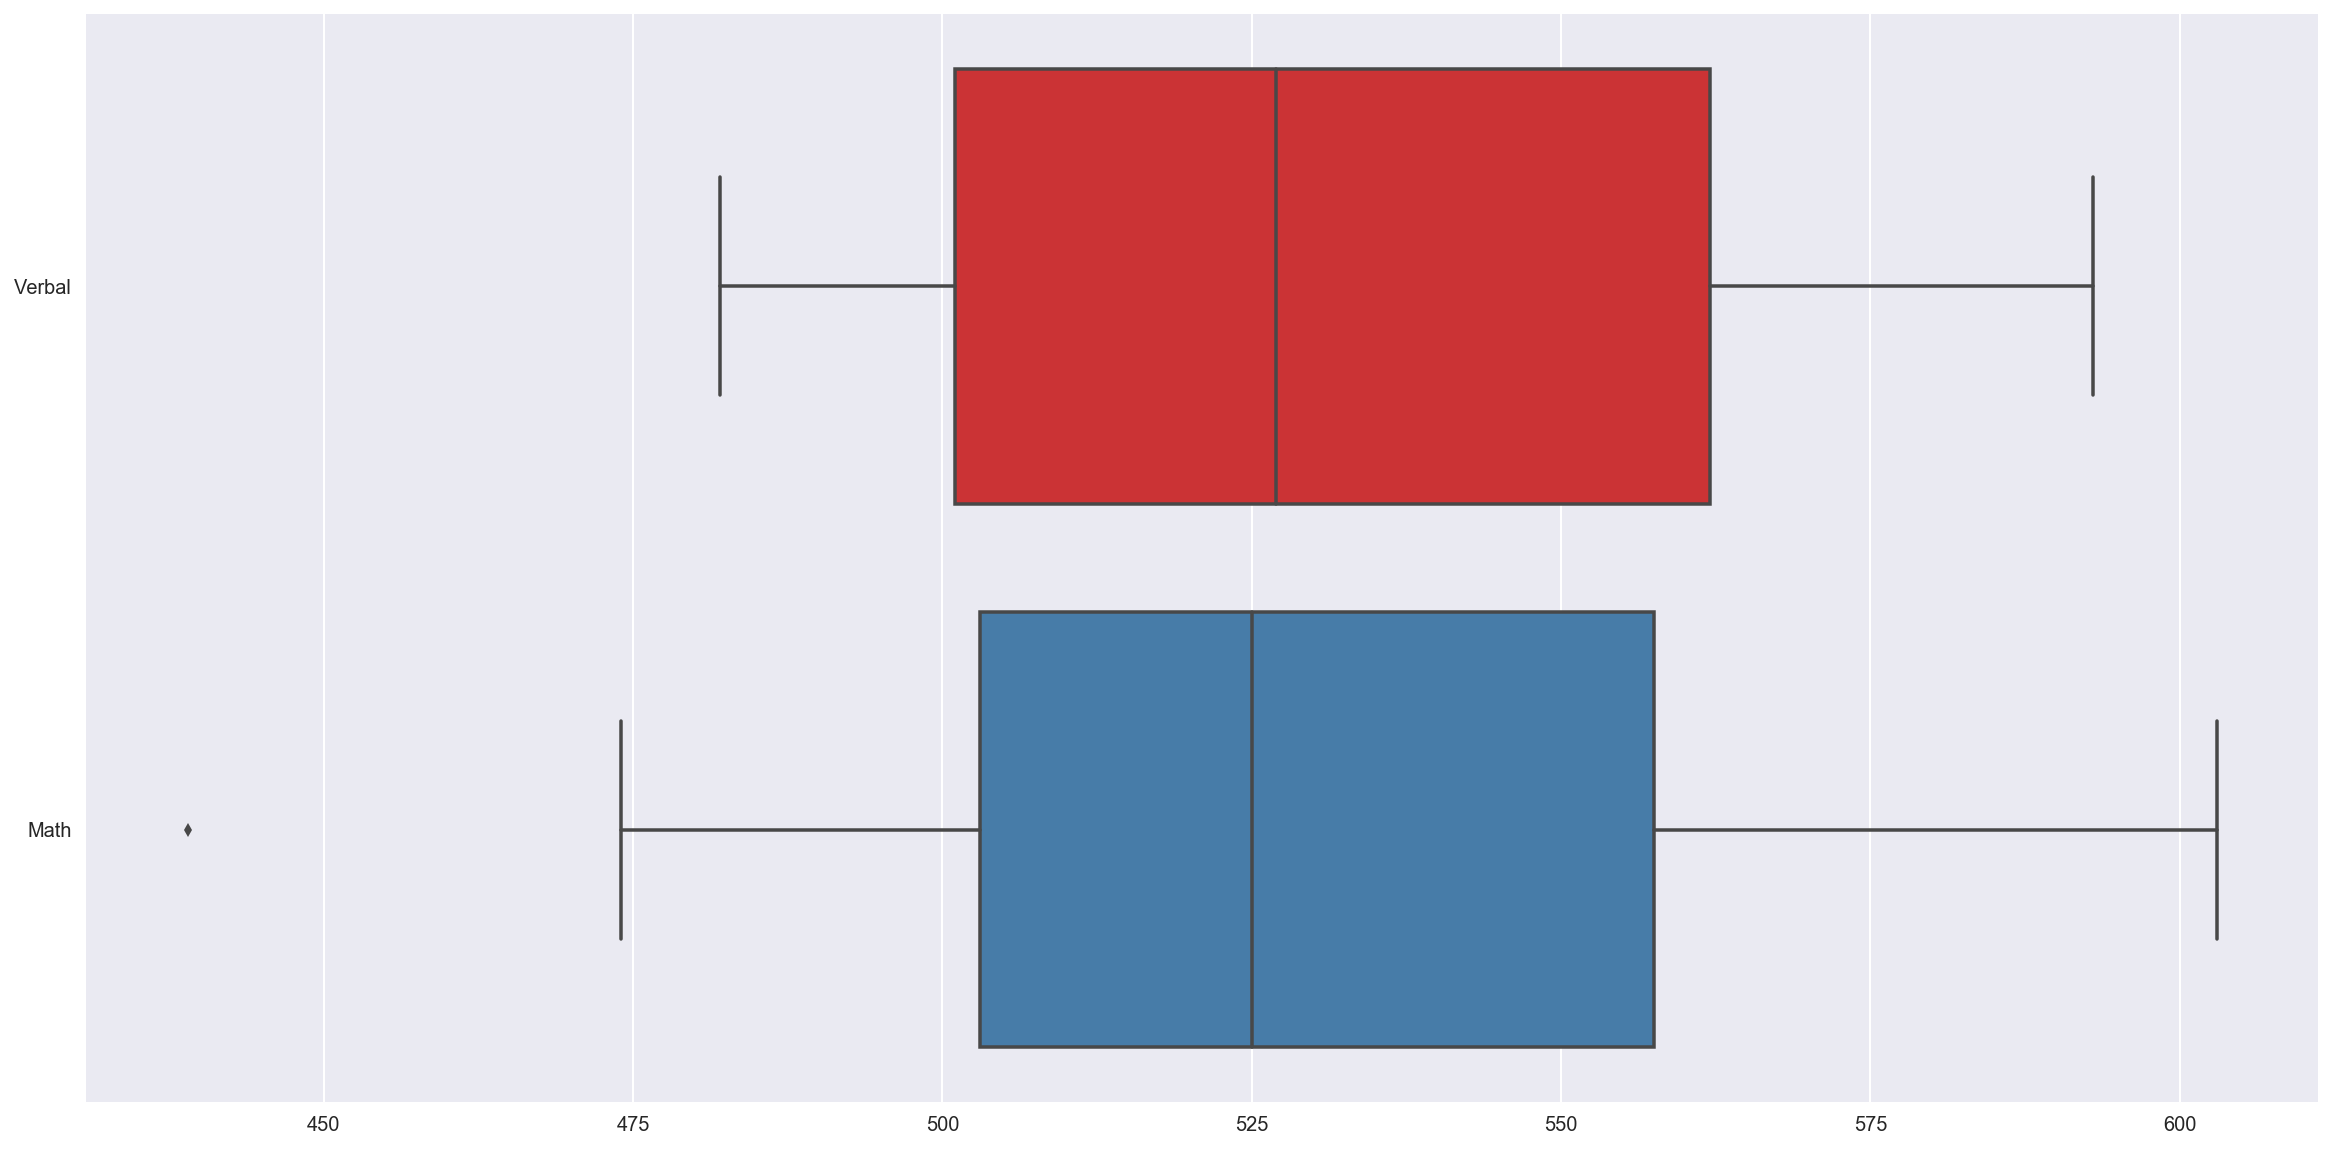

In [57]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=dict_sub_mv, orient="h", palette="Set1", whis=1)

There are many different ways for people to find outliers. Usually, removing the point needs to be justified. Since we had no part in the data collection, as an exercise, we changed the standard. By default, a boxplot uses 1.5 standard deviations from the IQR to find outliers. 

By switching definition from standard IQR range of 1.5 to 1, making it slightly stricter, we lose one data point in the Math set.  

What happens when we remove the outlier, Ohio, from both sets?

In [58]:
dict_clean = sat_df2.drop(["Rate", "Verbal-Math"], axis=1)
dict_clean.sort_values("Math", axis=0, inplace=True)
dict_clean.reset_index(inplace=True, drop=True)

In [59]:
dict_clean.iloc[0,:]

State      OH
Verbal    534
Math      439
Name: 0, dtype: object

In [60]:
dict_clean.drop(dict_clean.index[0], inplace=True)

In [61]:
dict_clean.head()

,State,Verbal,Math
1,DC,482,474
2,SC,486,488
3,GA,491,489
4,DE,501,499
5,FL,498,499


In [62]:
math = sat_df2.loc[:, "Math"].tolist()
math_median = np.median(math)
sat_df2.describe()

print "The original medians are", verbal_median, "for verbal and", math_median, "for math."

The original medians are 527.0 for verbal and 525.0 for math.


In [63]:
math2 = dict_clean.loc[:, "Math"].tolist()
math_median2 = np.median(math2)
english2 = dict_clean.loc[:, "Verbal"].tolist()
verbal_median2 = np.median(english2)

print "The cleaned medians are", verbal_median2, "for verbal and", math_median2, "for math."

The cleaned medians are 526.5 for verbal and 525.5 for math.


In [64]:
print dict_sub_mv.describe()
print 
print dict_clean.describe()

           Verbal        Math
count   51.000000   51.000000
mean   532.529412  531.843137
std     33.360667   36.287393
min    482.000000  439.000000
25%    501.000000  503.000000
50%    527.000000  525.000000
75%    562.000000  557.500000
max    593.000000  603.000000

           Verbal        Math
count   50.000000   50.000000
mean   532.500000  533.700000
std     33.698695   34.120584
min    482.000000  474.000000
25%    501.000000  505.250000
50%    526.500000  525.500000
75%    562.000000  559.250000
max    593.000000  603.000000


How interesting. Just by removing 1 data point, the means and medians moved by around 0.5 and 1 points (or between 0.0625% and 0.125%). This shows the power that outliers have in affecting our data, and so decisions for either leaving them in place or removing them should not be made lightly.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [65]:
mv_pearson = np.corrcoef(dict_clean["Verbal"], dict_clean["Math"])[0, 1]

# Spearman does not assume normal distribution
mv_spearman = stats.spearmanr(dict_clean["Verbal"], dict_clean["Math"])

print "Spearman's r is", mv_spearman
print "Pearson's r is", mv_pearson

Spearman's r is SpearmanrResult(correlation=0.94021770557498918, pvalue=4.2741486916204536e-24)
Pearson's r is 0.969265100964


Each takes a value from minus one to plus one. When all the co-ordinates are in a straight line pointing upwards, both numbers are plus one.

The Pearson correlation evaluates the linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a proportional change in the other variable. In other words, it measures how well a straight line describes the relationship between two points.

The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data. In other words, Spearman correlation does not care about where the points are since it orders them first.

Spearman correlation is often used to evaluate relationships involving ordinal variables. 

Pearson correlation coefficients measure only linear relationships. Spearman correlation coefficients measure only monotonic relationships. So a meaningful relationship can exist even if the correlation coefficients are 0. 

Source 1: http://www.economicsnetwork.ac.uk/statistics/pearson_spearman.htm  
Source 2: http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [66]:
rate = np.array(sat_df2["Rate"])
rate_percentile = []

for a in rate :
    b = round(stats.percentileofscore(rate, a), 2)
    rate_percentile.append(b)
    
sat_df2["Rate Percentile"] = rate_percentile

In [67]:
sat_df2.iloc[23]

State                 CA
Rate                  51
Verbal               498
Math                 517
Verbal-Math          -19
Rate Percentile    55.88
Name: 23, dtype: object

How is percentile related to the Spearman rank correlation?  

Both percentile and the Spearman rank correlation look at the rank of the values relative to the highest number in the set. Relationships can be inferred based on the ranks of value(s) and the distance of the value(s).

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

Percentile provides a standardized scale provides another method to visually inspect data for outliers. When reset to a scale of 0-100, gaps that may not have been very apparent in the initial scale become apparent, or gaps that look like outliers actually don't exist. The next two plots demonstrate this using the "Alcohol Use" column

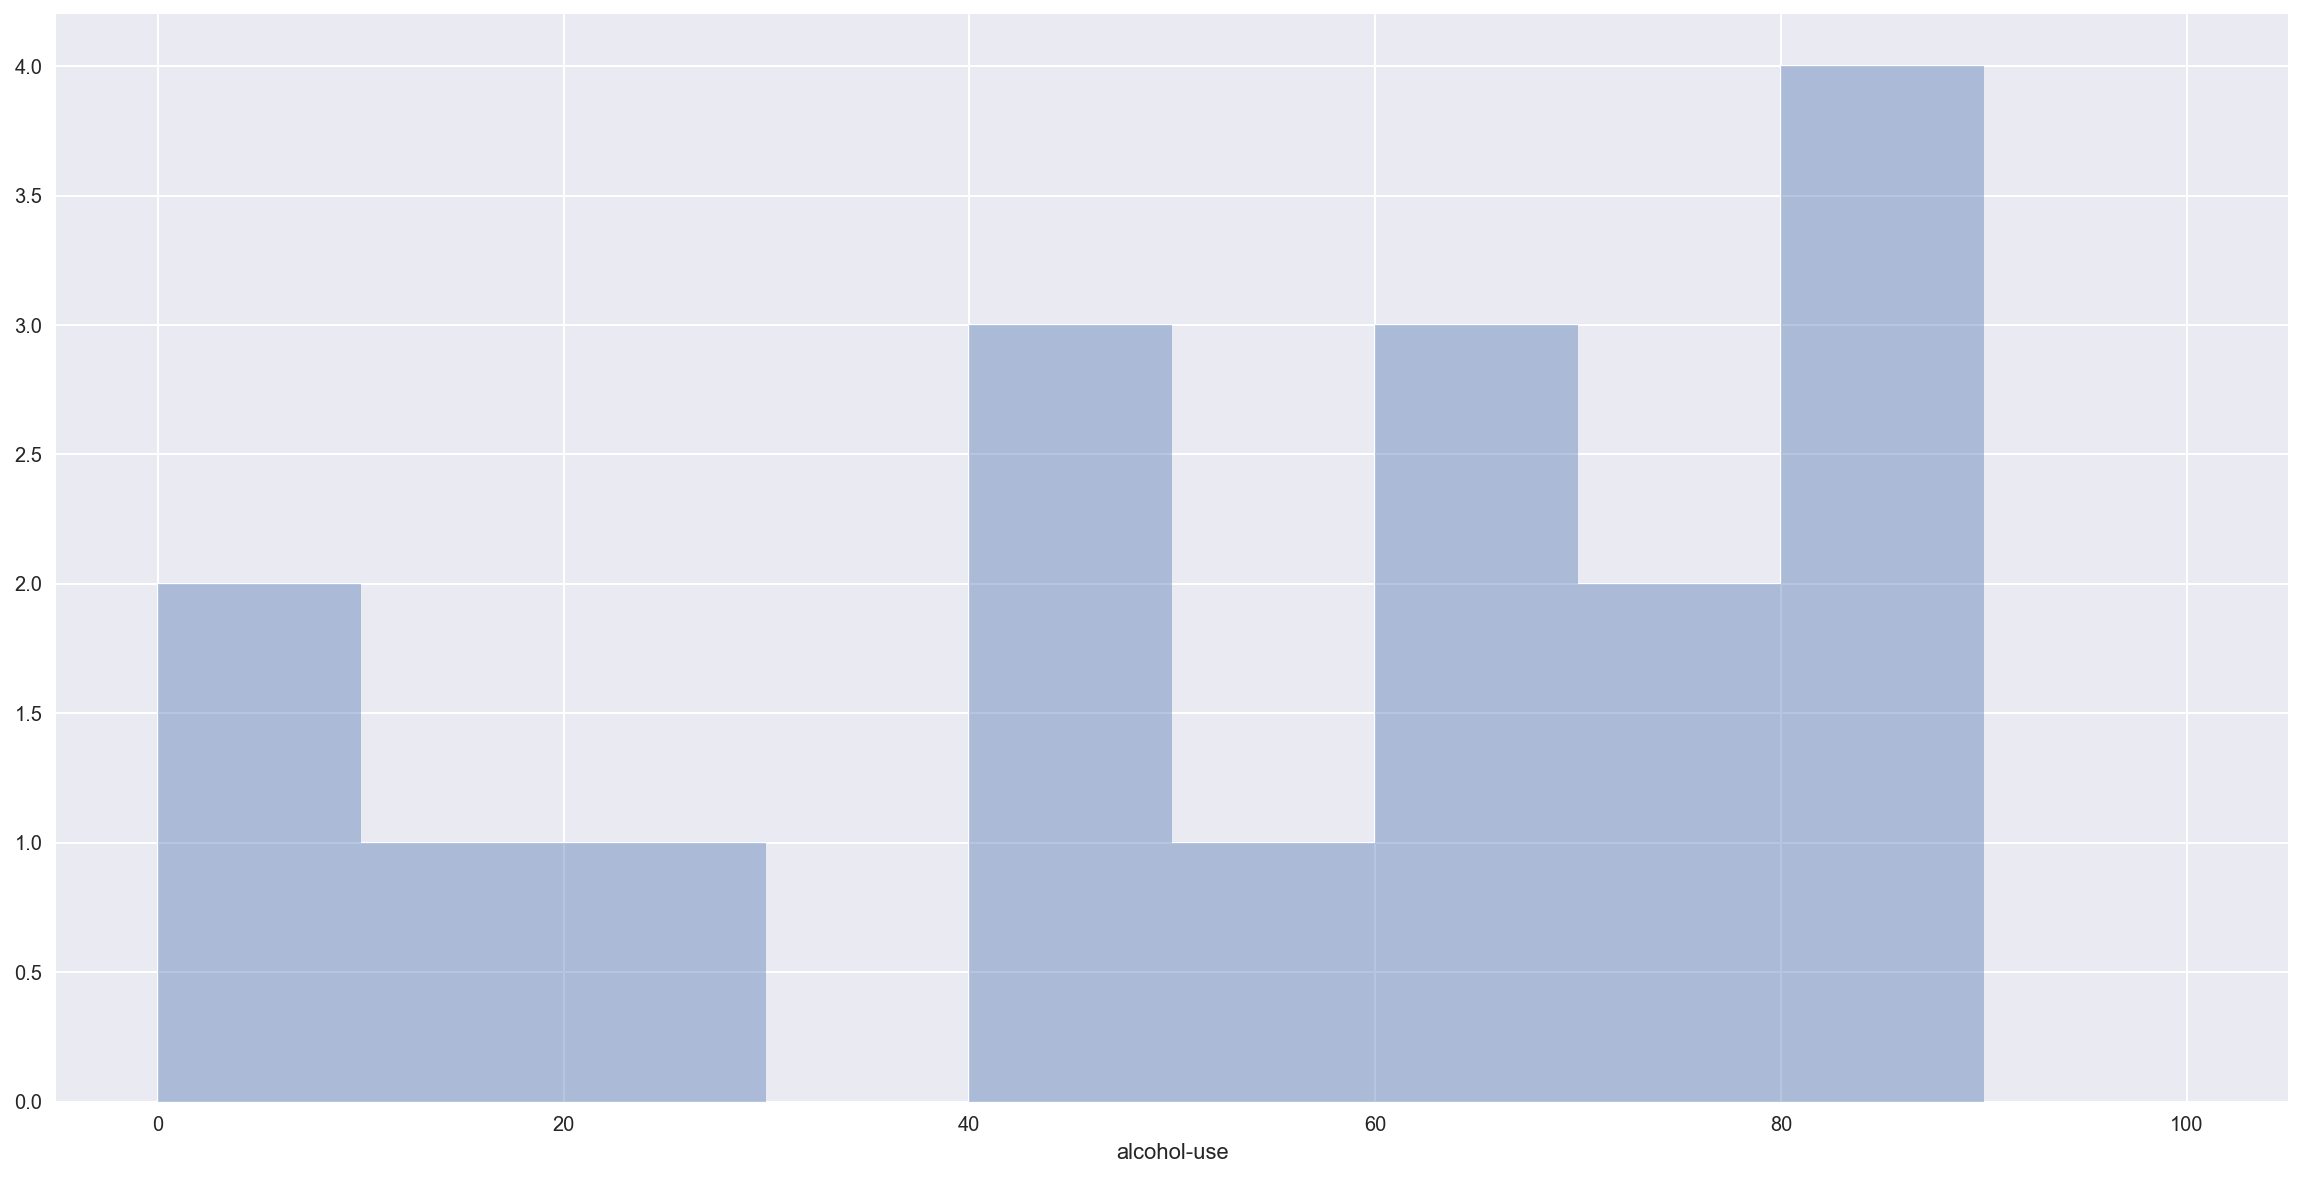

In [68]:
a_use = drugs["alcohol-use"]
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(a_use, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], kde=False)

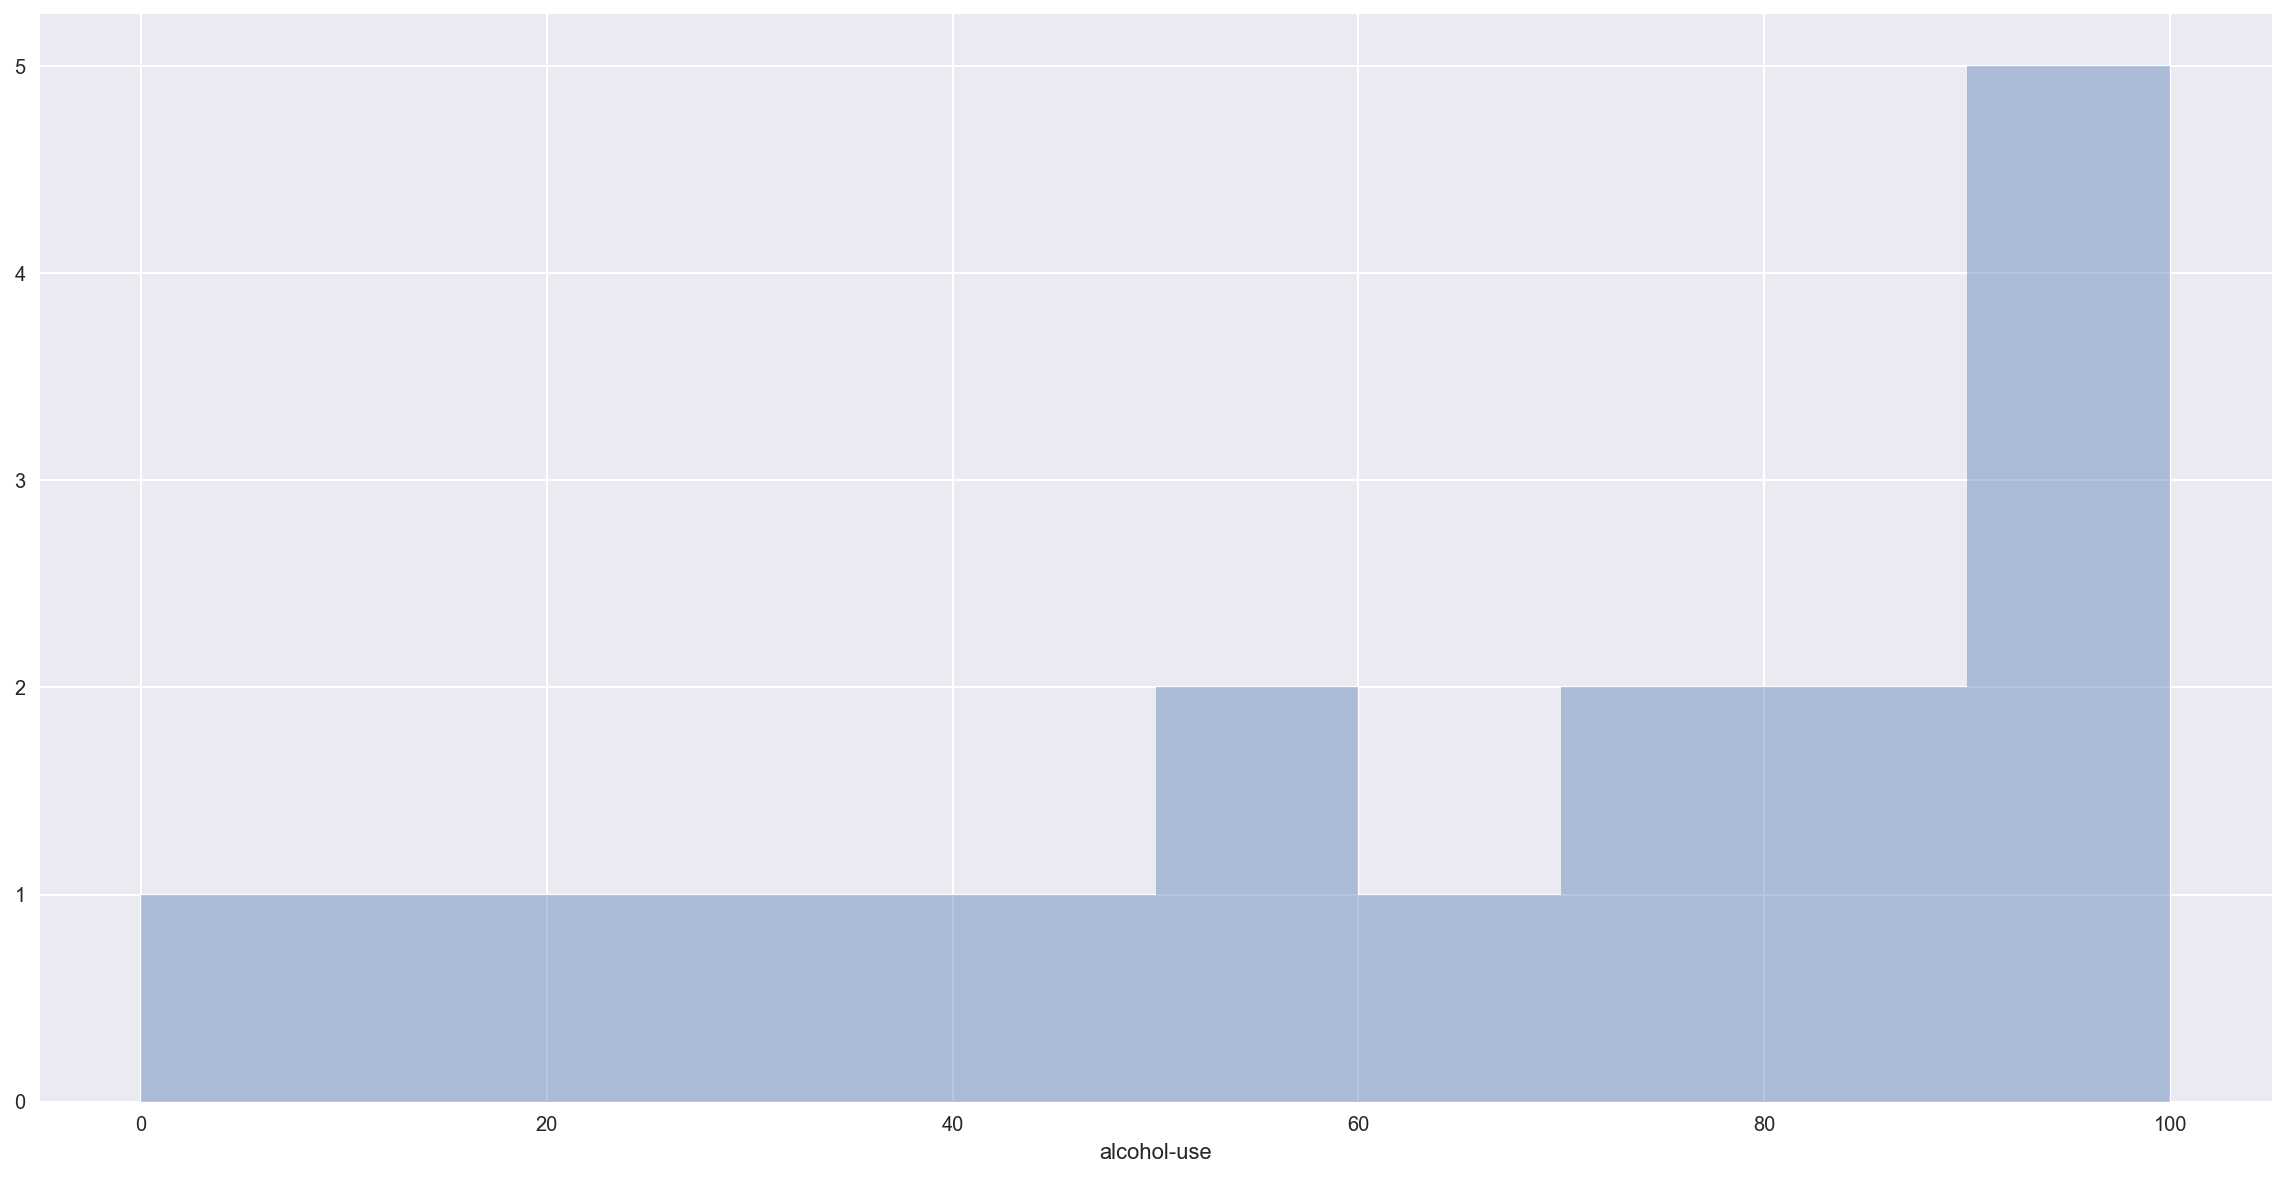

In [69]:
a_use_percentile = (a_use / 84.2) * 100
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(a_use_percentile, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], kde=False)